In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

Data Cleaning

In [ ]:
df = pd.read_excel(r"D:\project\MultipleDiseasePrediction\parkinsons.xlsx")

# find duplicate value
print("Duplicate Values :",df.duplicated().sum())

# find null value
print("Null Values :",df.isnull().sum())

# column name change
df.columns = df.columns.str.replace(r"[:(]", "_", regex=True)
df.columns = df.columns.str.replace(r"[)]", "", regex=True)
df.columns = df.columns.str.lower()

print(df.describe(include = "all"))

Handling outlayers

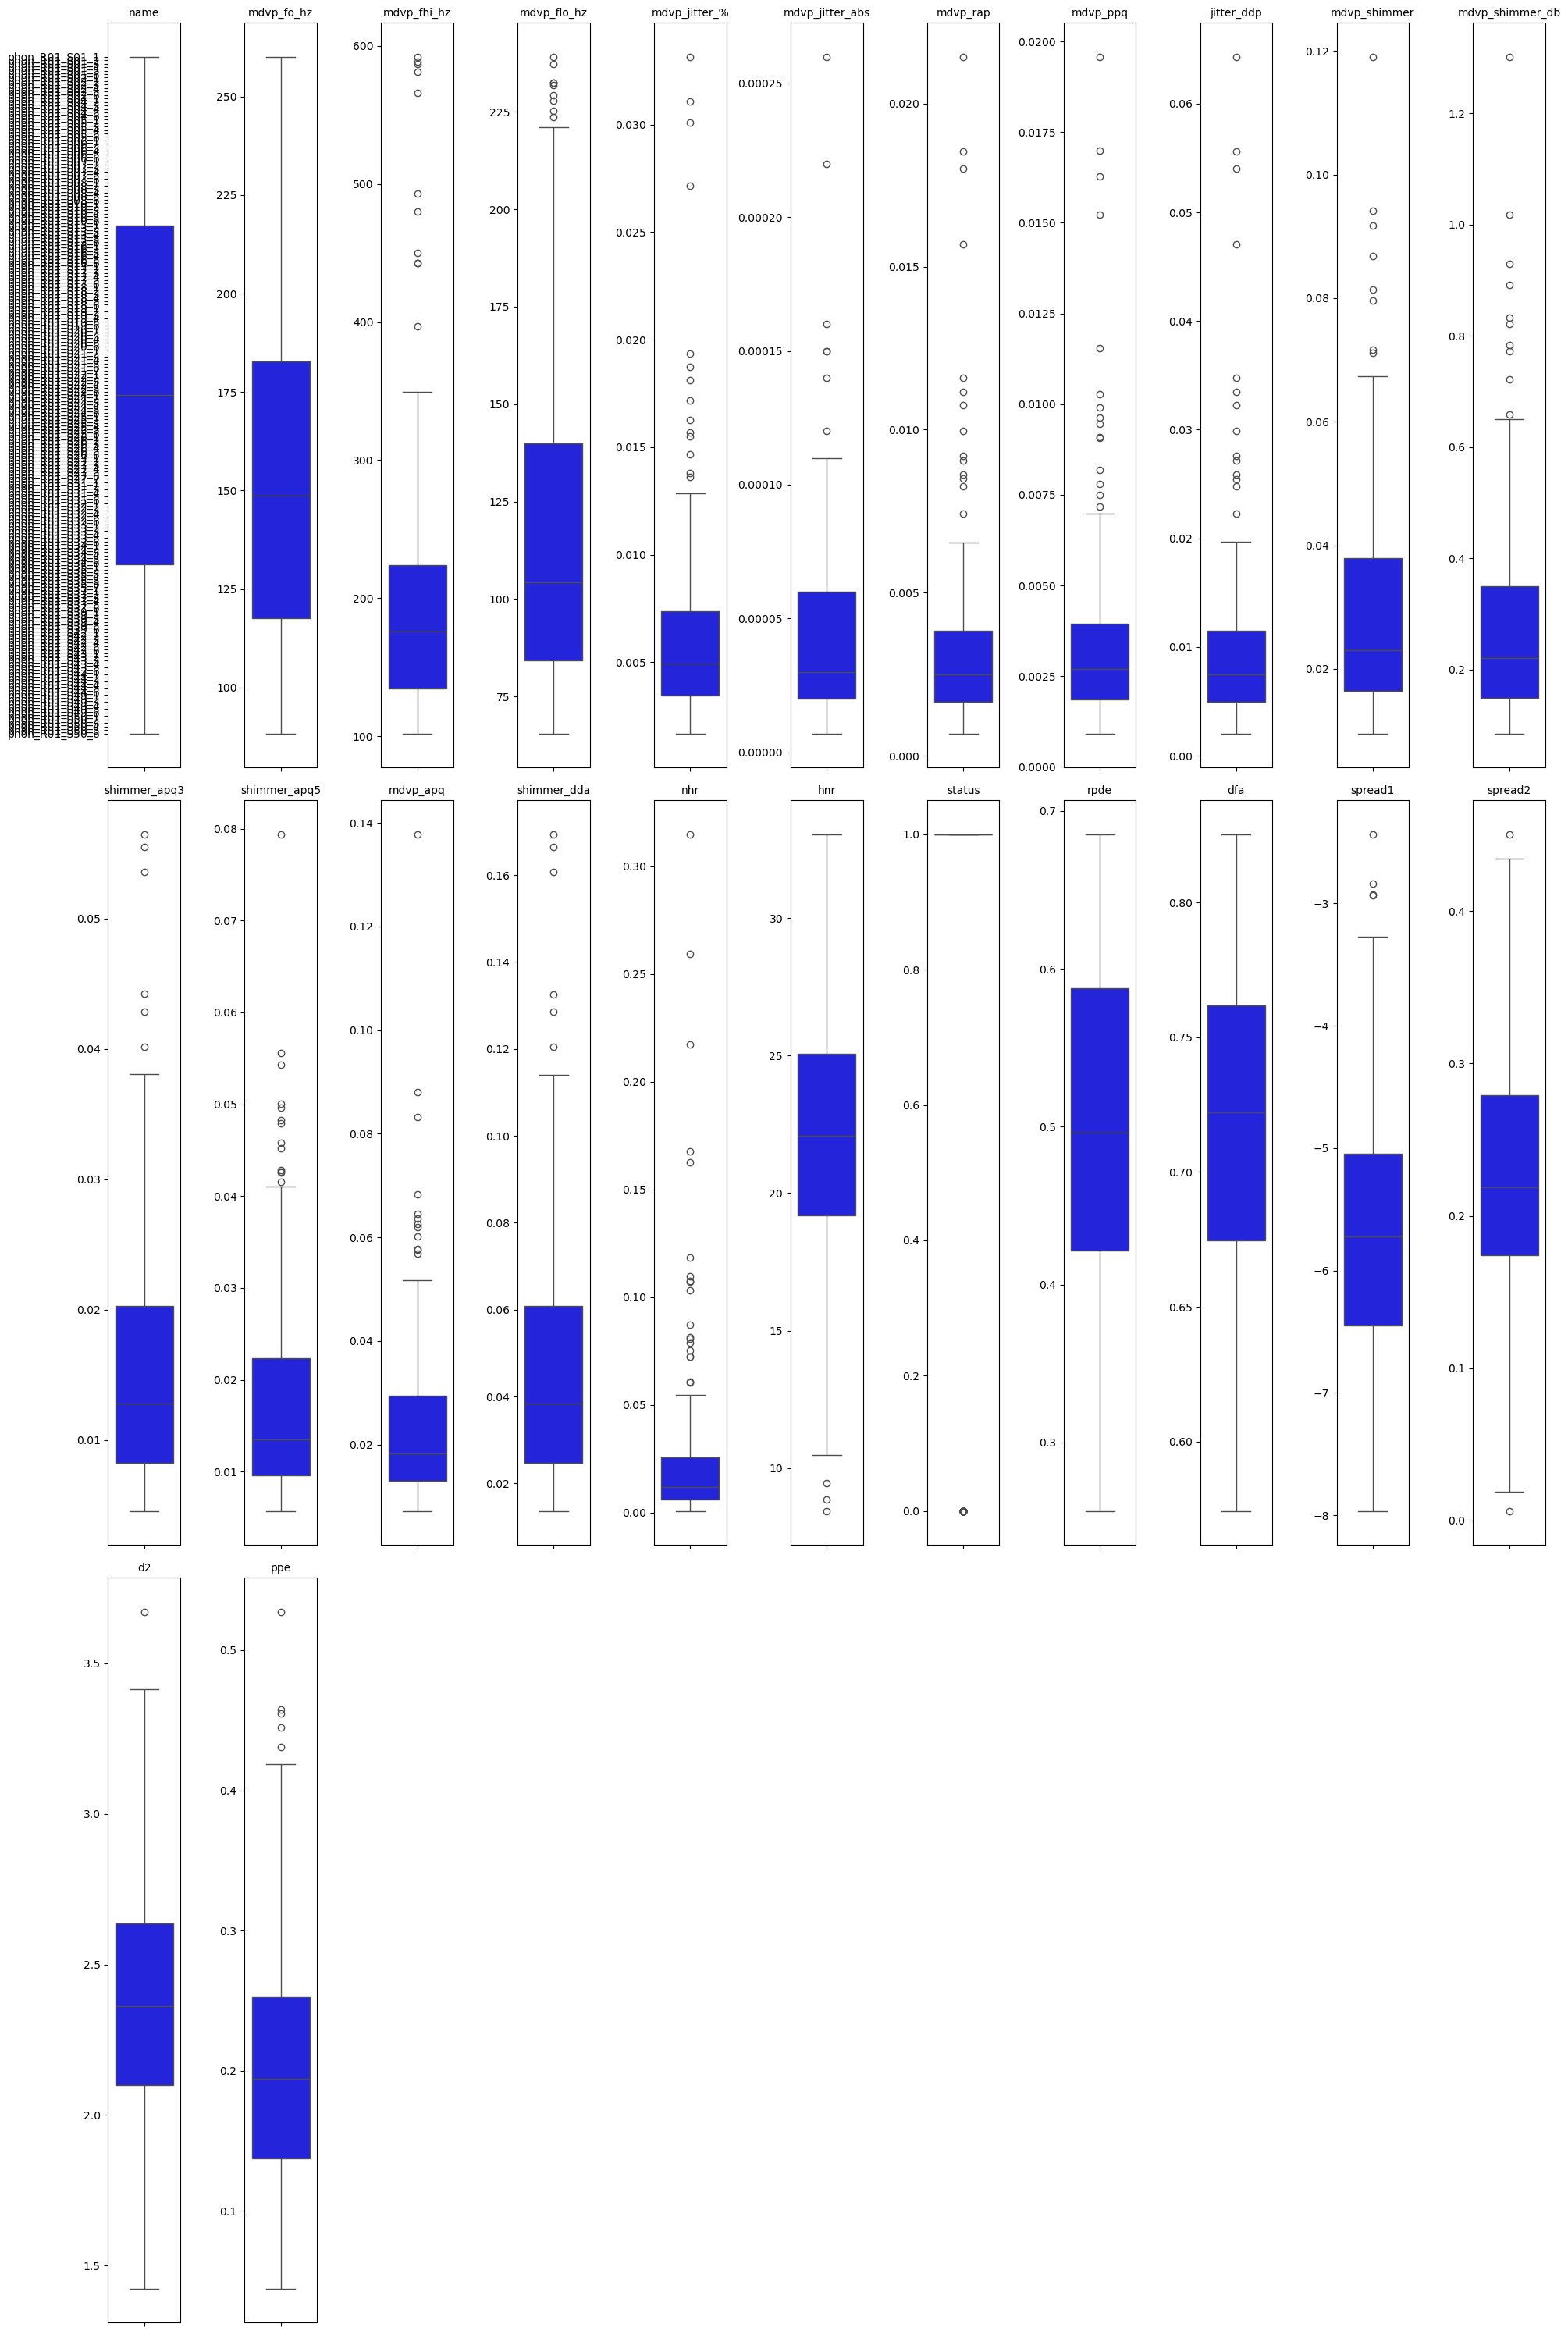

In [161]:
features = df.columns

plt.figure(figsize=(20, 30))  # Increased height
rows = 3
cols = 11  # Adjust according to number of features
for i in range(len(features)):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[features[i]], color='#0606f9')
    plt.title(features[i], fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [162]:
# Function to detect outliers in each numeric column and report columns with outliers
def detect_outliers(df):
    outliers = {}
    columns_with_outliers = []  # List to store columns with outliers
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    for column in numeric_df.columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_values = numeric_df[column][(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
        
        # If outliers are found, add column to the outliers dictionary and columns_with_outliers list
        if not outlier_values.empty:
            outliers[column] = outlier_values
            columns_with_outliers.append(column)
    
    return outliers, columns_with_outliers

# Detect outliers in the dataset
outliers, columns_with_outliers = detect_outliers(df)

# Print the results
for column, outlier_values in outliers.items():
    print(f"Outliers in {column}: {outlier_values.values}")

# Print columns with outliers
if columns_with_outliers:
    print(f"Columns with outliers: {', '.join(columns_with_outliers)}")
else:
    print("No columns with outliers detected.")


Outliers in mdvp_fhi_hz: [588.518 586.567 492.892 442.557 450.247 442.824 479.697 565.74  592.03
 581.289 396.961]
Outliers in mdvp_flo_hz: [225.227 232.483 232.435 227.911 231.848 223.634 229.256 237.303 239.17 ]
Outliers in mdvp_jitter_%: [0.01378 0.01936 0.03316 0.01551 0.03011 0.01568 0.01466 0.01719 0.01627
 0.01872 0.03107 0.02714 0.01813 0.0136 ]
Outliers in mdvp_jitter_abs: [0.00015 0.00026 0.00012 0.00022 0.00016 0.00014 0.00015]
Outliers in mdvp_rap: [0.00743 0.00826 0.01159 0.02144 0.00905 0.01854 0.00863 0.00849 0.00996
 0.00919 0.01075 0.018   0.01568 0.01117]
Outliers in mdvp_ppq: [0.00781 0.00908 0.0075  0.0099  0.01522 0.00909 0.01628 0.00946 0.00819
 0.01027 0.00963 0.01154 0.01958 0.01699 0.00718]
Outliers in jitter_ddp: [0.02228 0.02478 0.03476 0.06433 0.02716 0.05563 0.02589 0.02546 0.02987
 0.02756 0.03225 0.05401 0.04705 0.03351]
Outliers in mdvp_shimmer: [0.07959 0.09178 0.09419 0.08143 0.07118 0.0717  0.11908 0.08684]
Outliers in mdvp_shimmer_db: [0.772 0.659 0.

In [163]:
def clip_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

cols = ["mdvp_fhi_hz", "mdvp_flo_hz", "mdvp_jitter_%", "mdvp_jitter_abs", "mdvp_rap", "mdvp_ppq", "jitter_ddp", "mdvp_shimmer", "mdvp_shimmer_db",
        "shimmer_apq3", "shimmer_apq5", "mdvp_apq", "shimmer_dda", "nhr", "hnr", "spread2", "d2", "ppe",'spread1']

df[cols] = df[cols].apply(clip_outliers)

skew

In [164]:
# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Calculate skewness
skew_values = df[numerical_cols].skew().sort_values(ascending=False)

# Step 3: Print skewness for all numerical columns
print("Skewness of numerical columns:\n")   
print(skew_values)

# Step 4: Print only columns with high skewness
skew_threshold = 0.5
highly_skewed = skew_values[abs(skew_values) > skew_threshold]

print("\nHighly skewed columns (|skew| > 0.5):\n")
print(highly_skewed)



Skewness of numerical columns:

nhr                1.203088
shimmer_apq5       1.164891
mdvp_flo_hz        1.149559
mdvp_jitter_abs    1.144106
mdvp_jitter_%      1.122127
mdvp_shimmer_db    1.100680
mdvp_rap           1.091827
jitter_ddp         1.091426
shimmer_apq3       1.085499
shimmer_dda        1.085445
mdvp_shimmer       1.083776
mdvp_ppq           1.078116
mdvp_apq           1.063128
mdvp_fhi_hz        1.061444
ppe                0.626952
mdvp_fo_hz         0.591737
spread1            0.383878
d2                 0.361479
spread2            0.142395
dfa               -0.033214
rpde              -0.143402
hnr               -0.427651
status            -1.187727
dtype: float64

Highly skewed columns (|skew| > 0.5):

nhr                1.203088
shimmer_apq5       1.164891
mdvp_flo_hz        1.149559
mdvp_jitter_abs    1.144106
mdvp_jitter_%      1.122127
mdvp_shimmer_db    1.100680
mdvp_rap           1.091827
jitter_ddp         1.091426
shimmer_apq3       1.085499
shimmer_dda      

In [165]:
## log transform
import numpy as np

log_columns = ["ppe", "spread1", "mdvp_fhi_hz", "d2", "mdvp_fo_hz", 
               "spread2", "dfa", "rpde", "hnr"]

# Apply log1p after shifting if necessary
for col in log_columns:
    if (df[col] <= 0).any():
        df[col] = df[col] - df[col].min() + 1e-6  # shift to make values positive
    df[col] = np.log1p(df[col])



## Cube Root Transformation

columns_to_transform = ['nhr', 'mdvp_jitter_abs', 'mdvp_jitter_%', 'mdvp_rap', 'jitter_ddp', 'mdvp_ppq']

# Apply cube root transformation
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)



from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
## List of columns to transform
cols_to_transform = ["mdvp_flo_hz", "shimmer_apq5", "mdvp_apq", "mdvp_shimmer", "mdvp_shimmer_db", "shimmer_apq3", "shimmer_dda", "hnr"]

# Apply transformation
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])



EDA

Target Variable Analysis

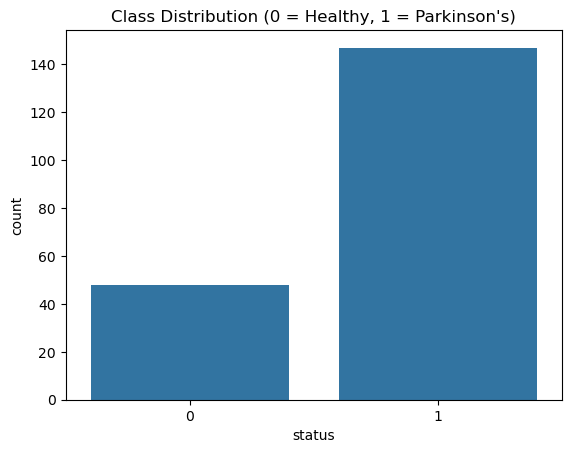

status
1    75.384615
0    24.615385
Name: proportion, dtype: float64

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for class balance
sns.countplot(x='status', data=df)
plt.title("Class Distribution (0 = Healthy, 1 = Parkinson's)")
plt.show()

# Percentage distribution
df['status'].value_counts(normalize=True) * 100


Univariate Analysis for Numerical Features

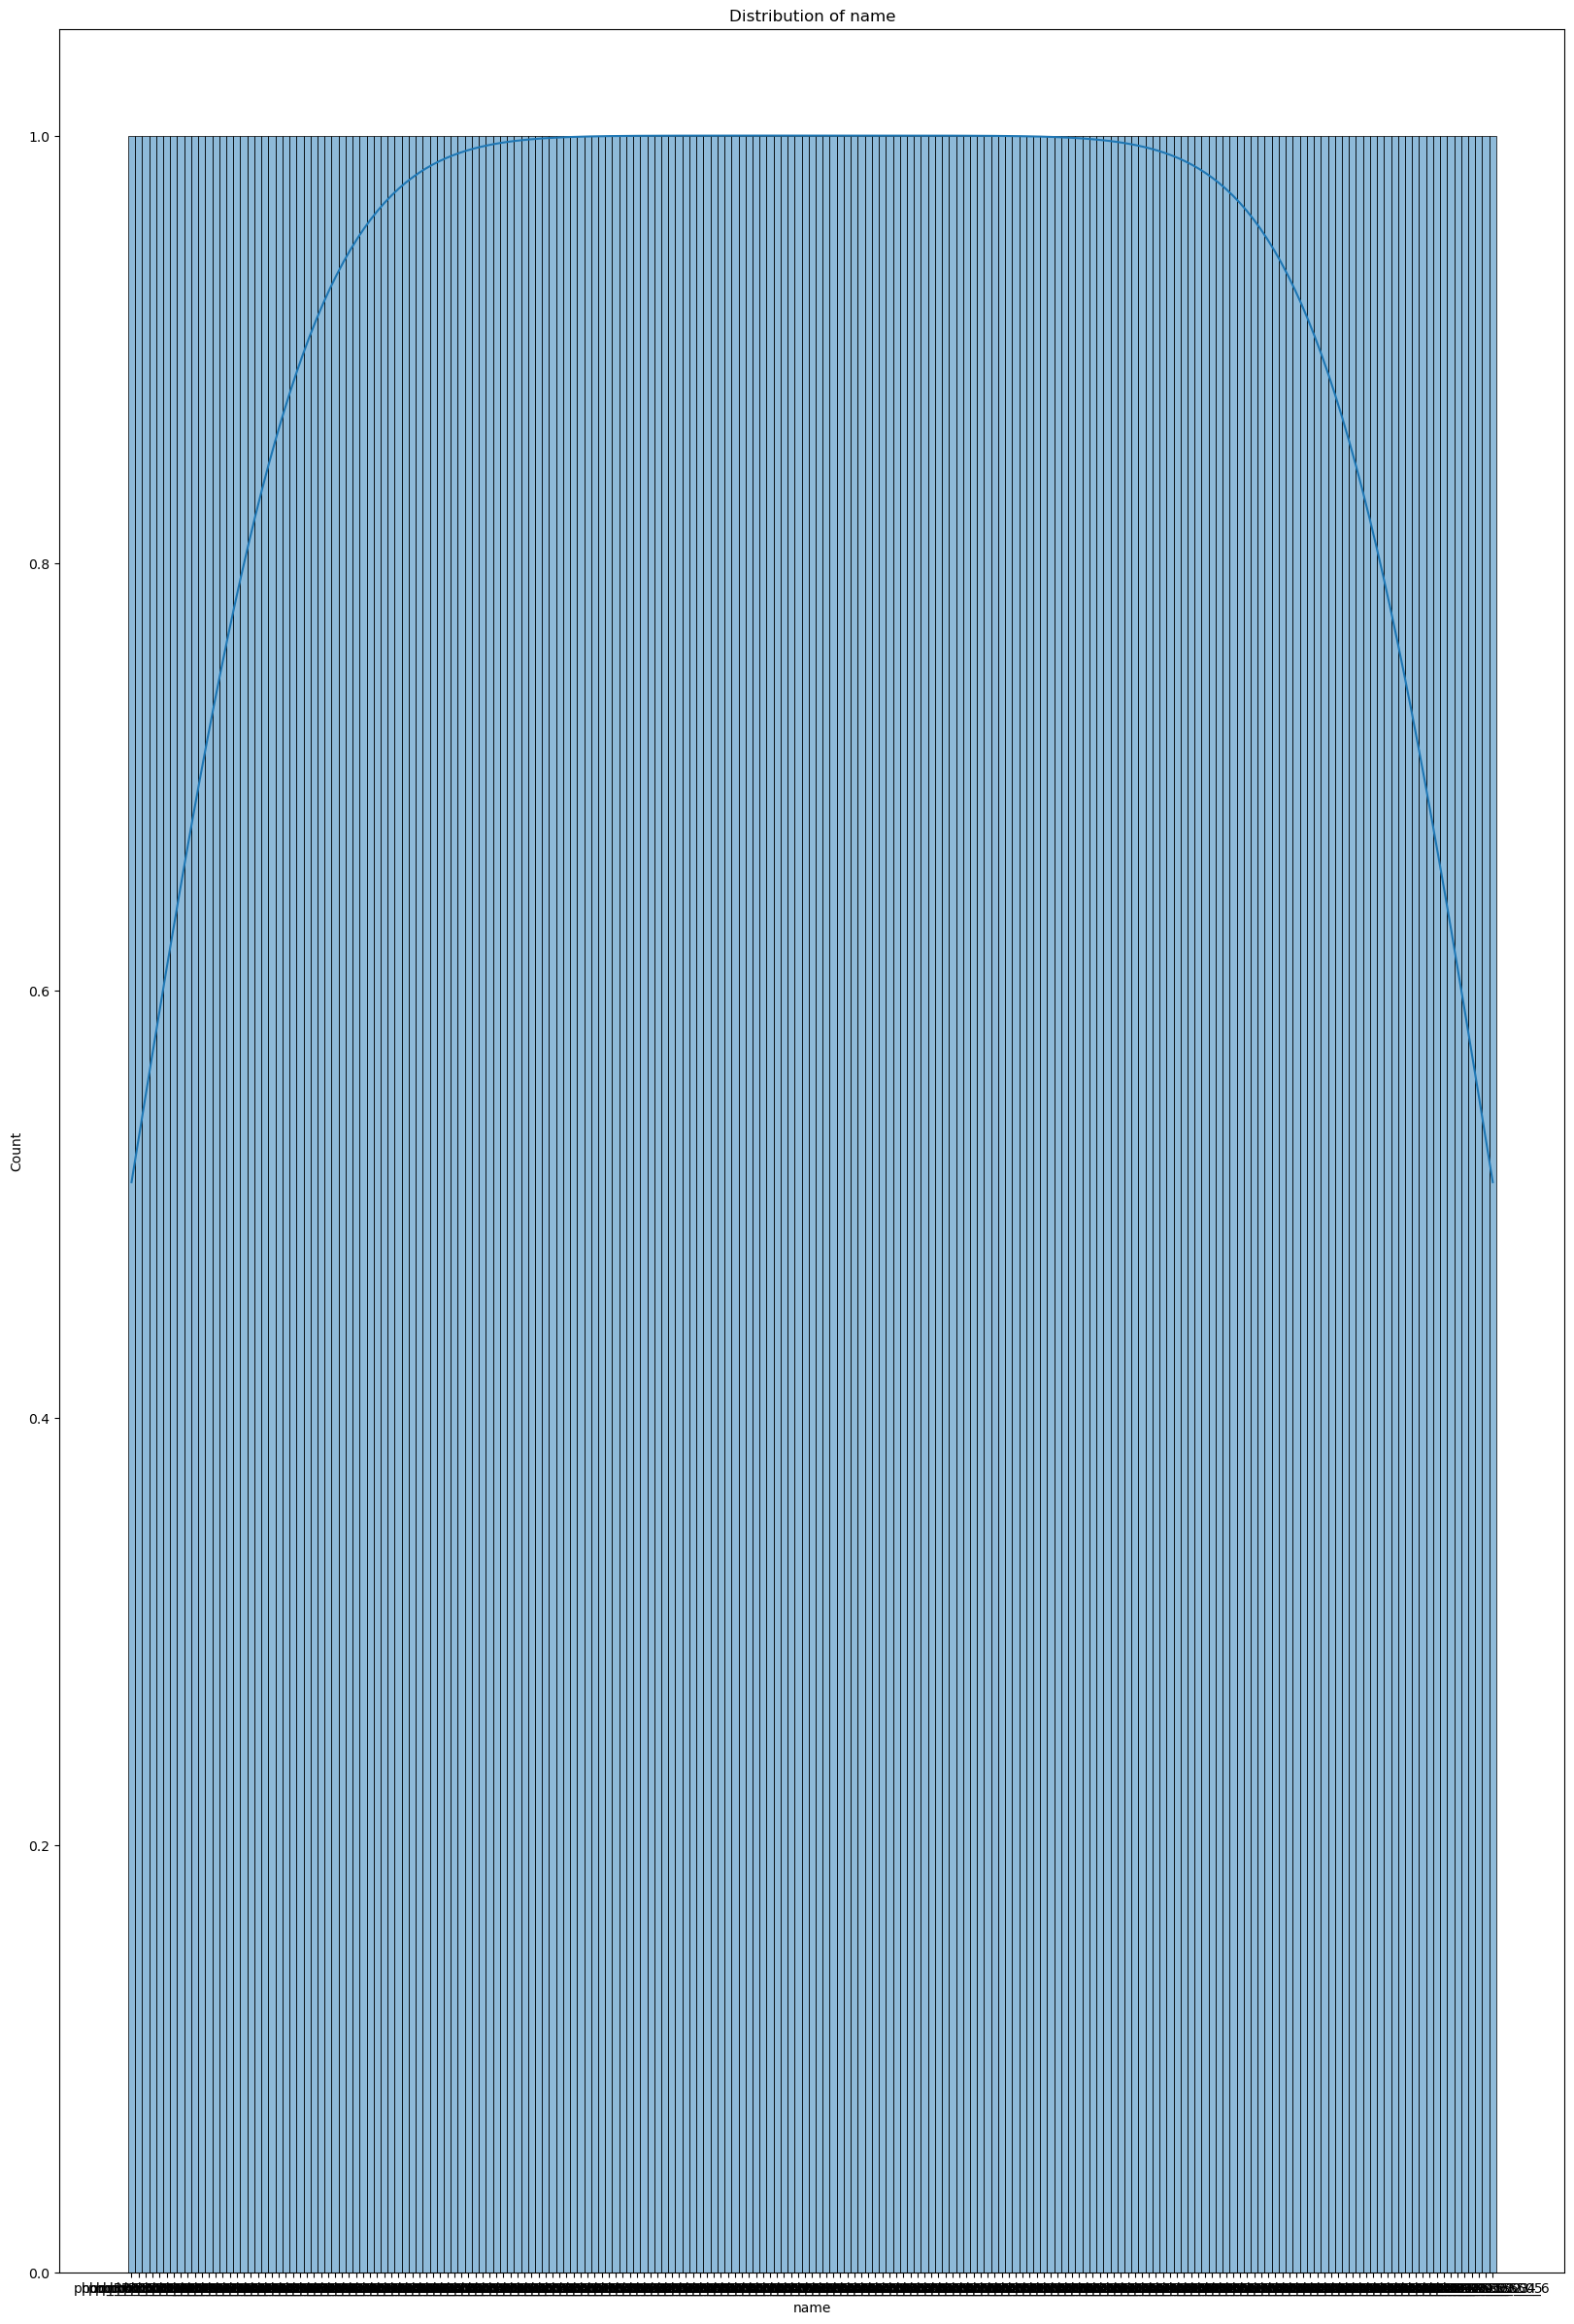

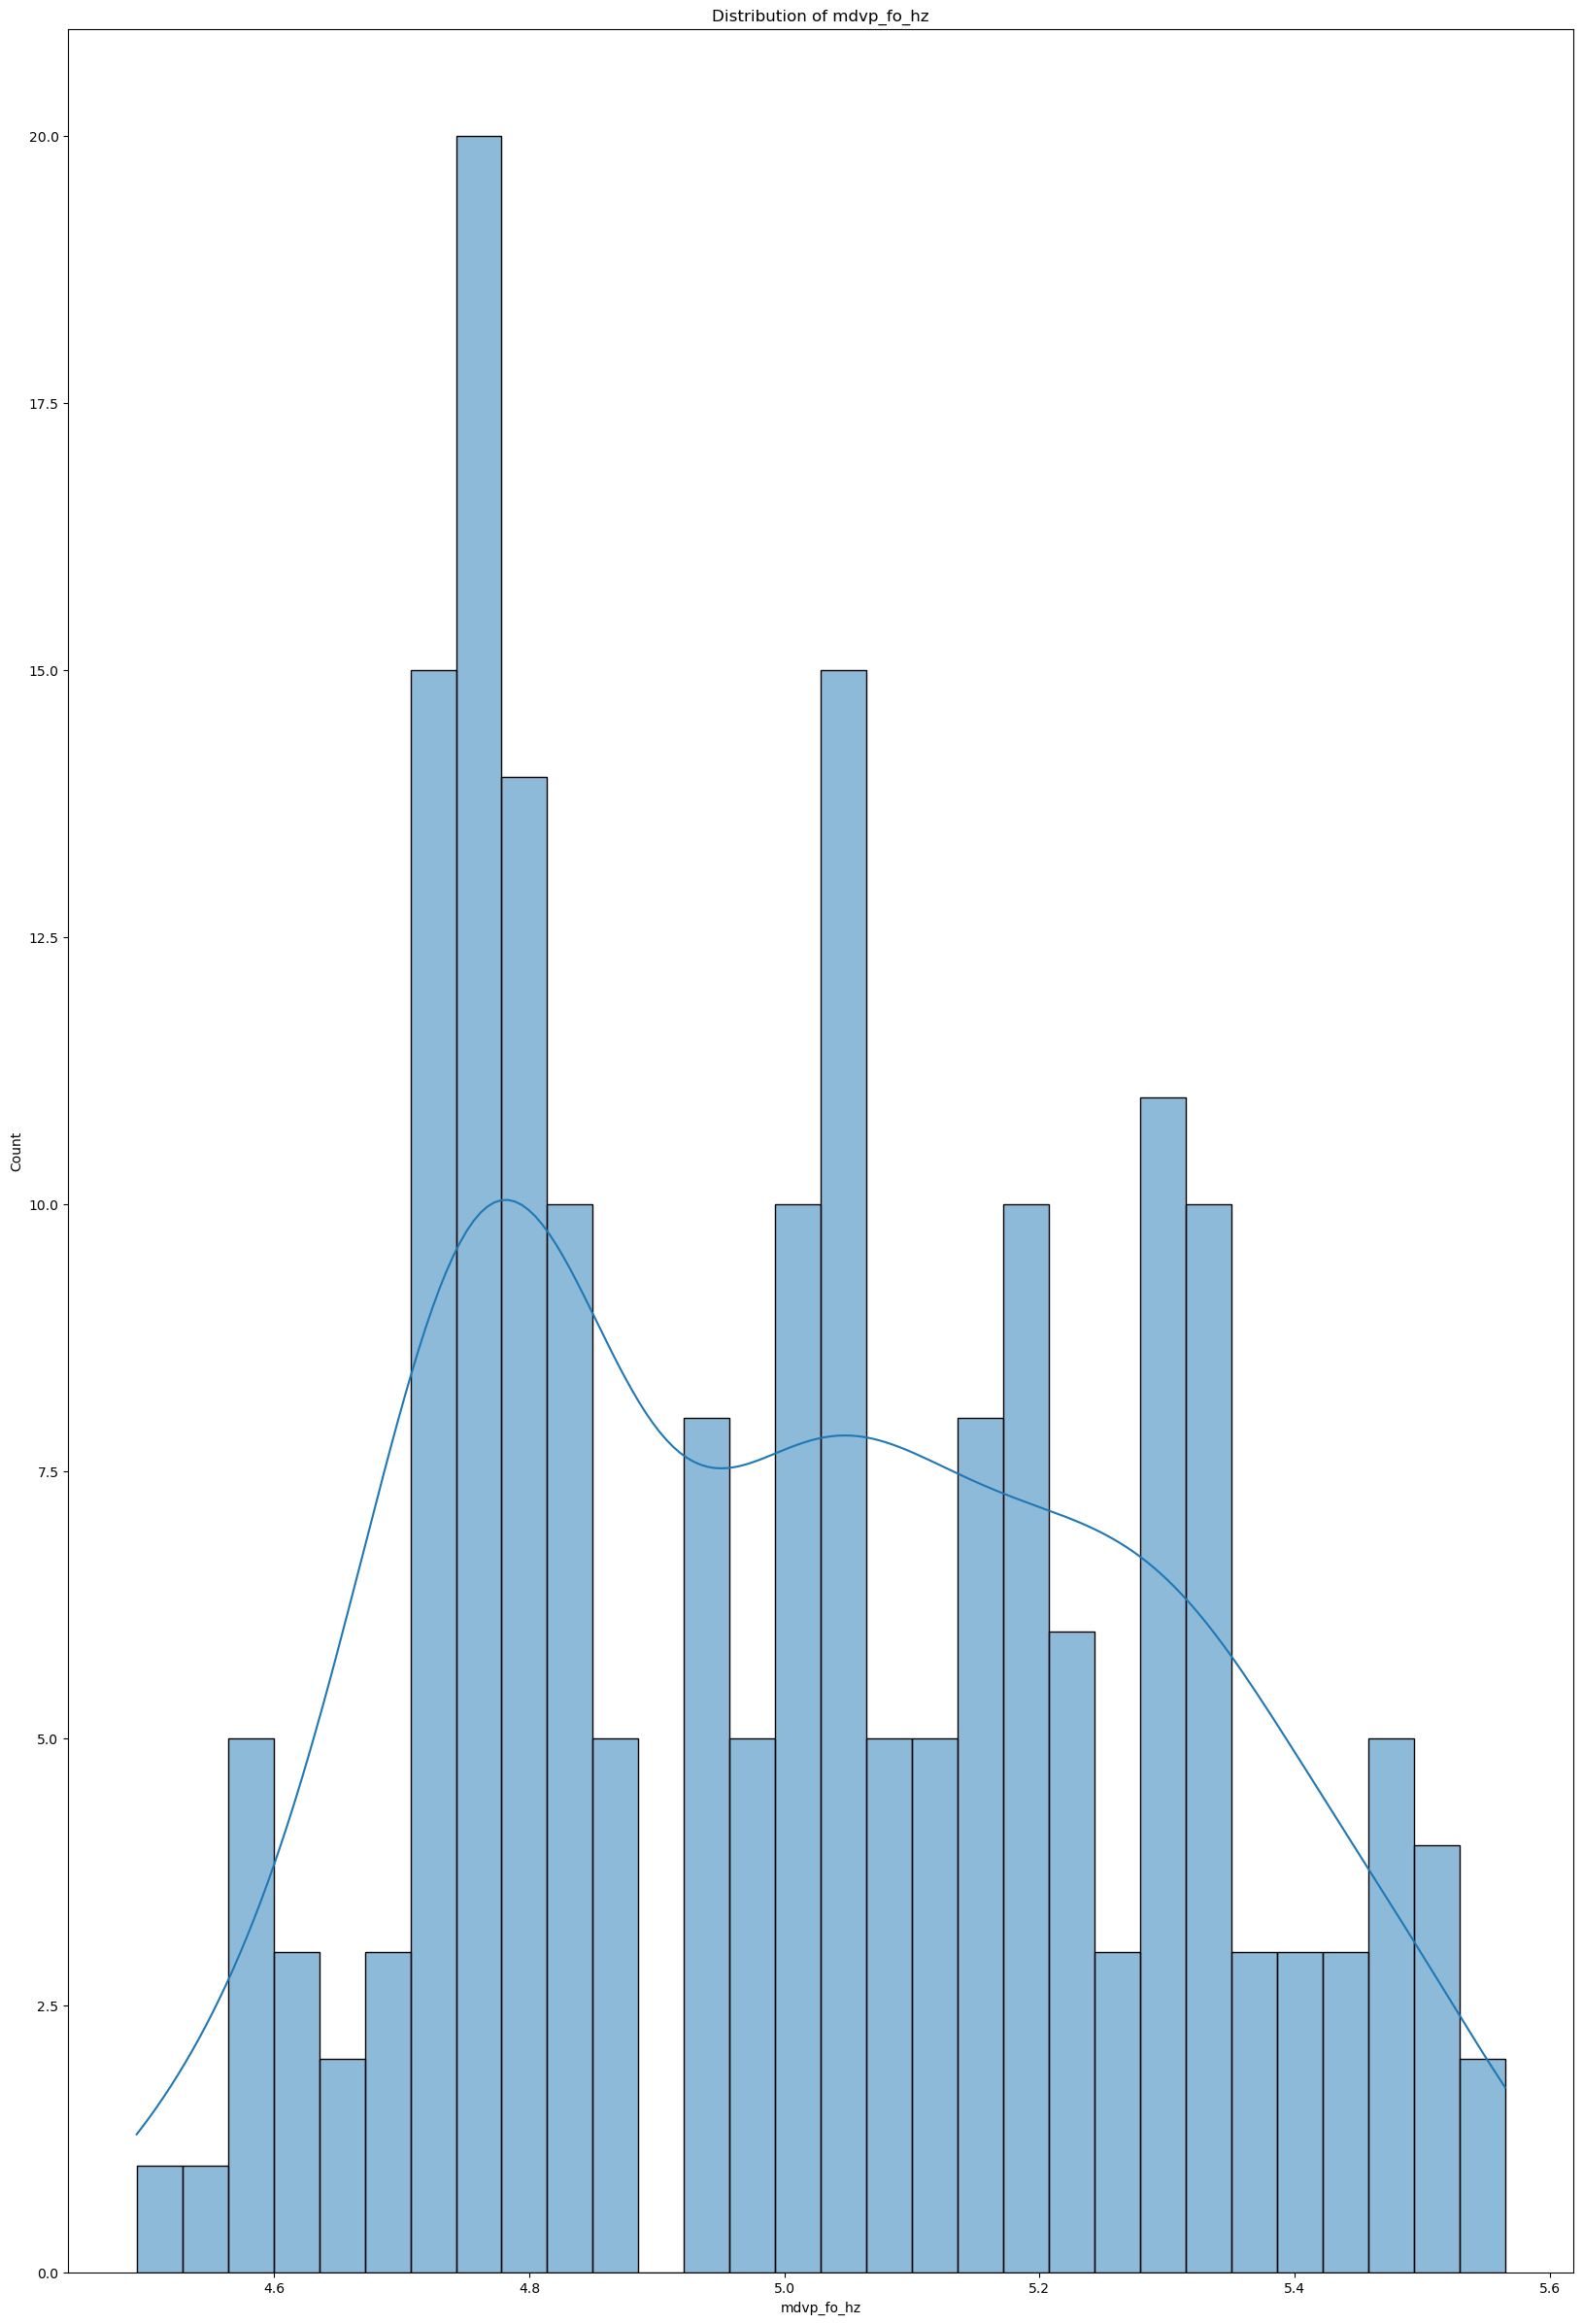

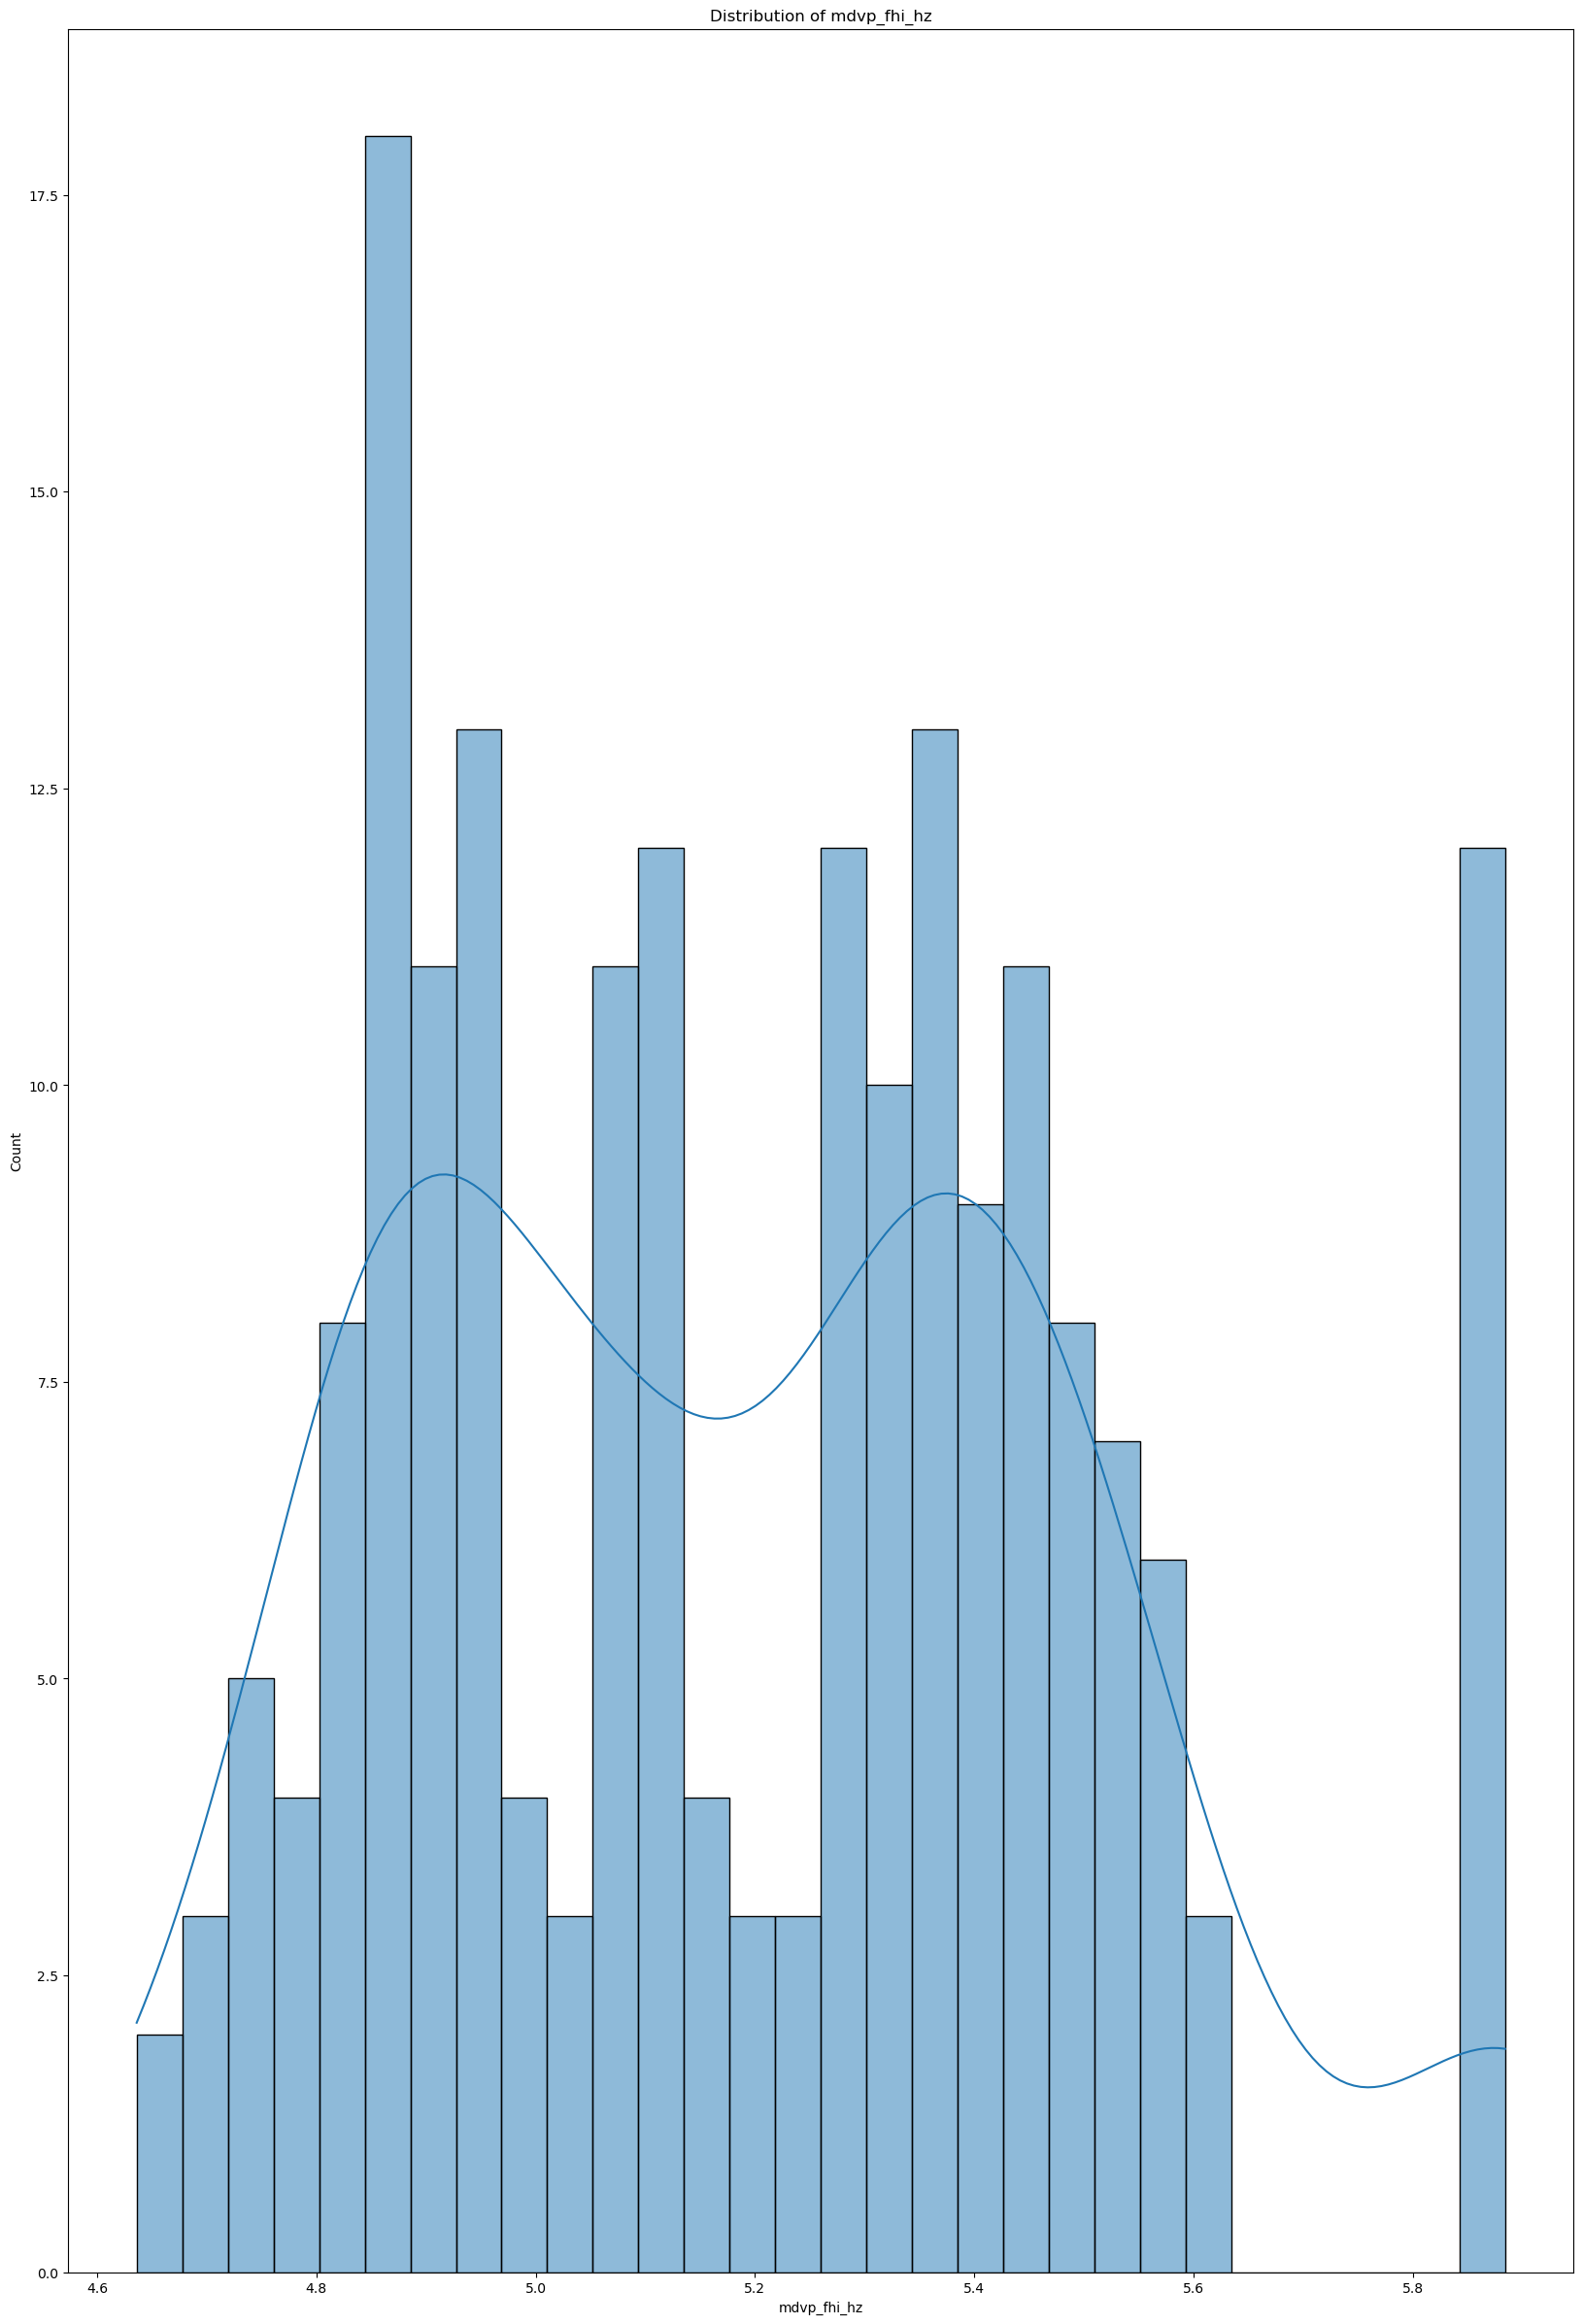

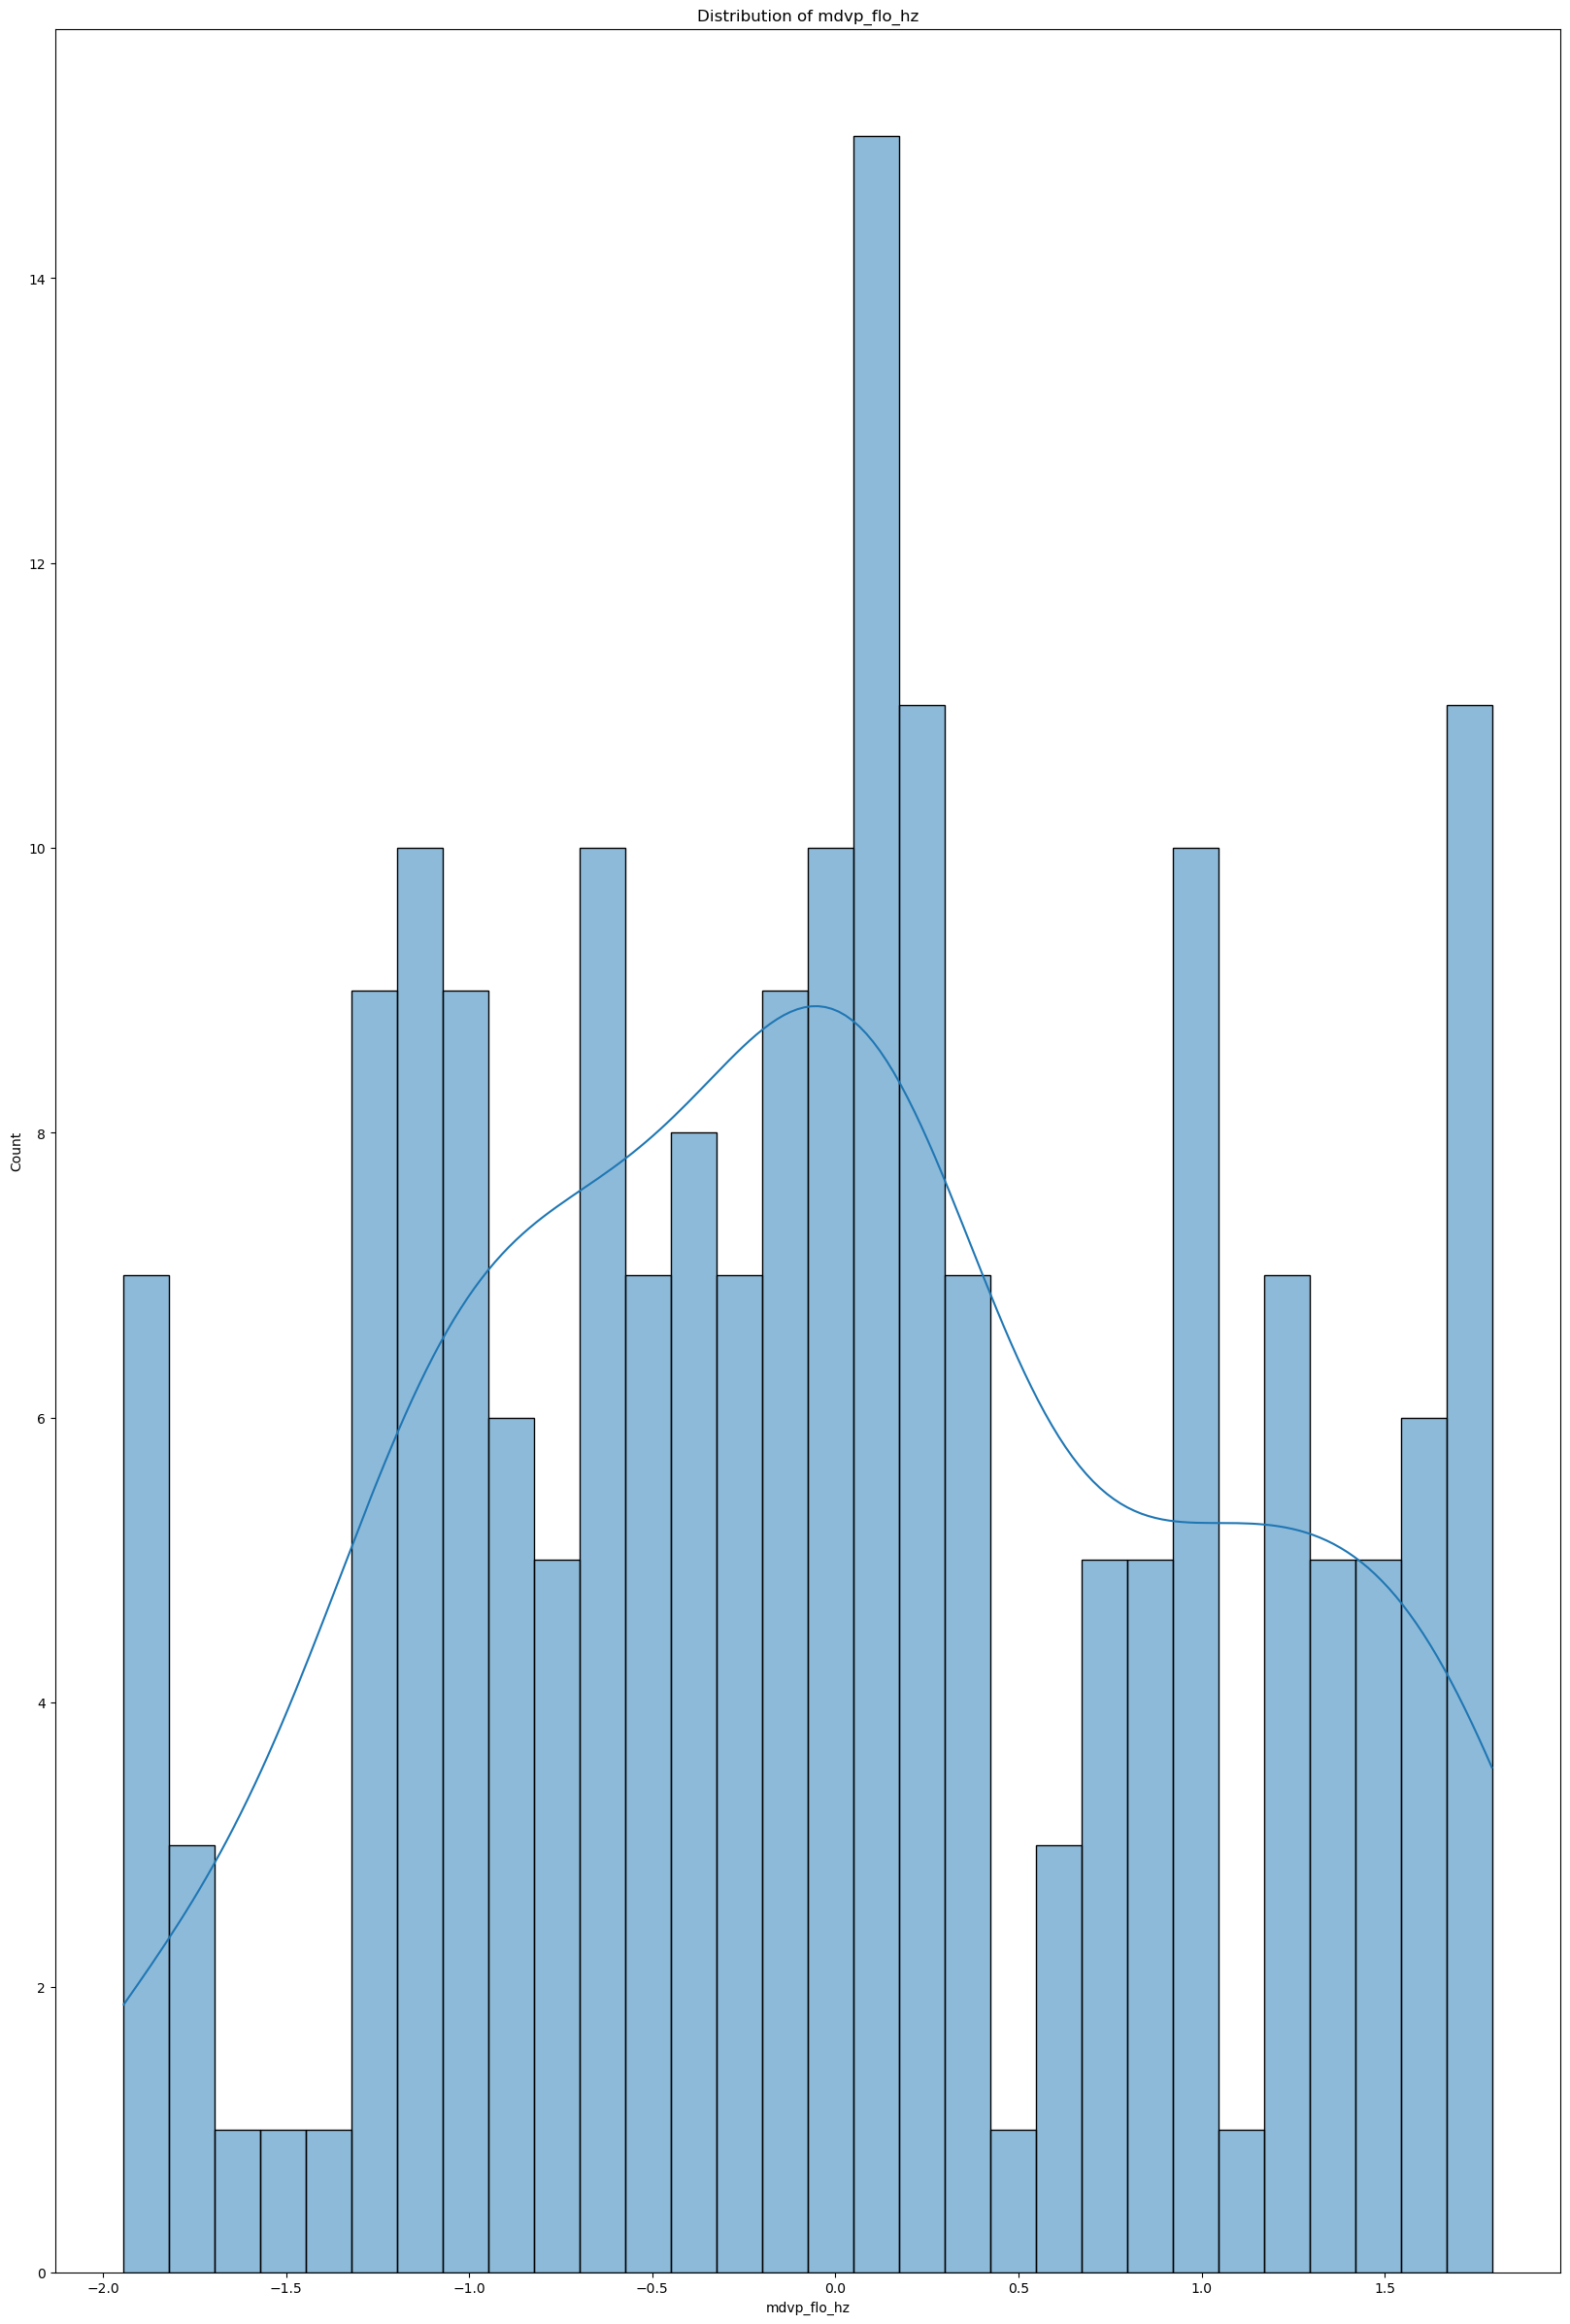

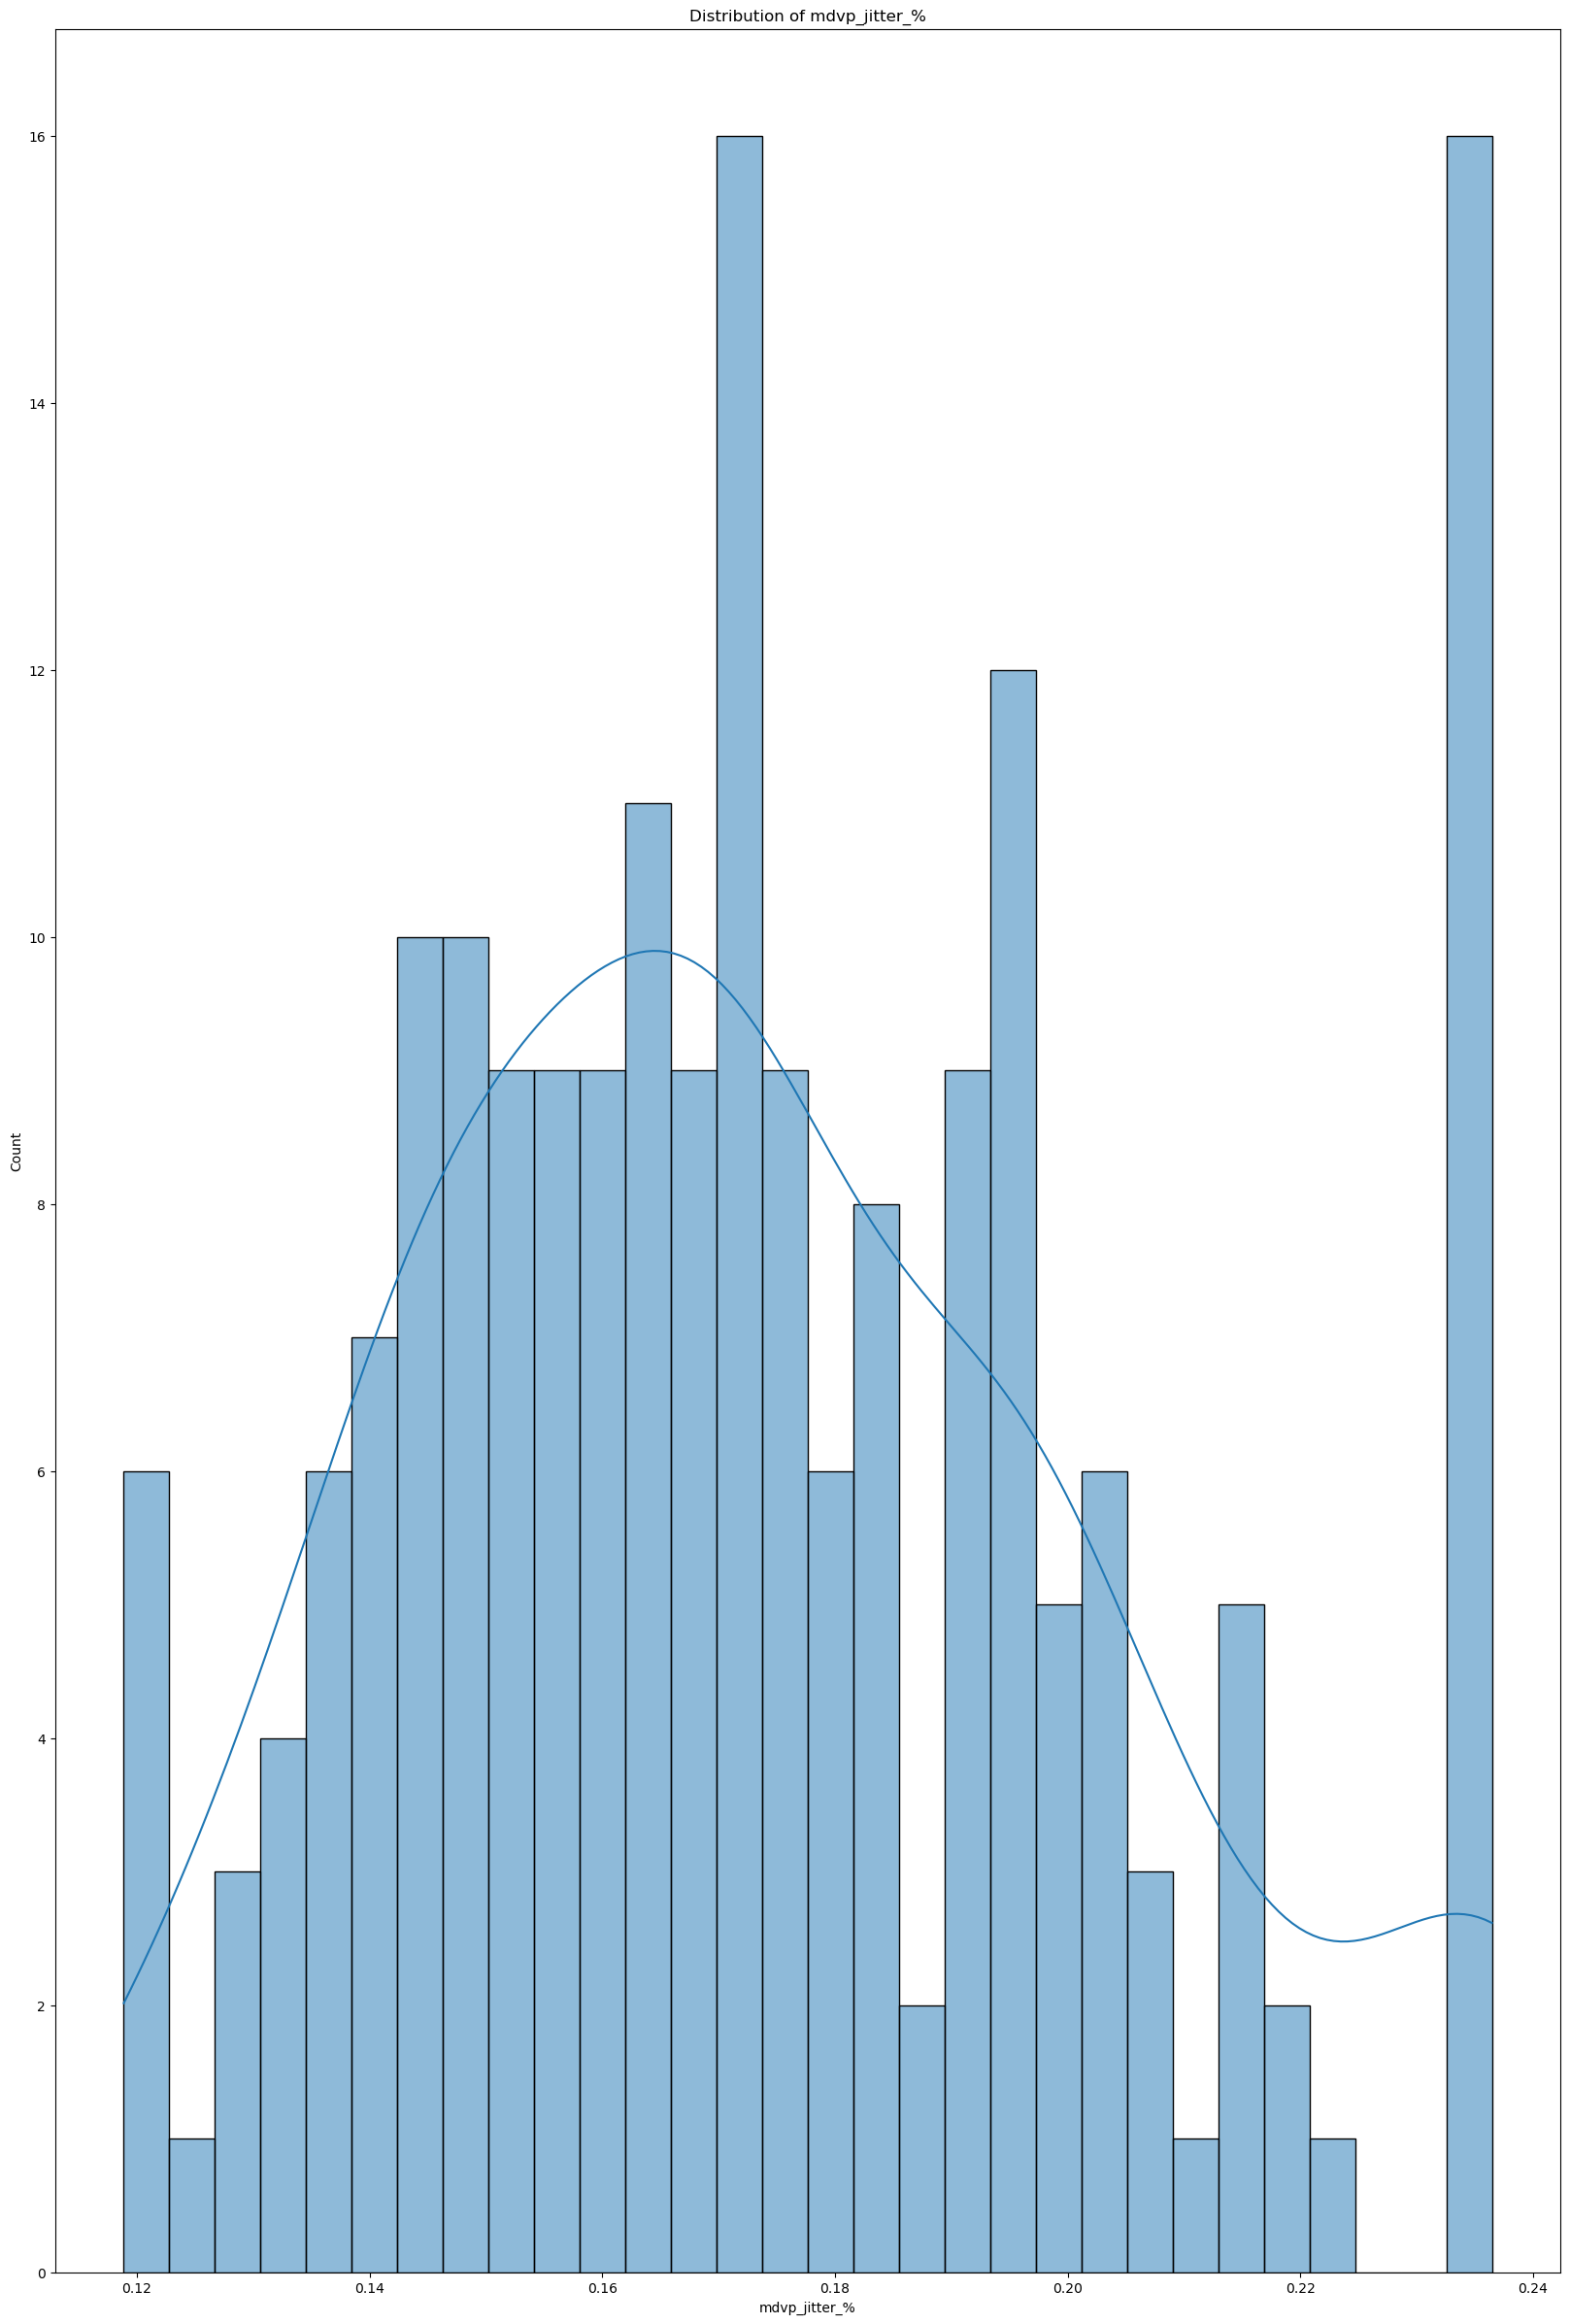

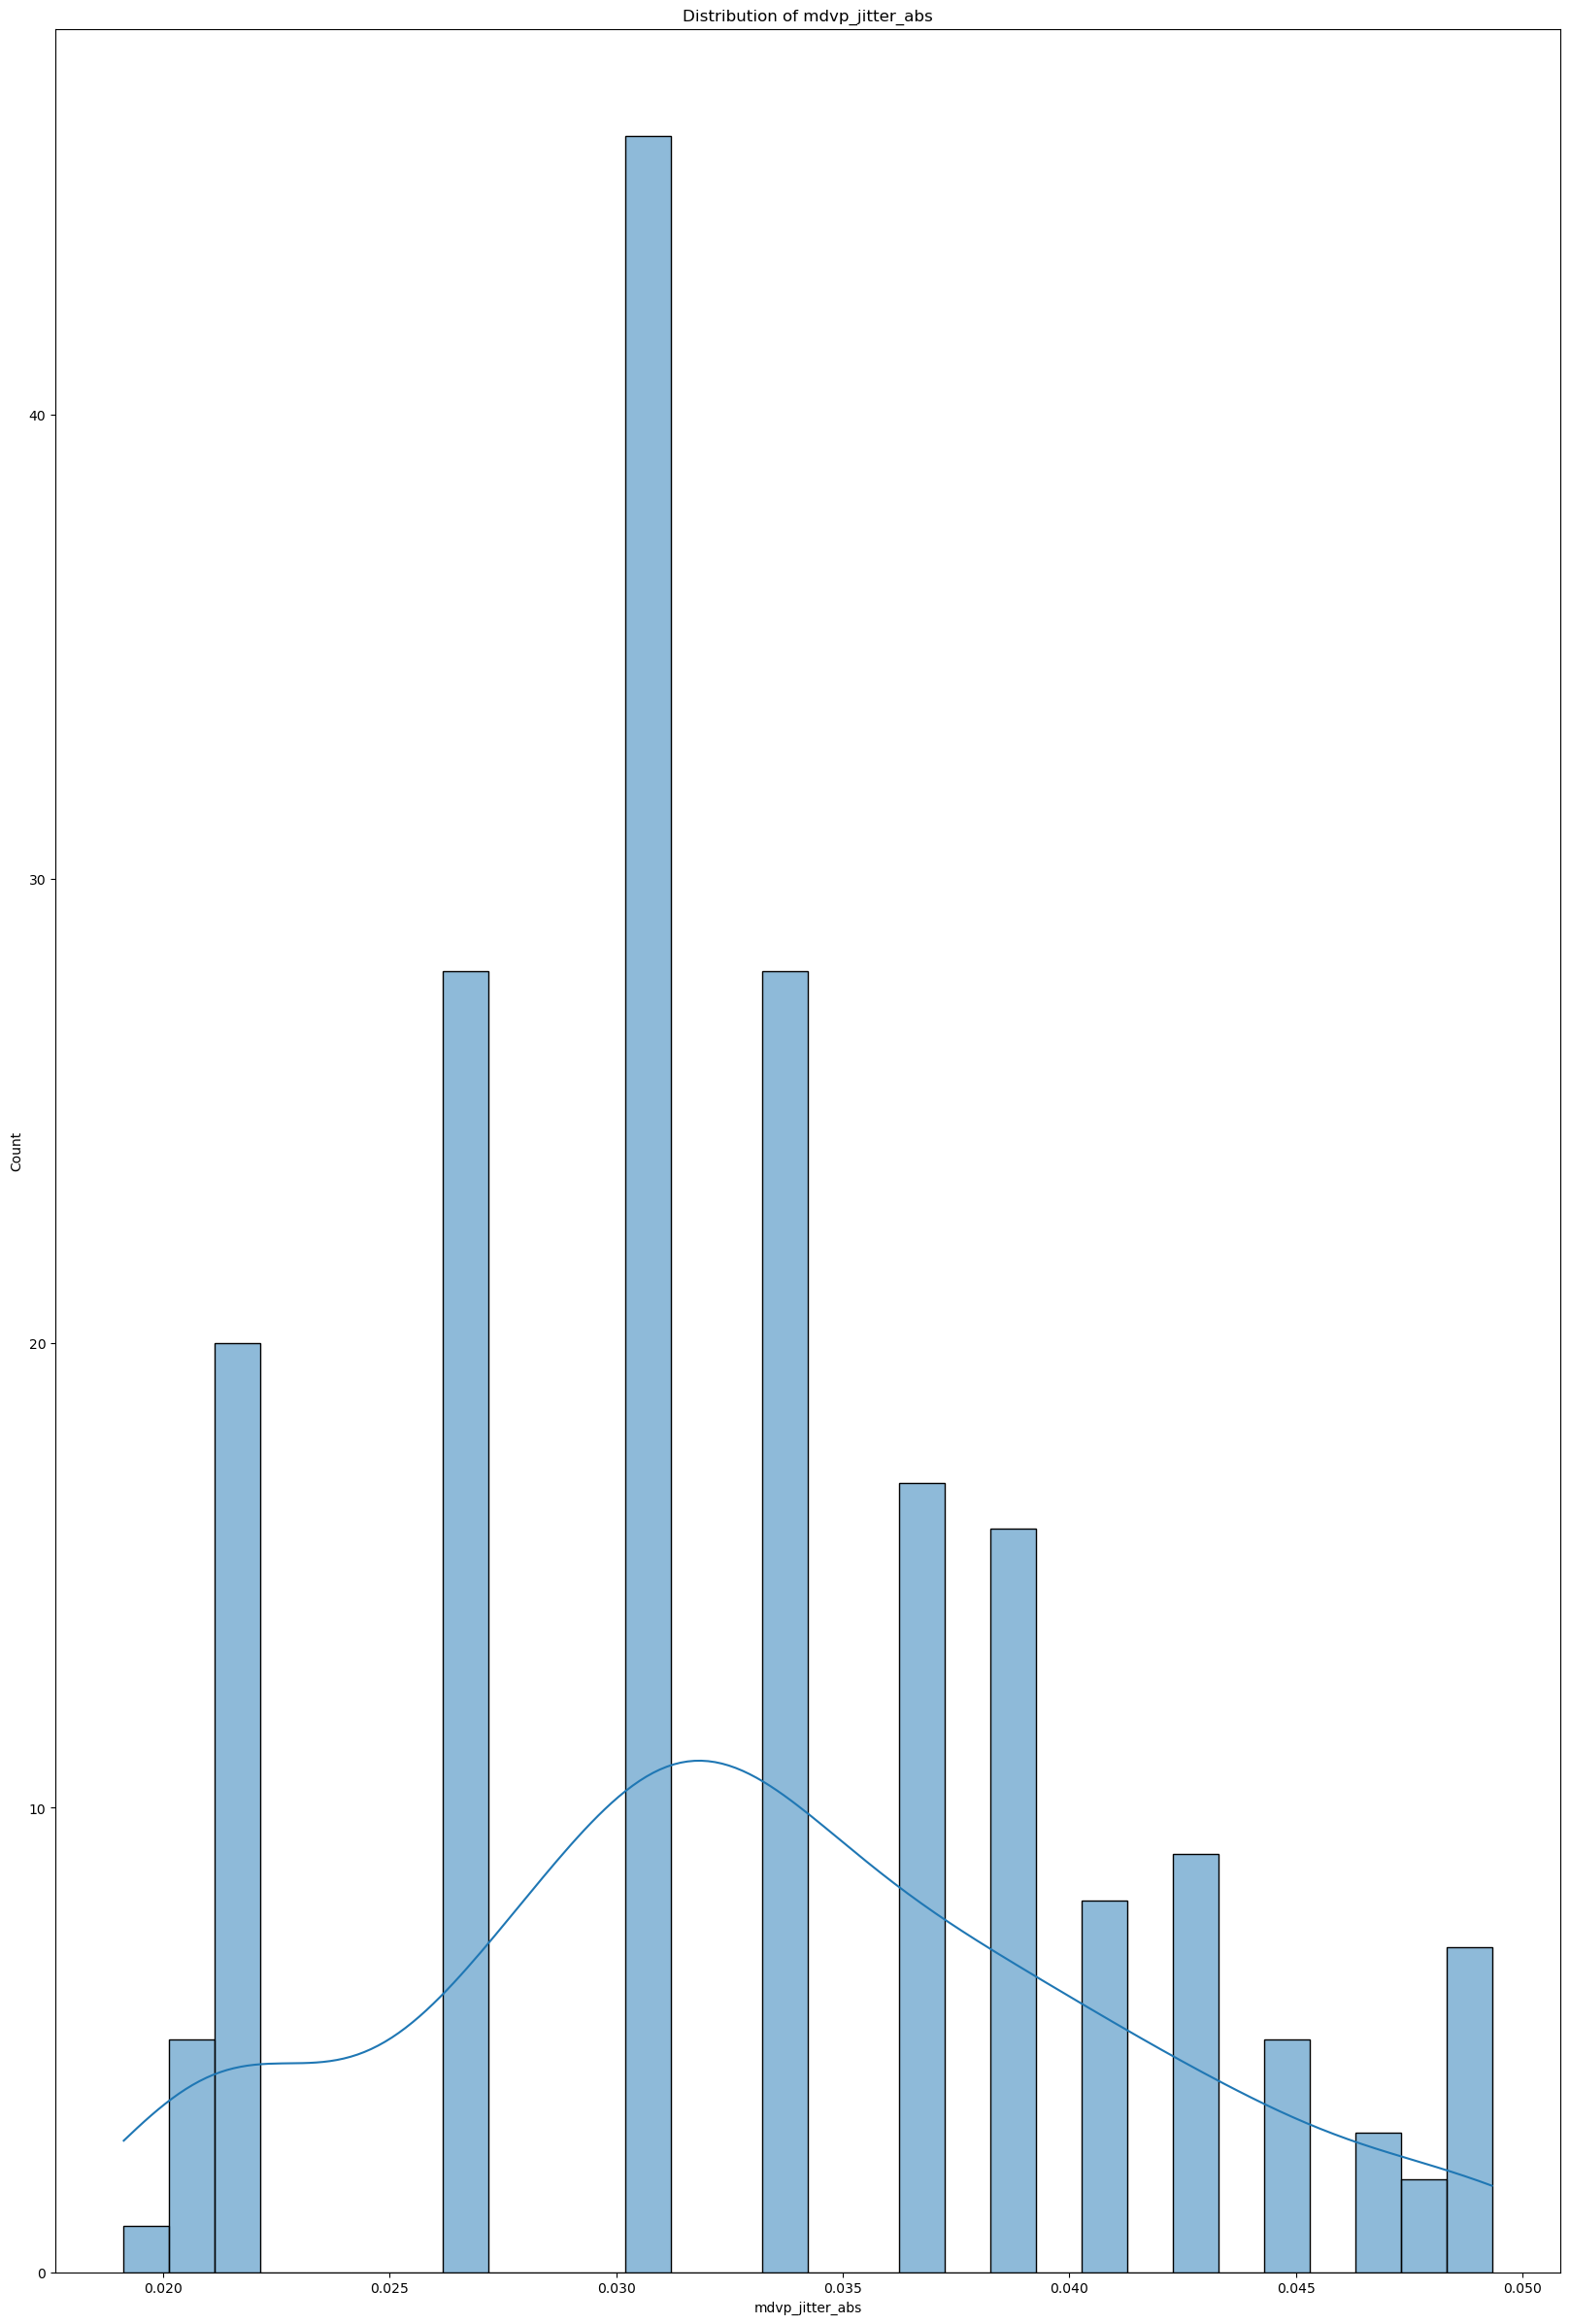

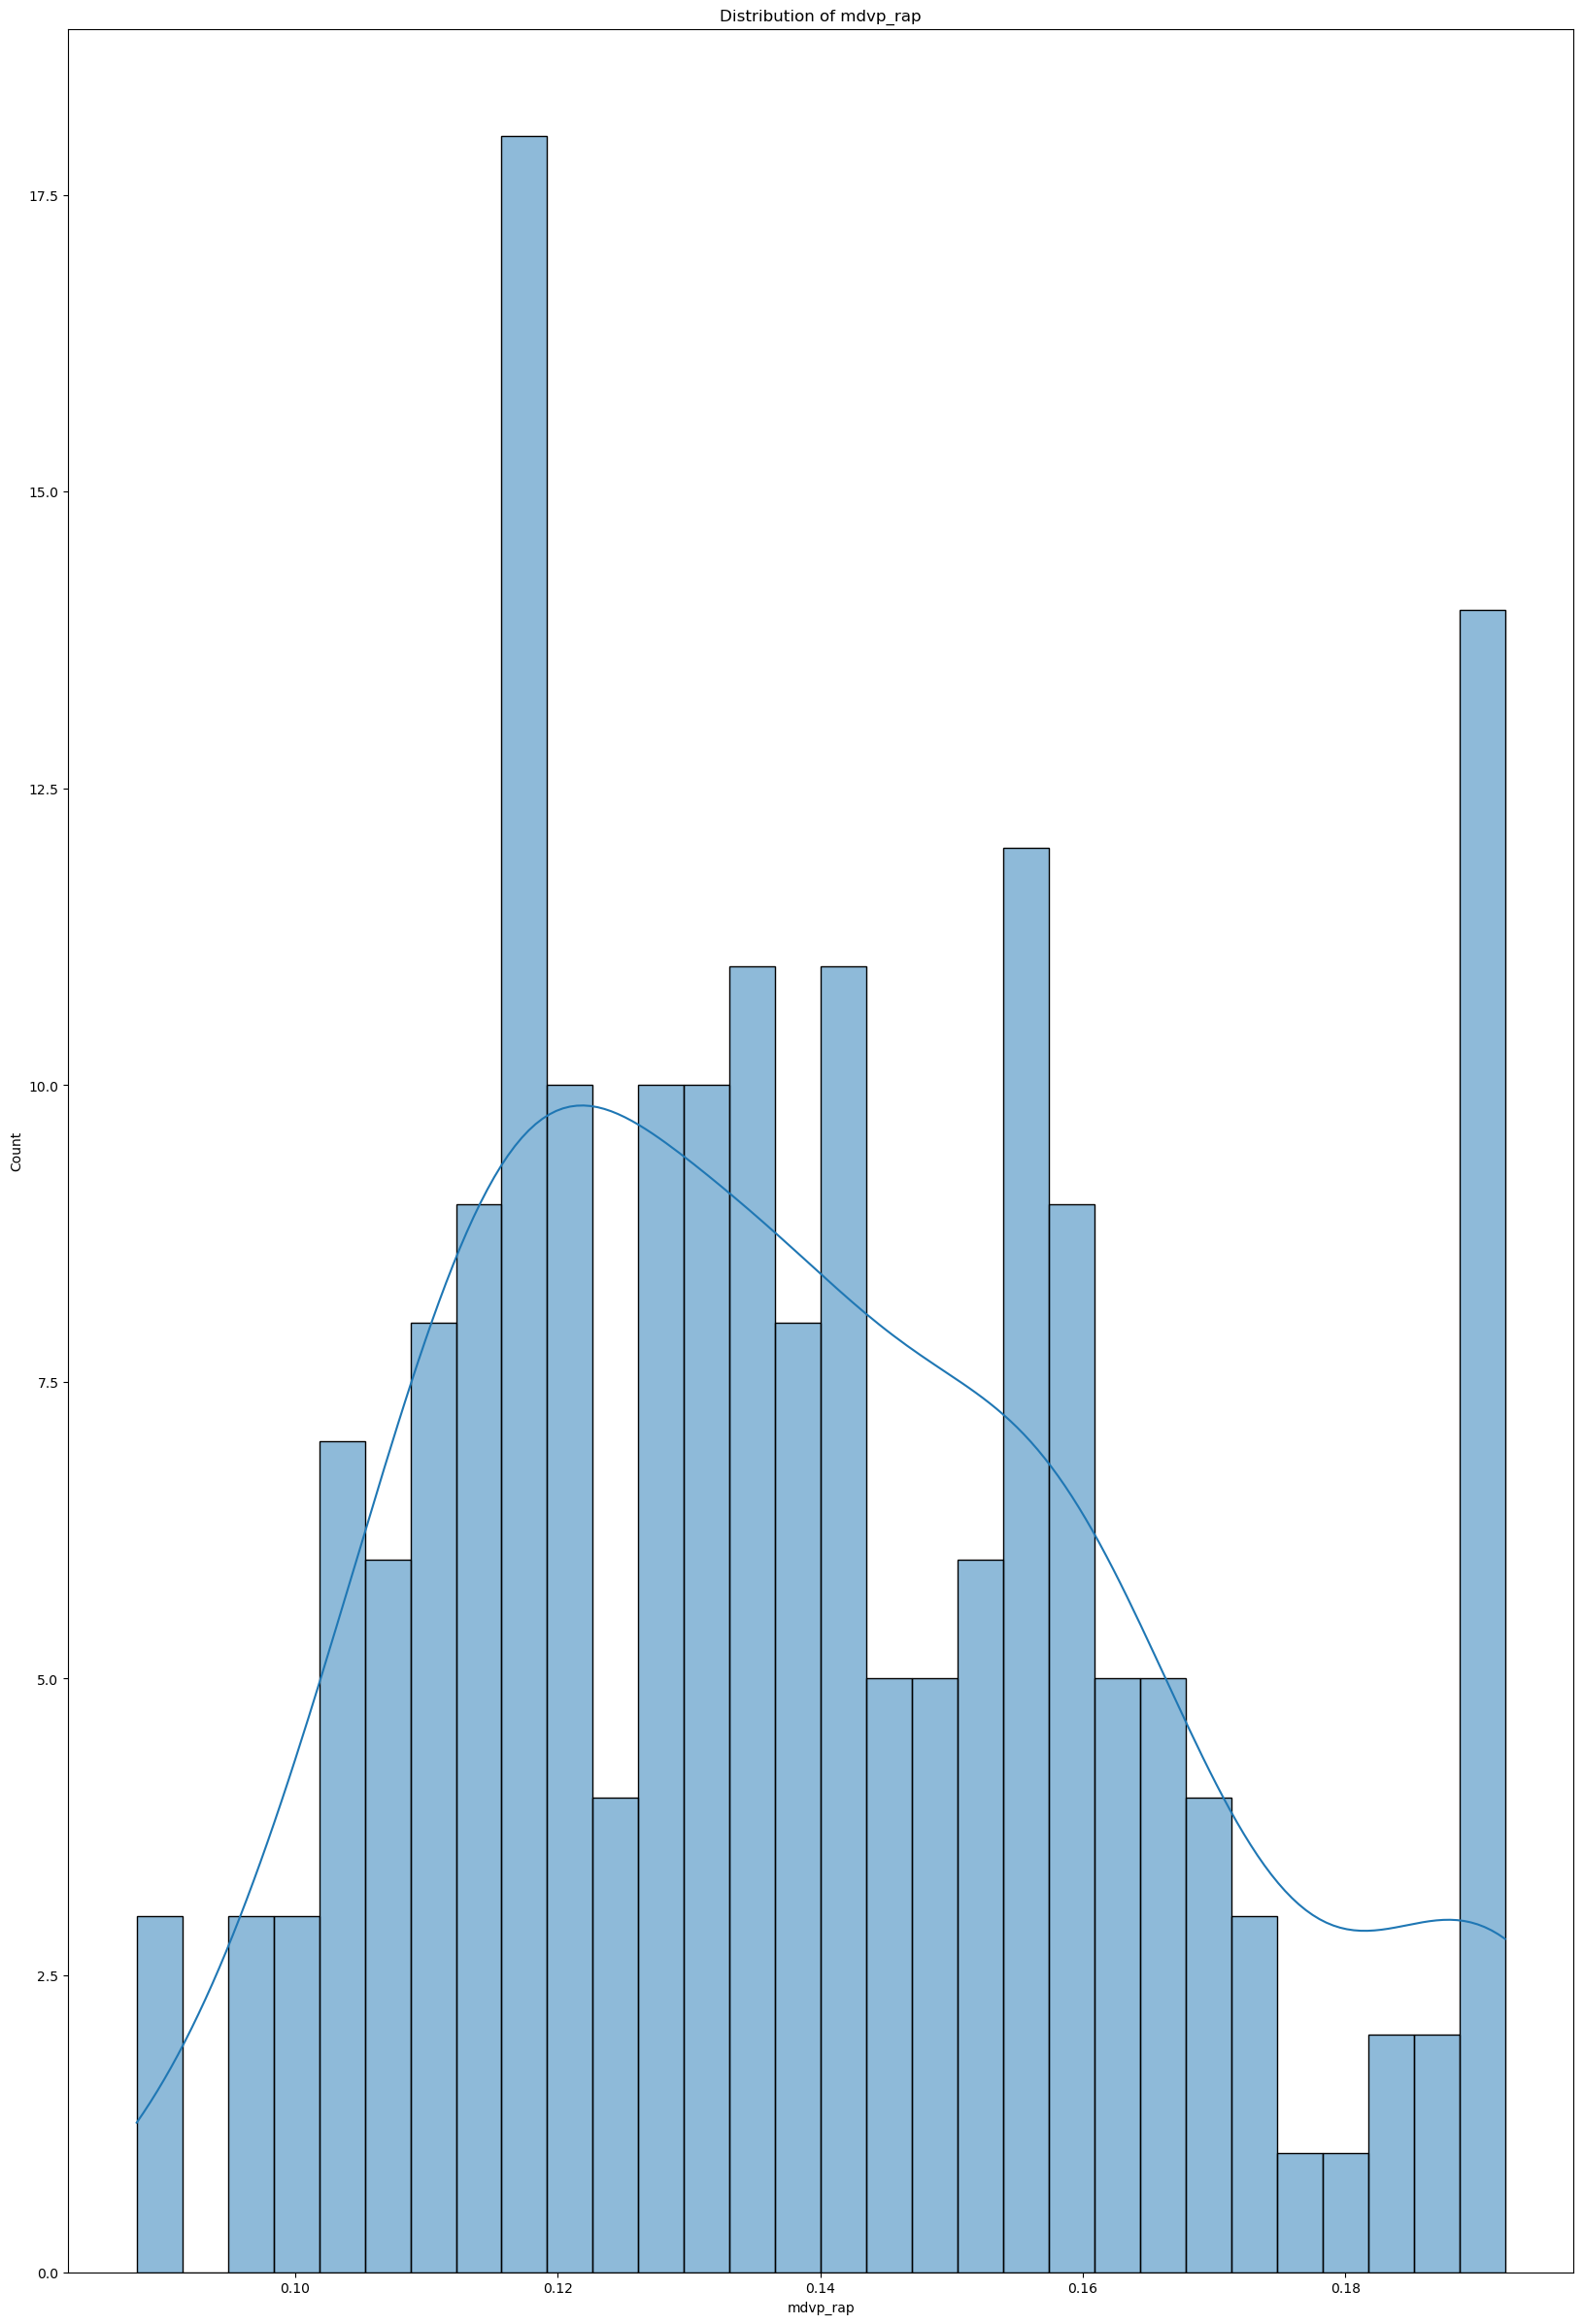

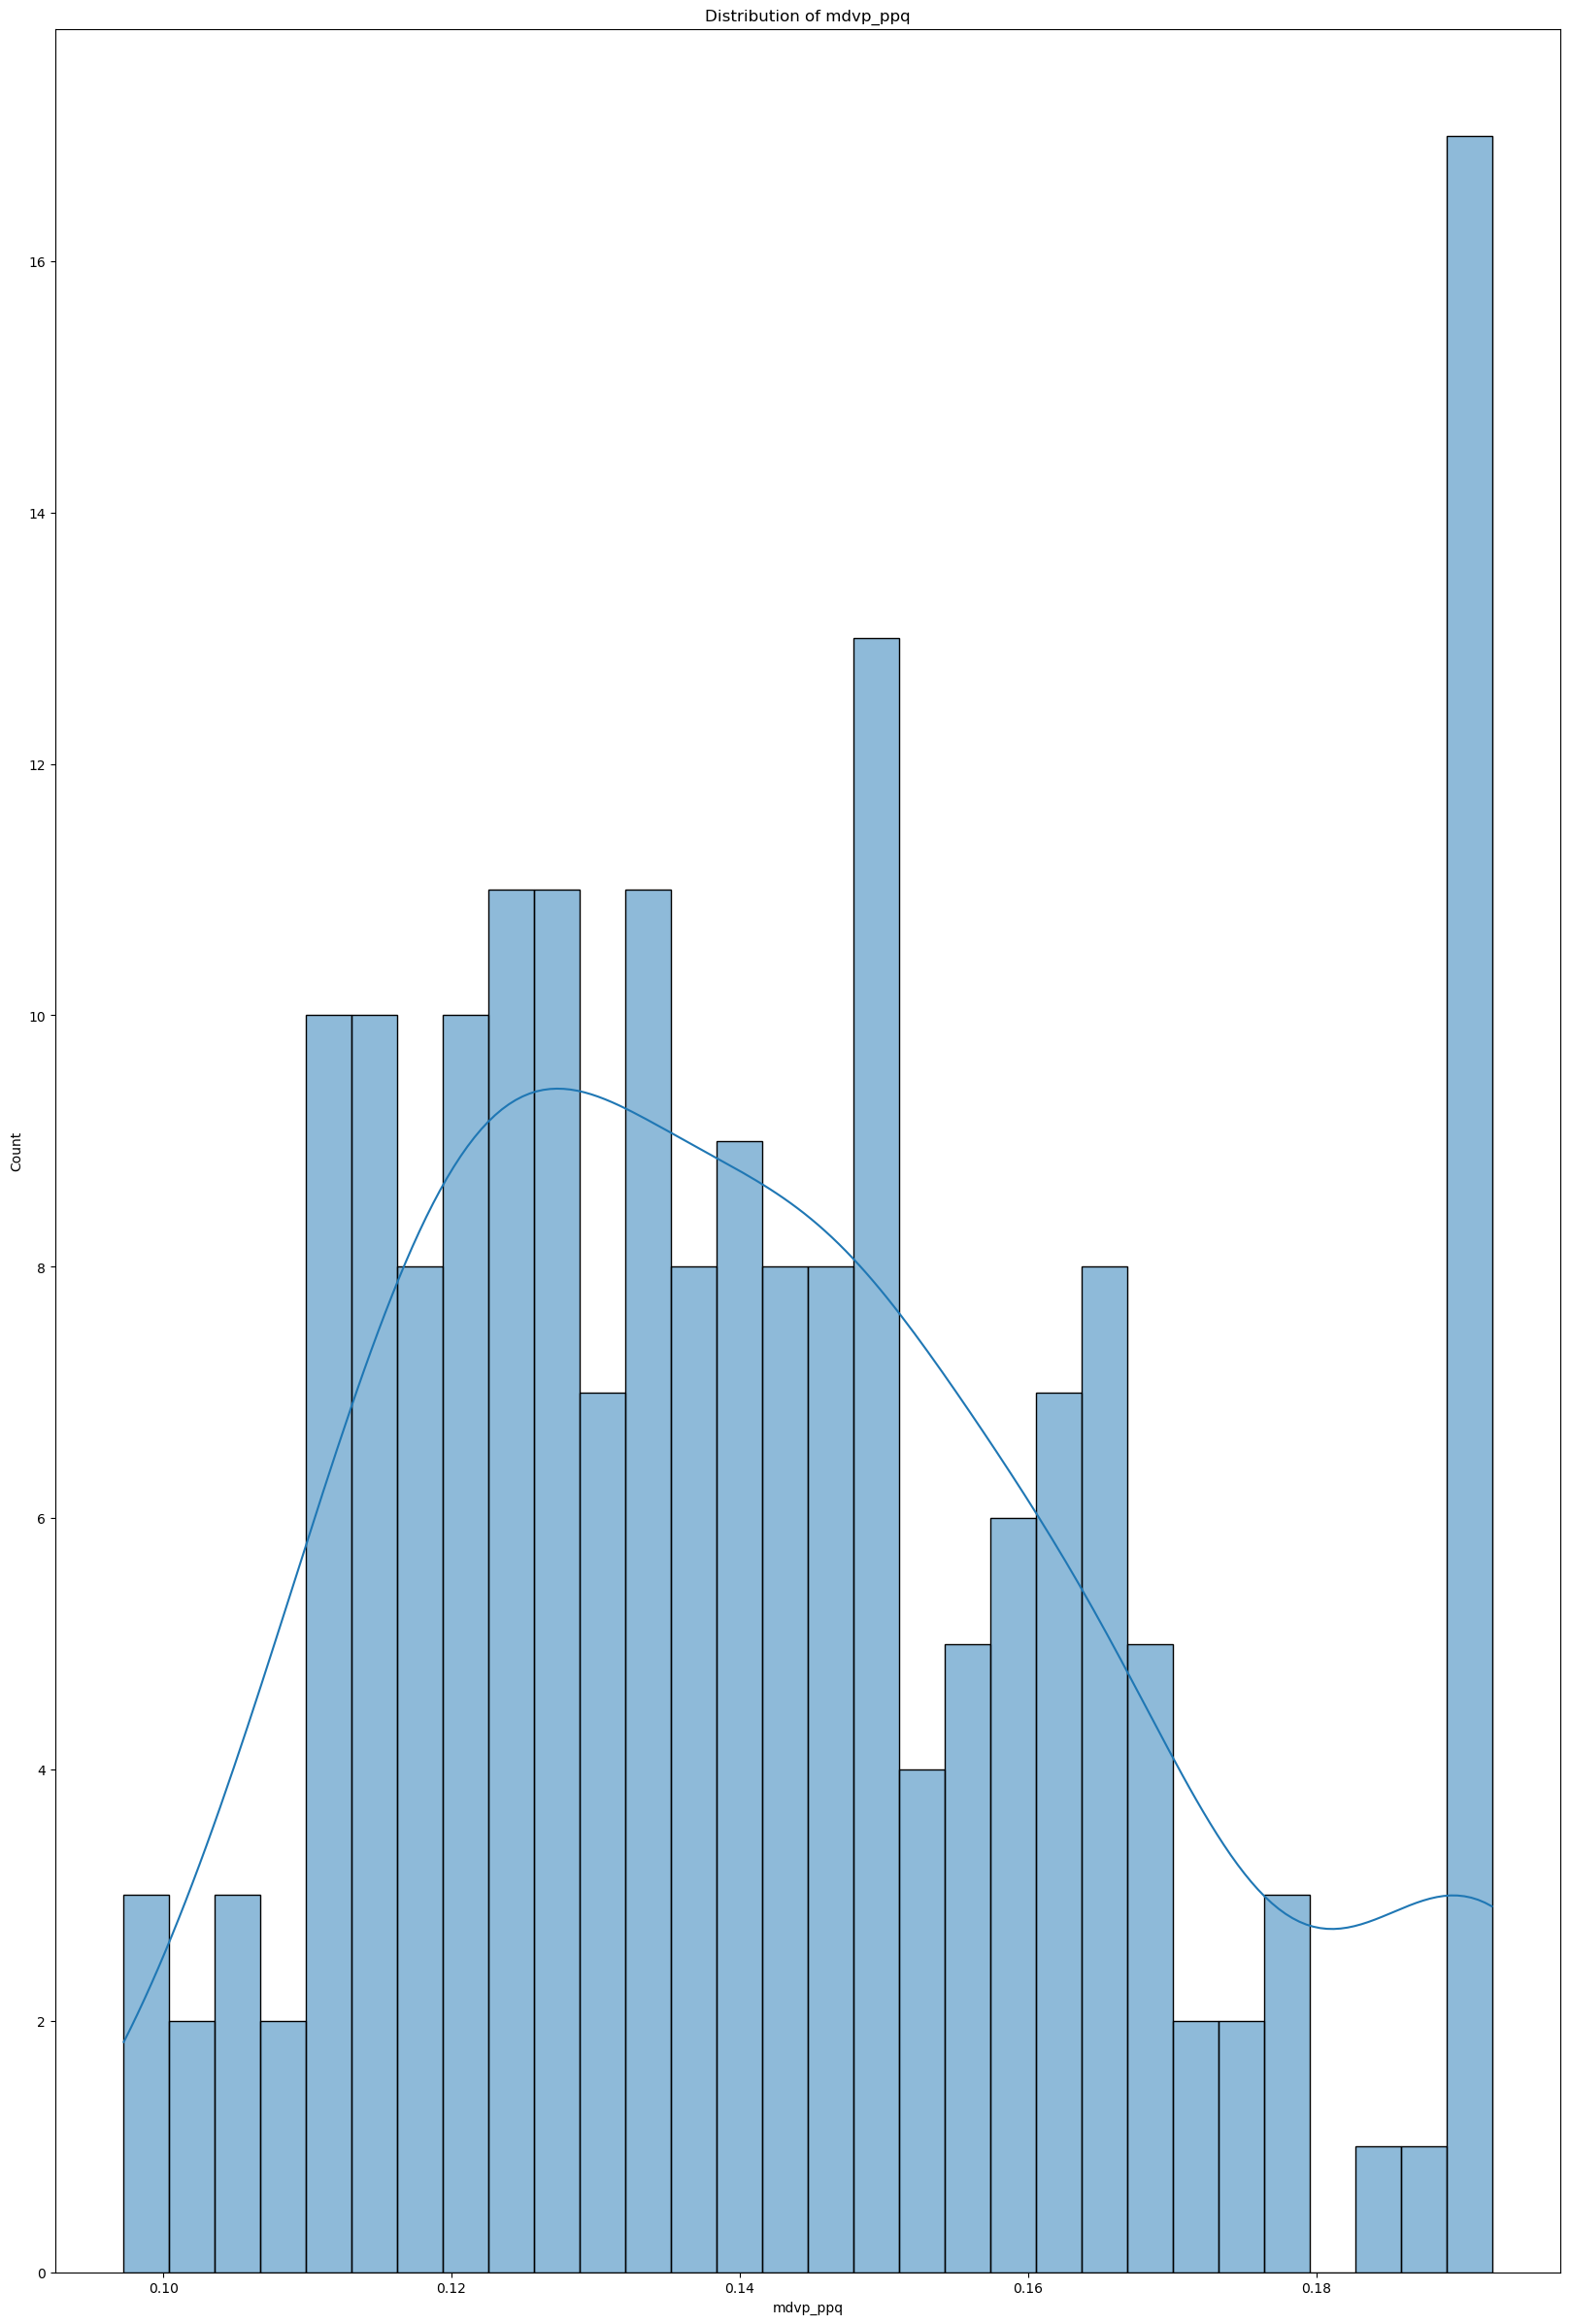

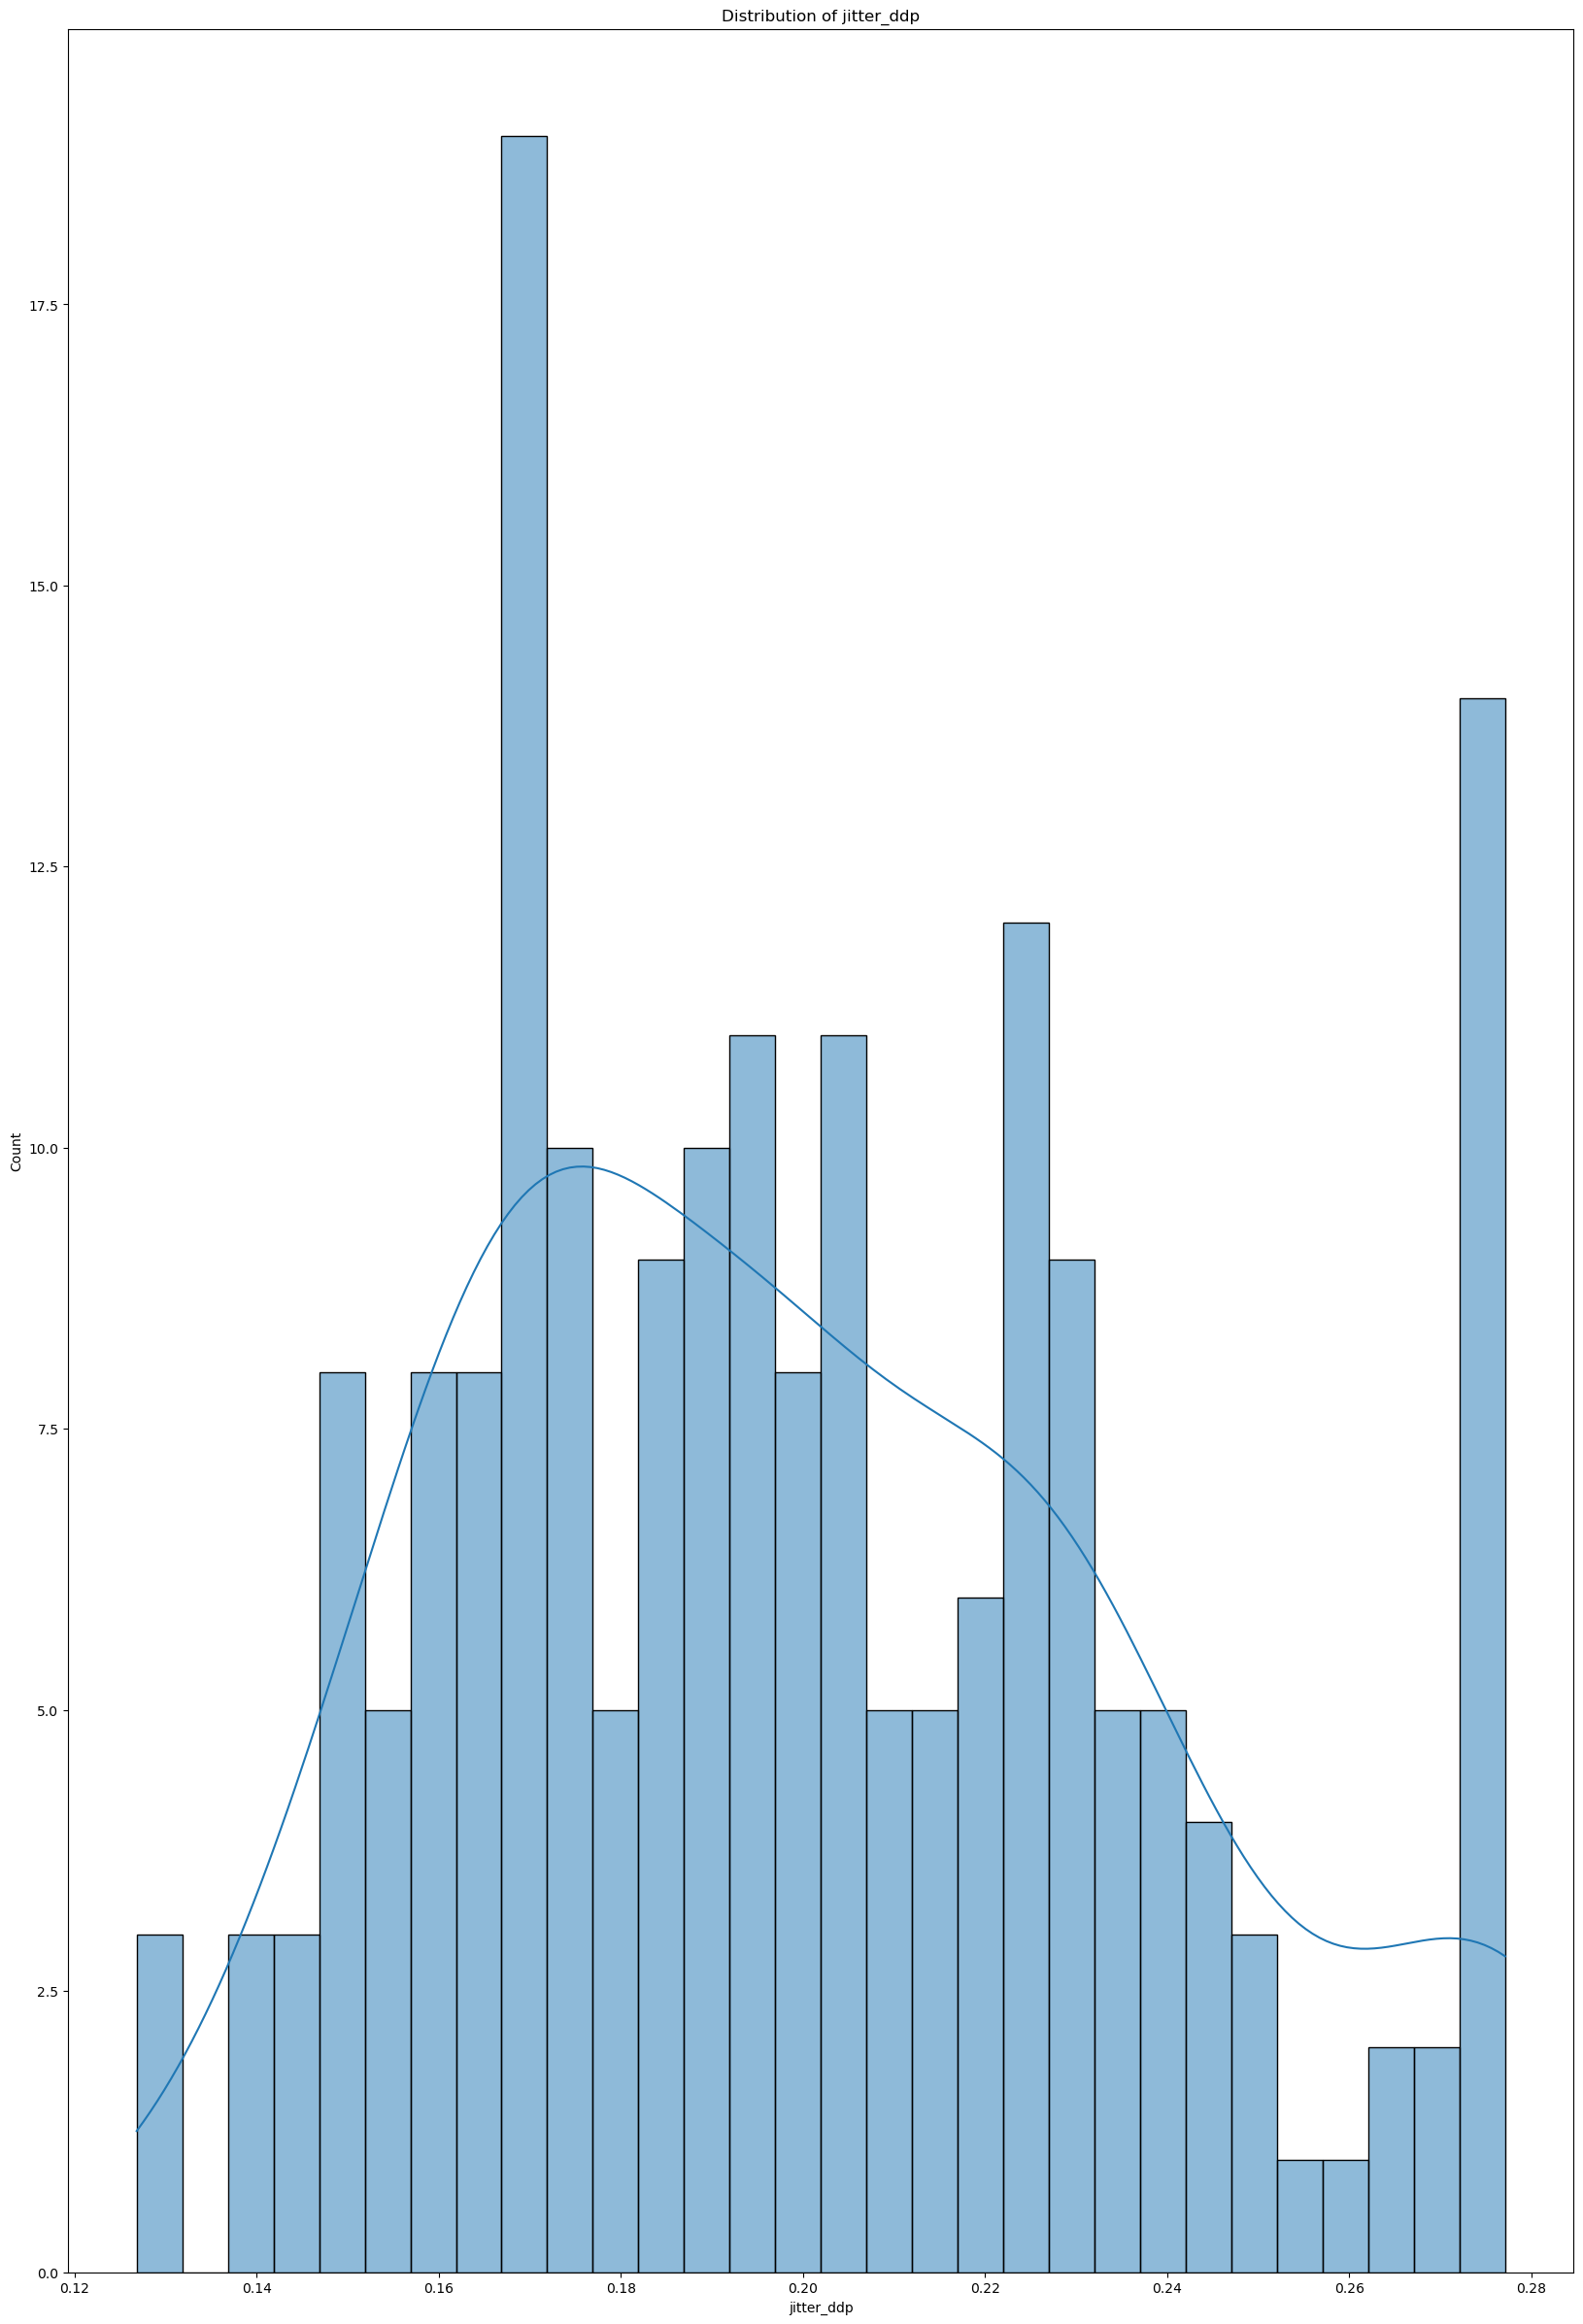

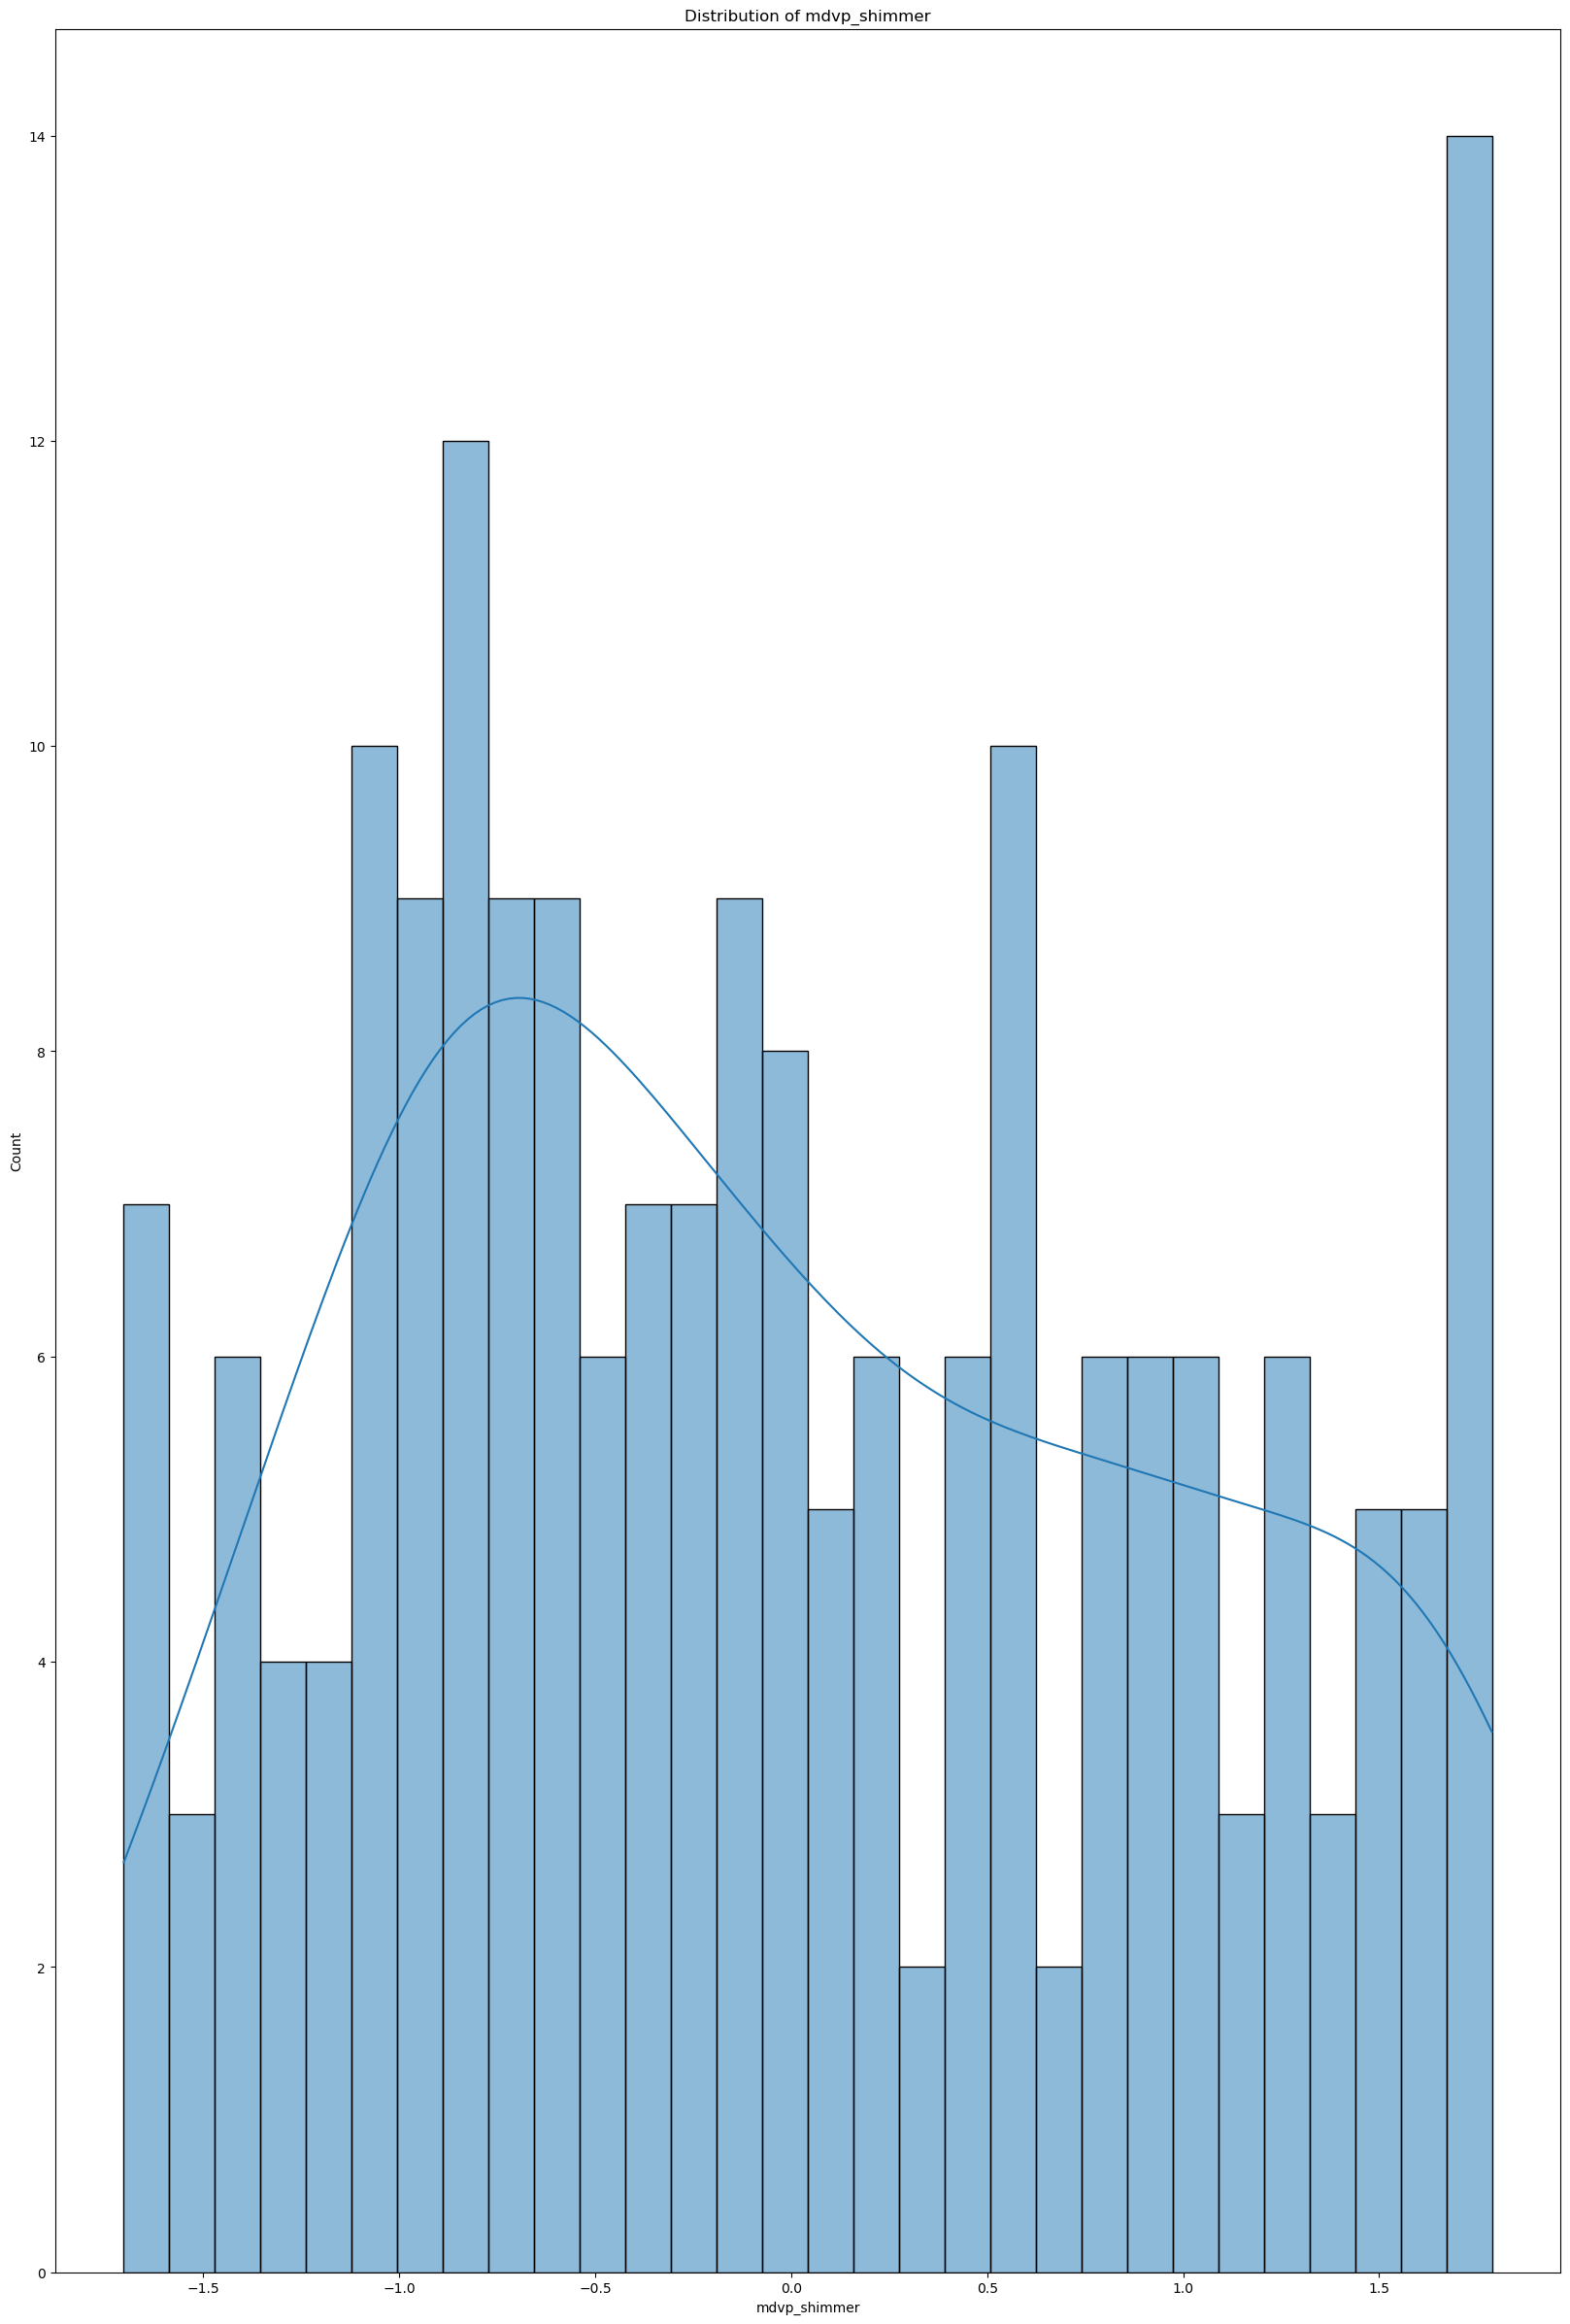

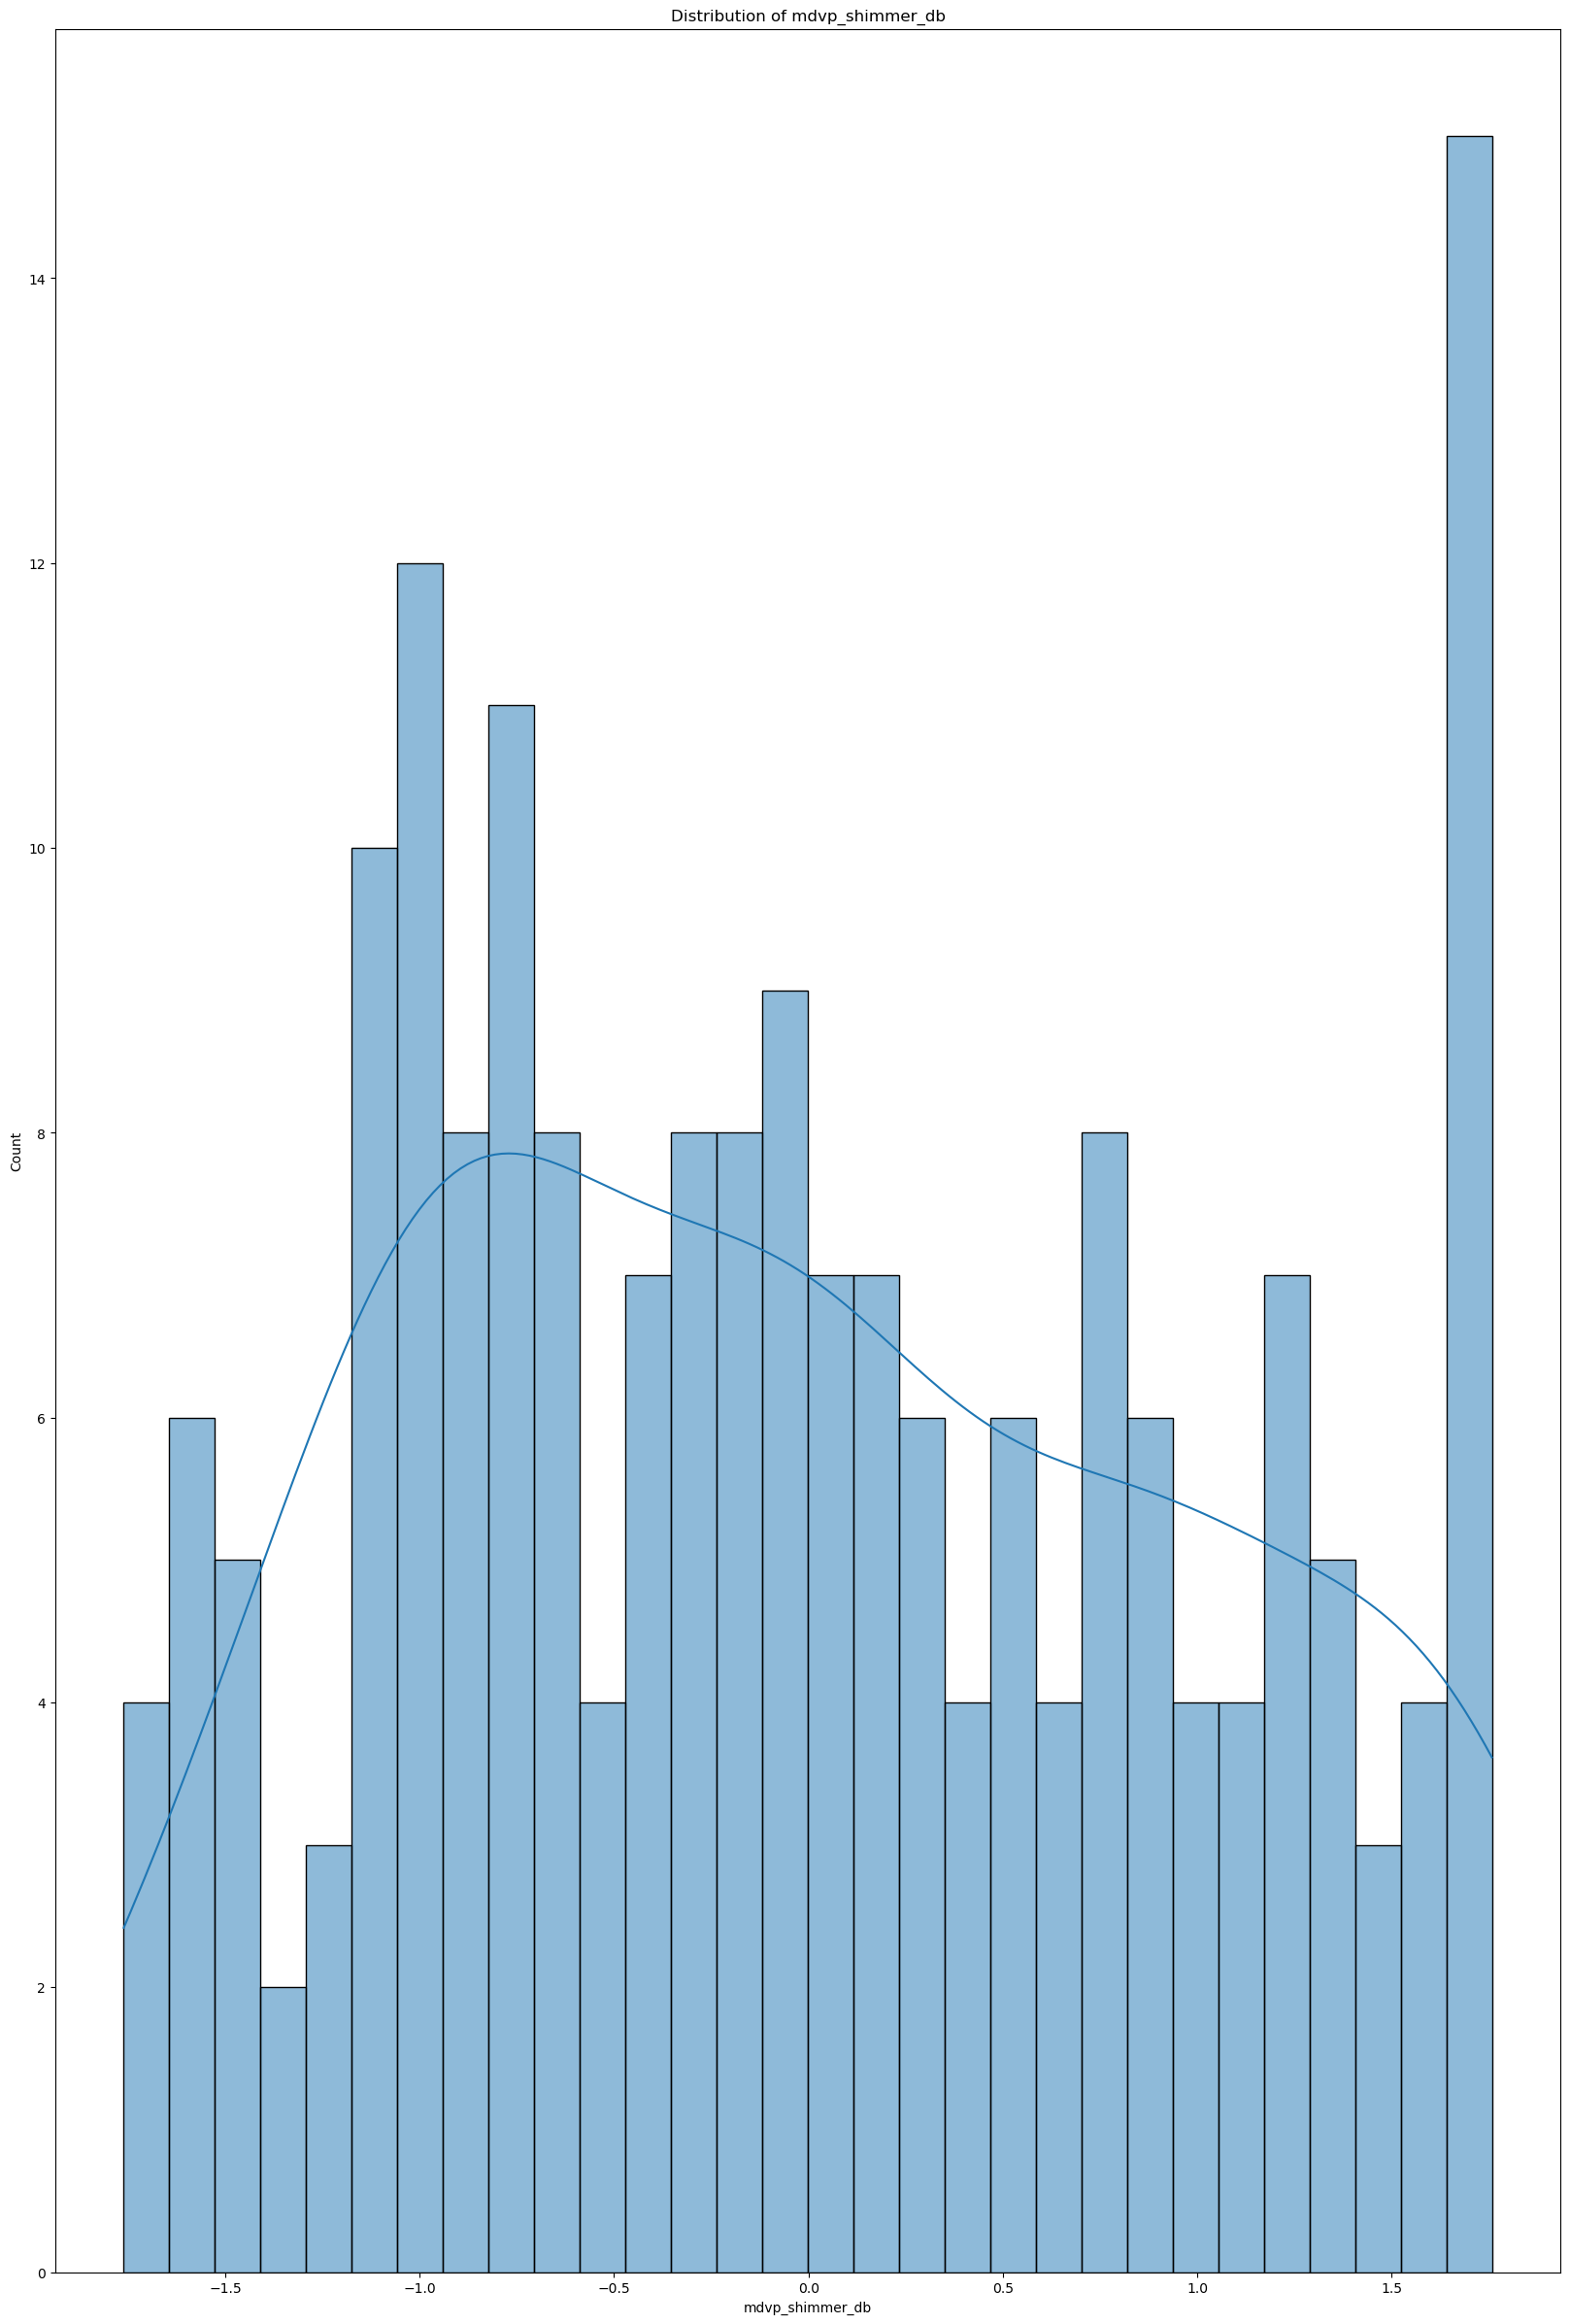

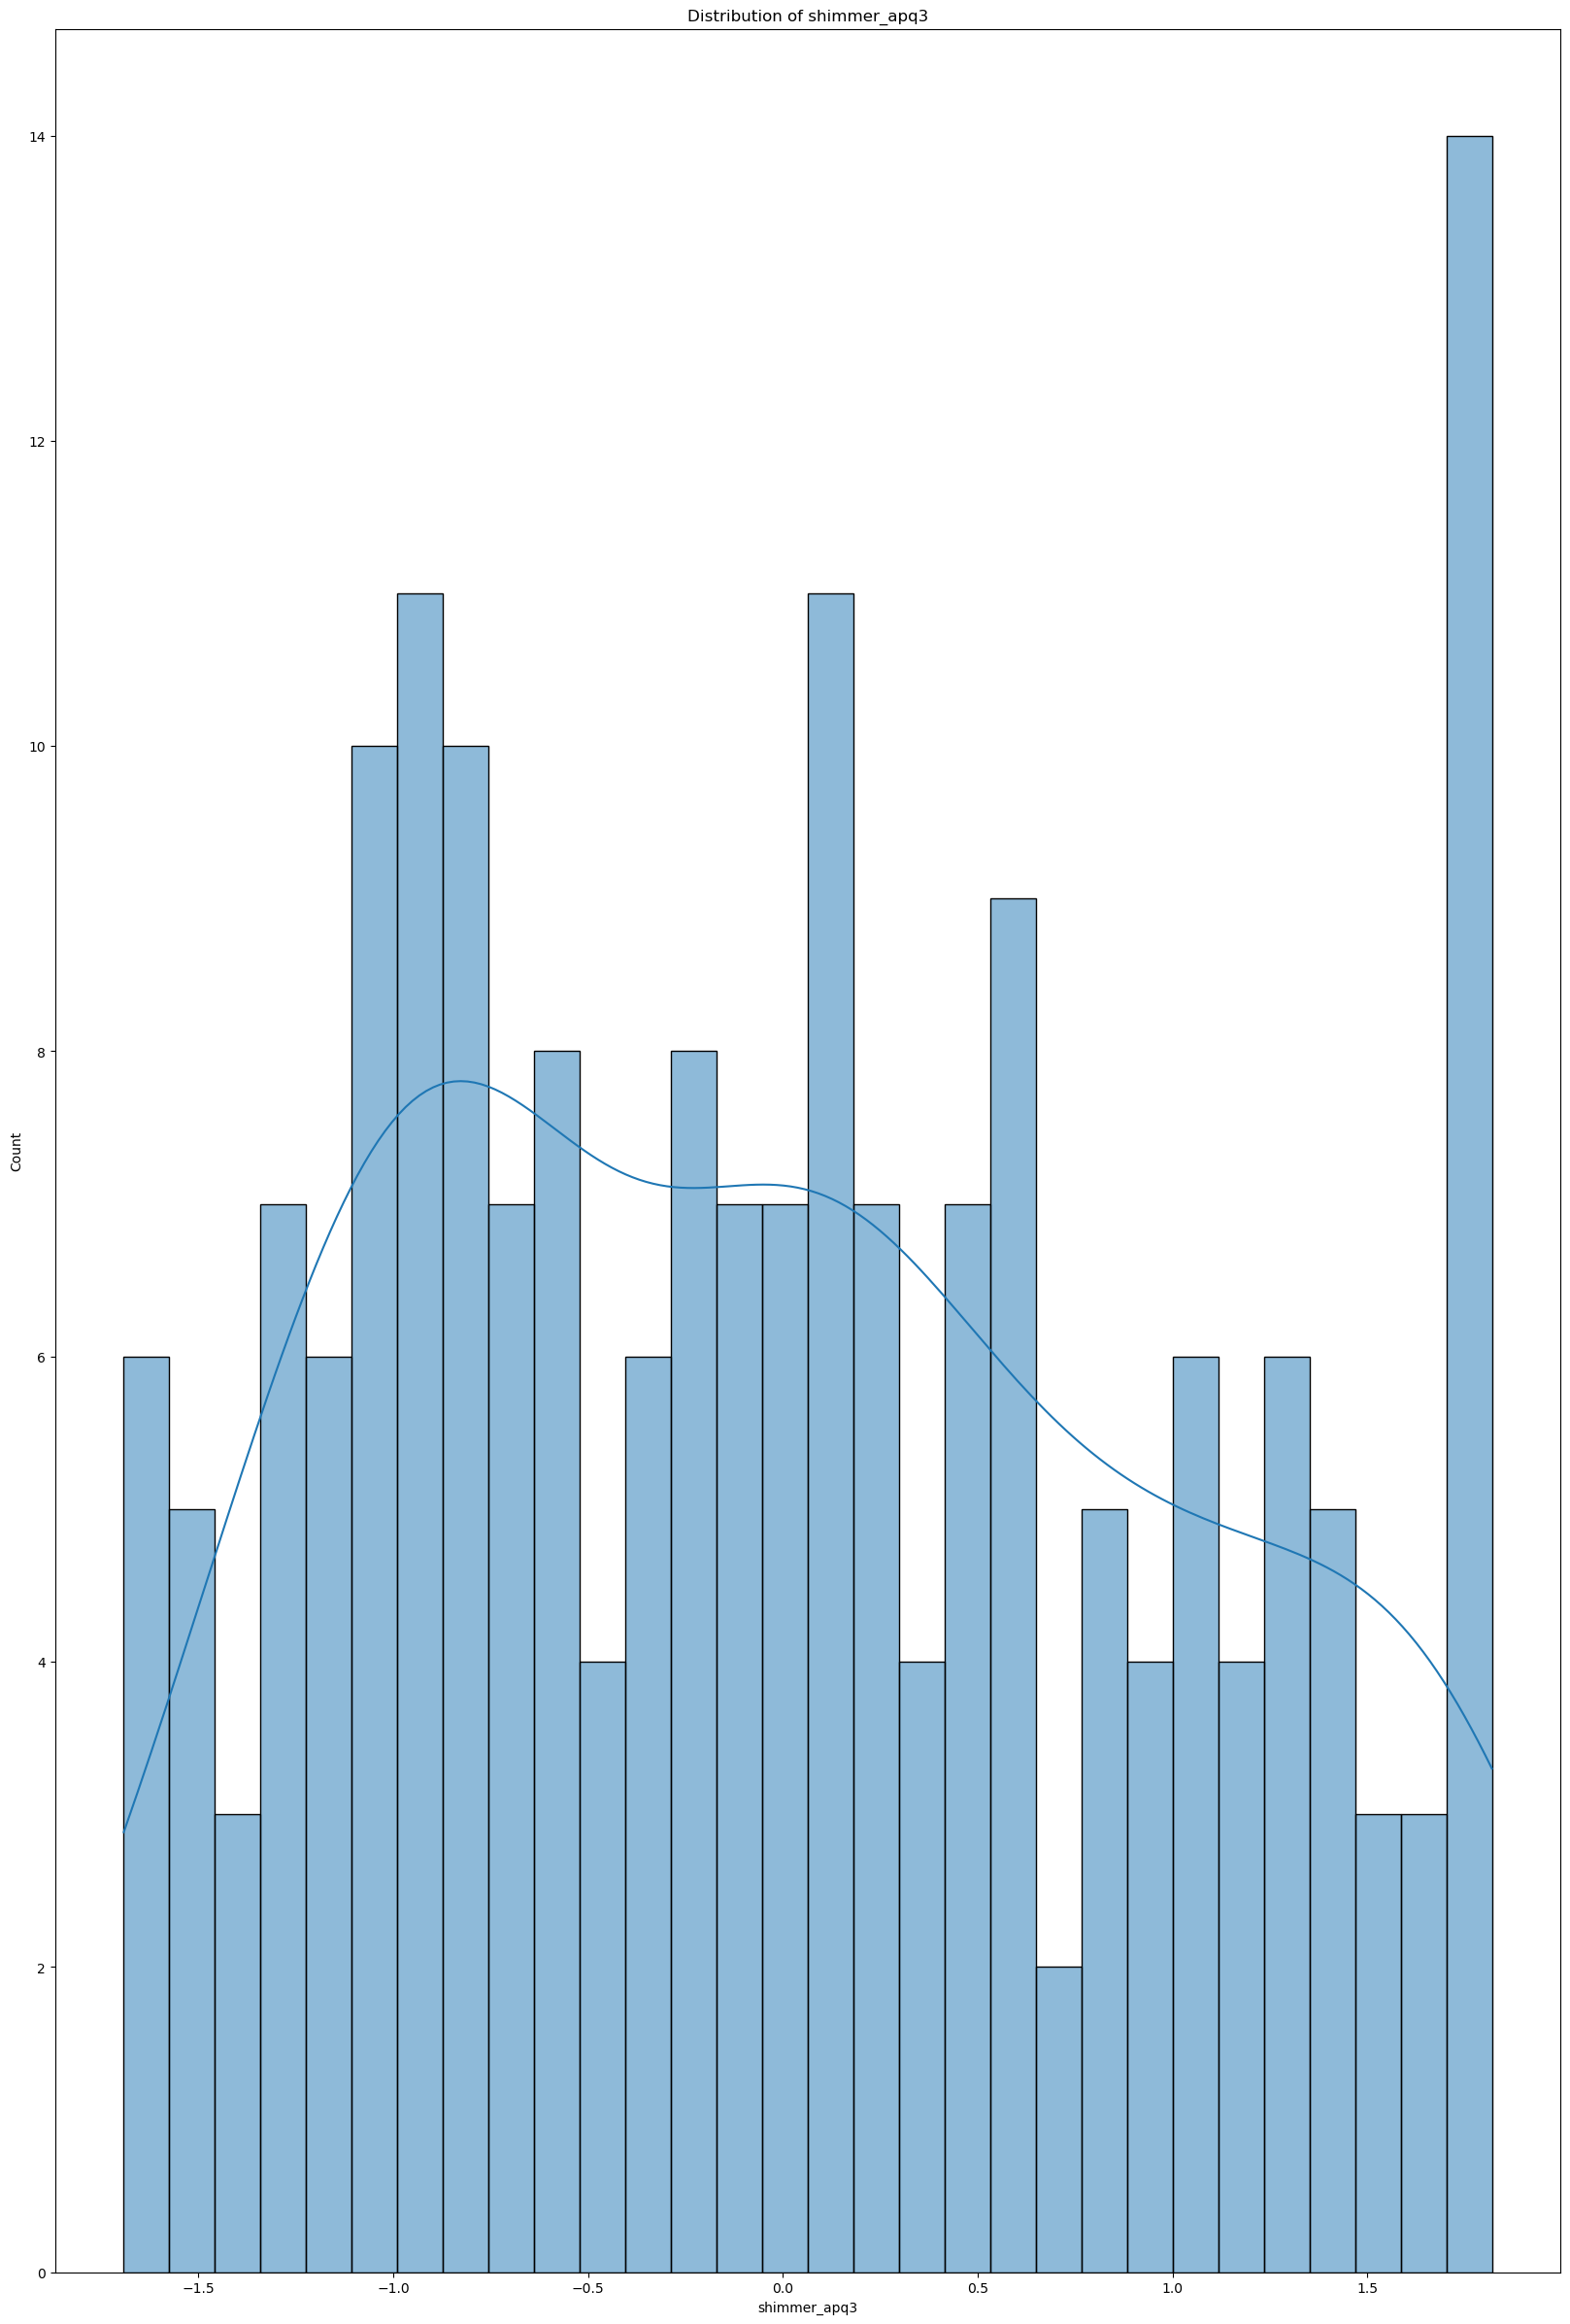

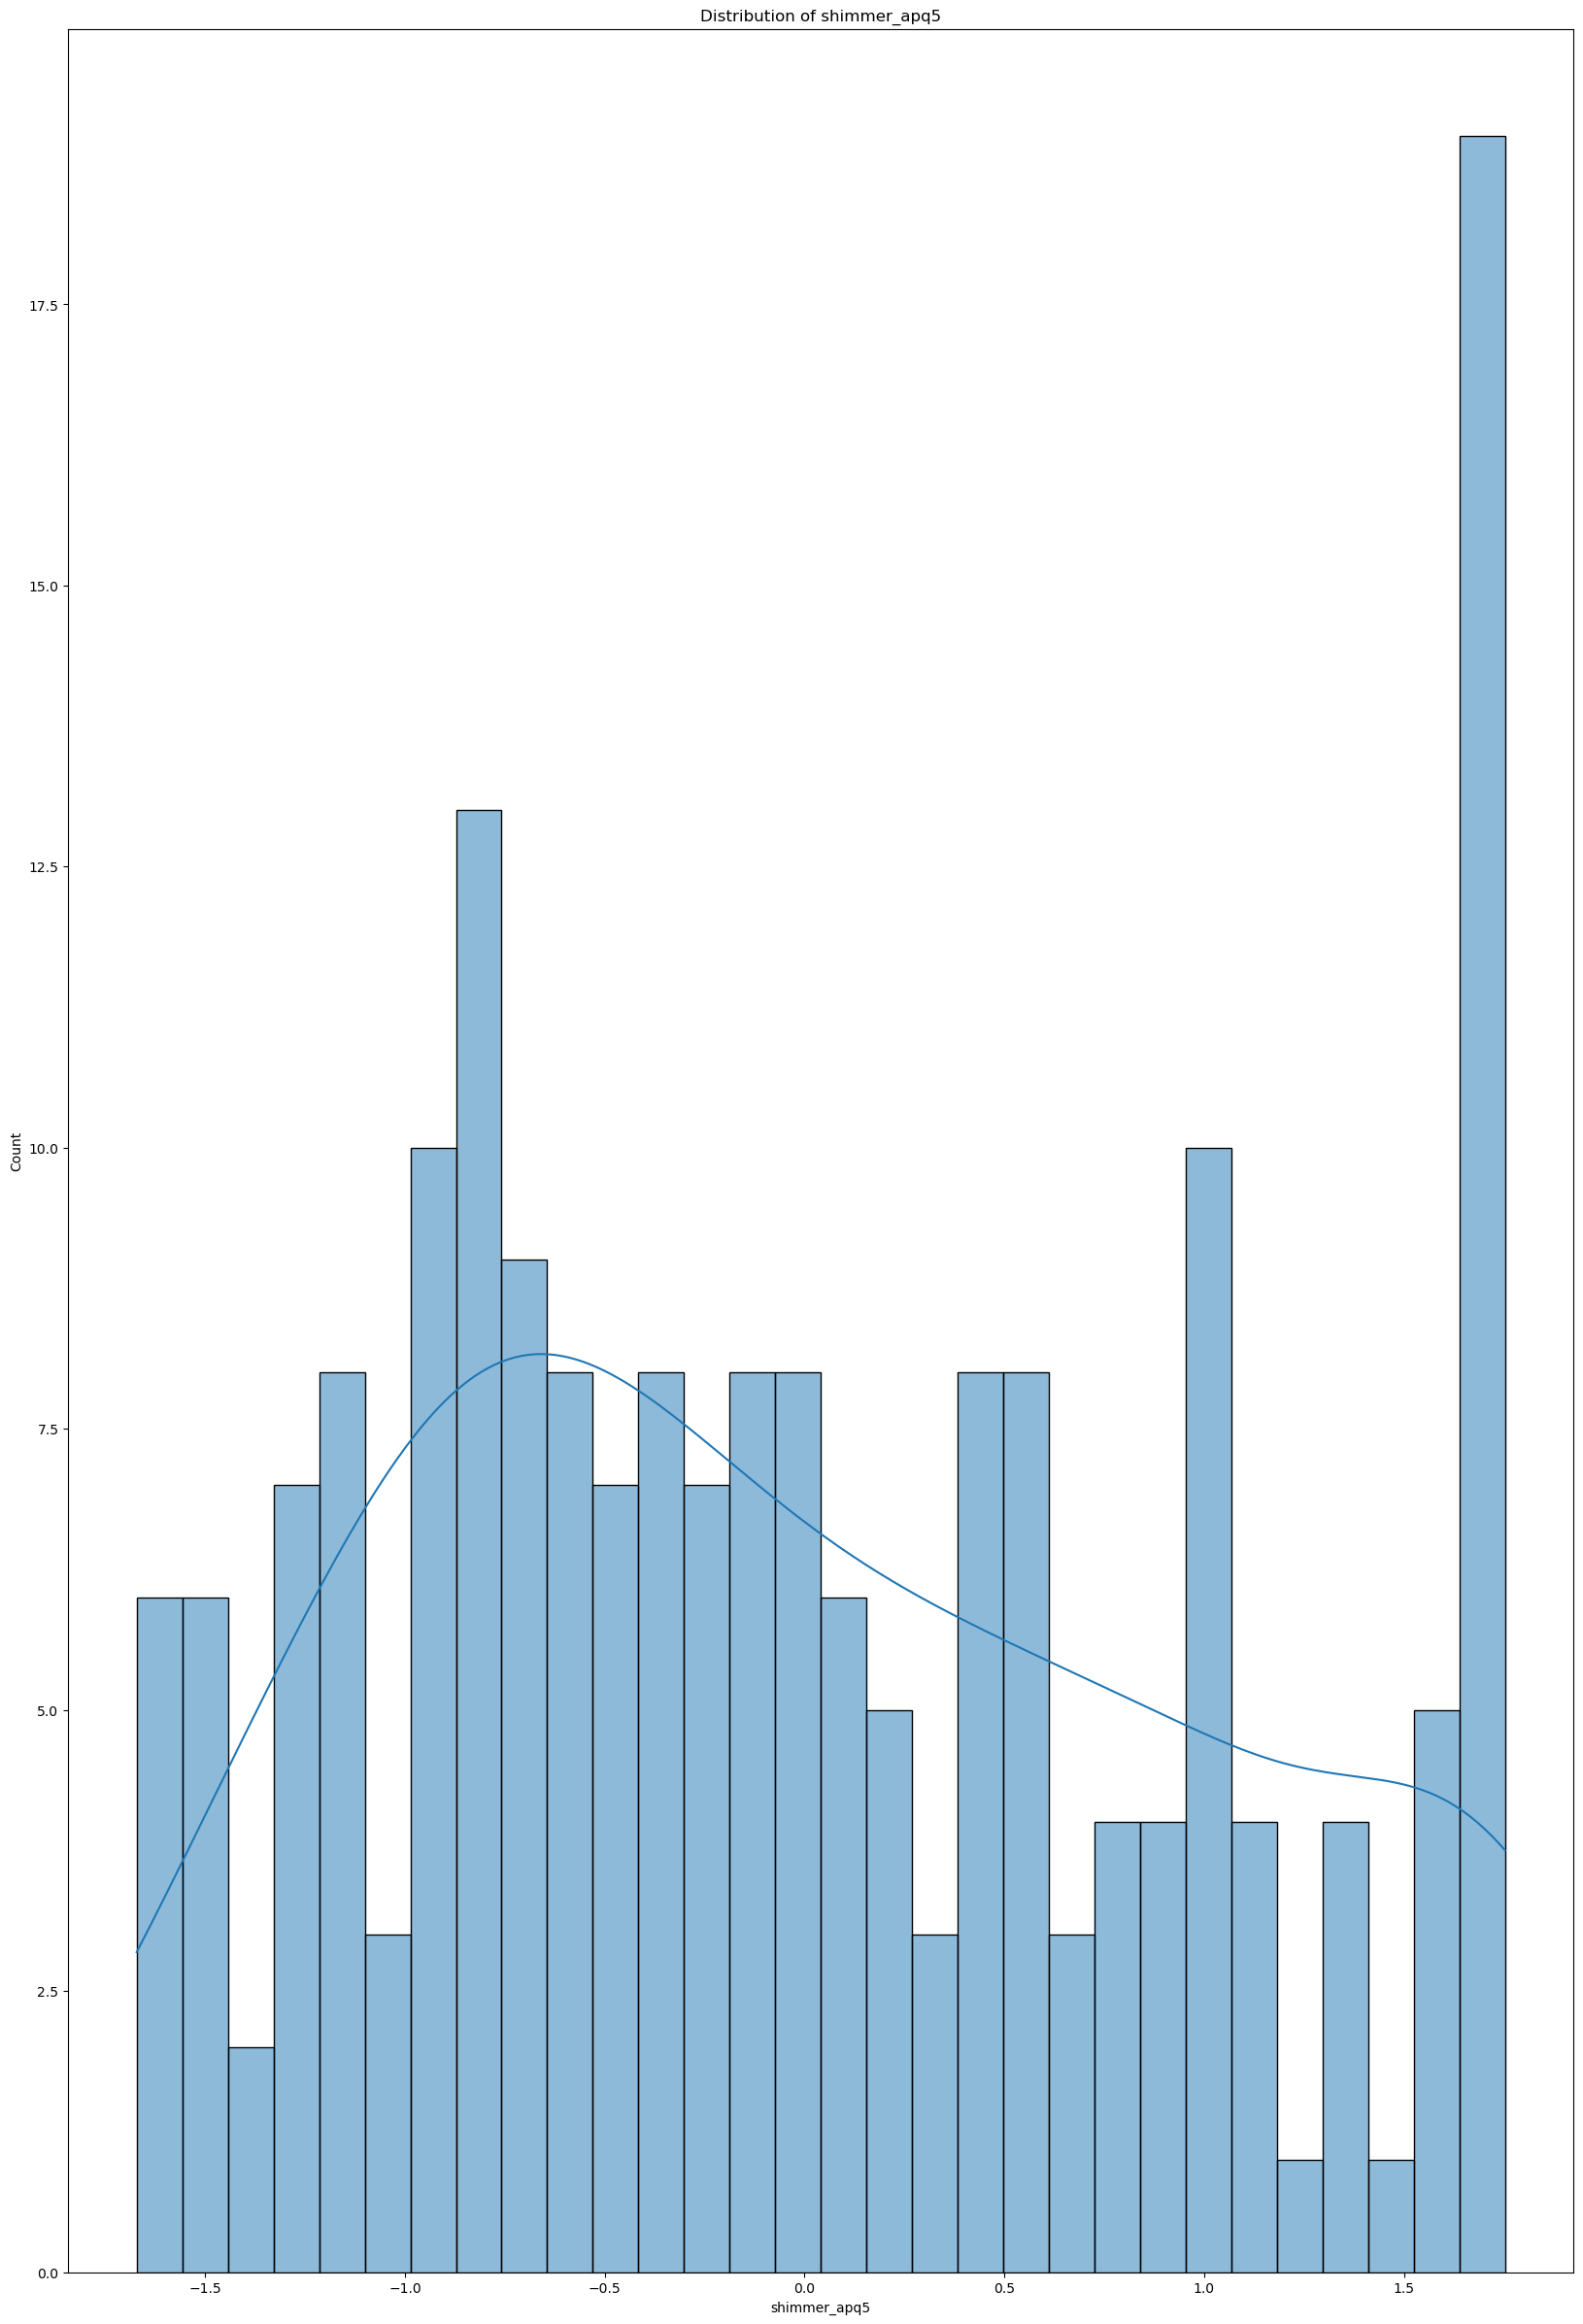

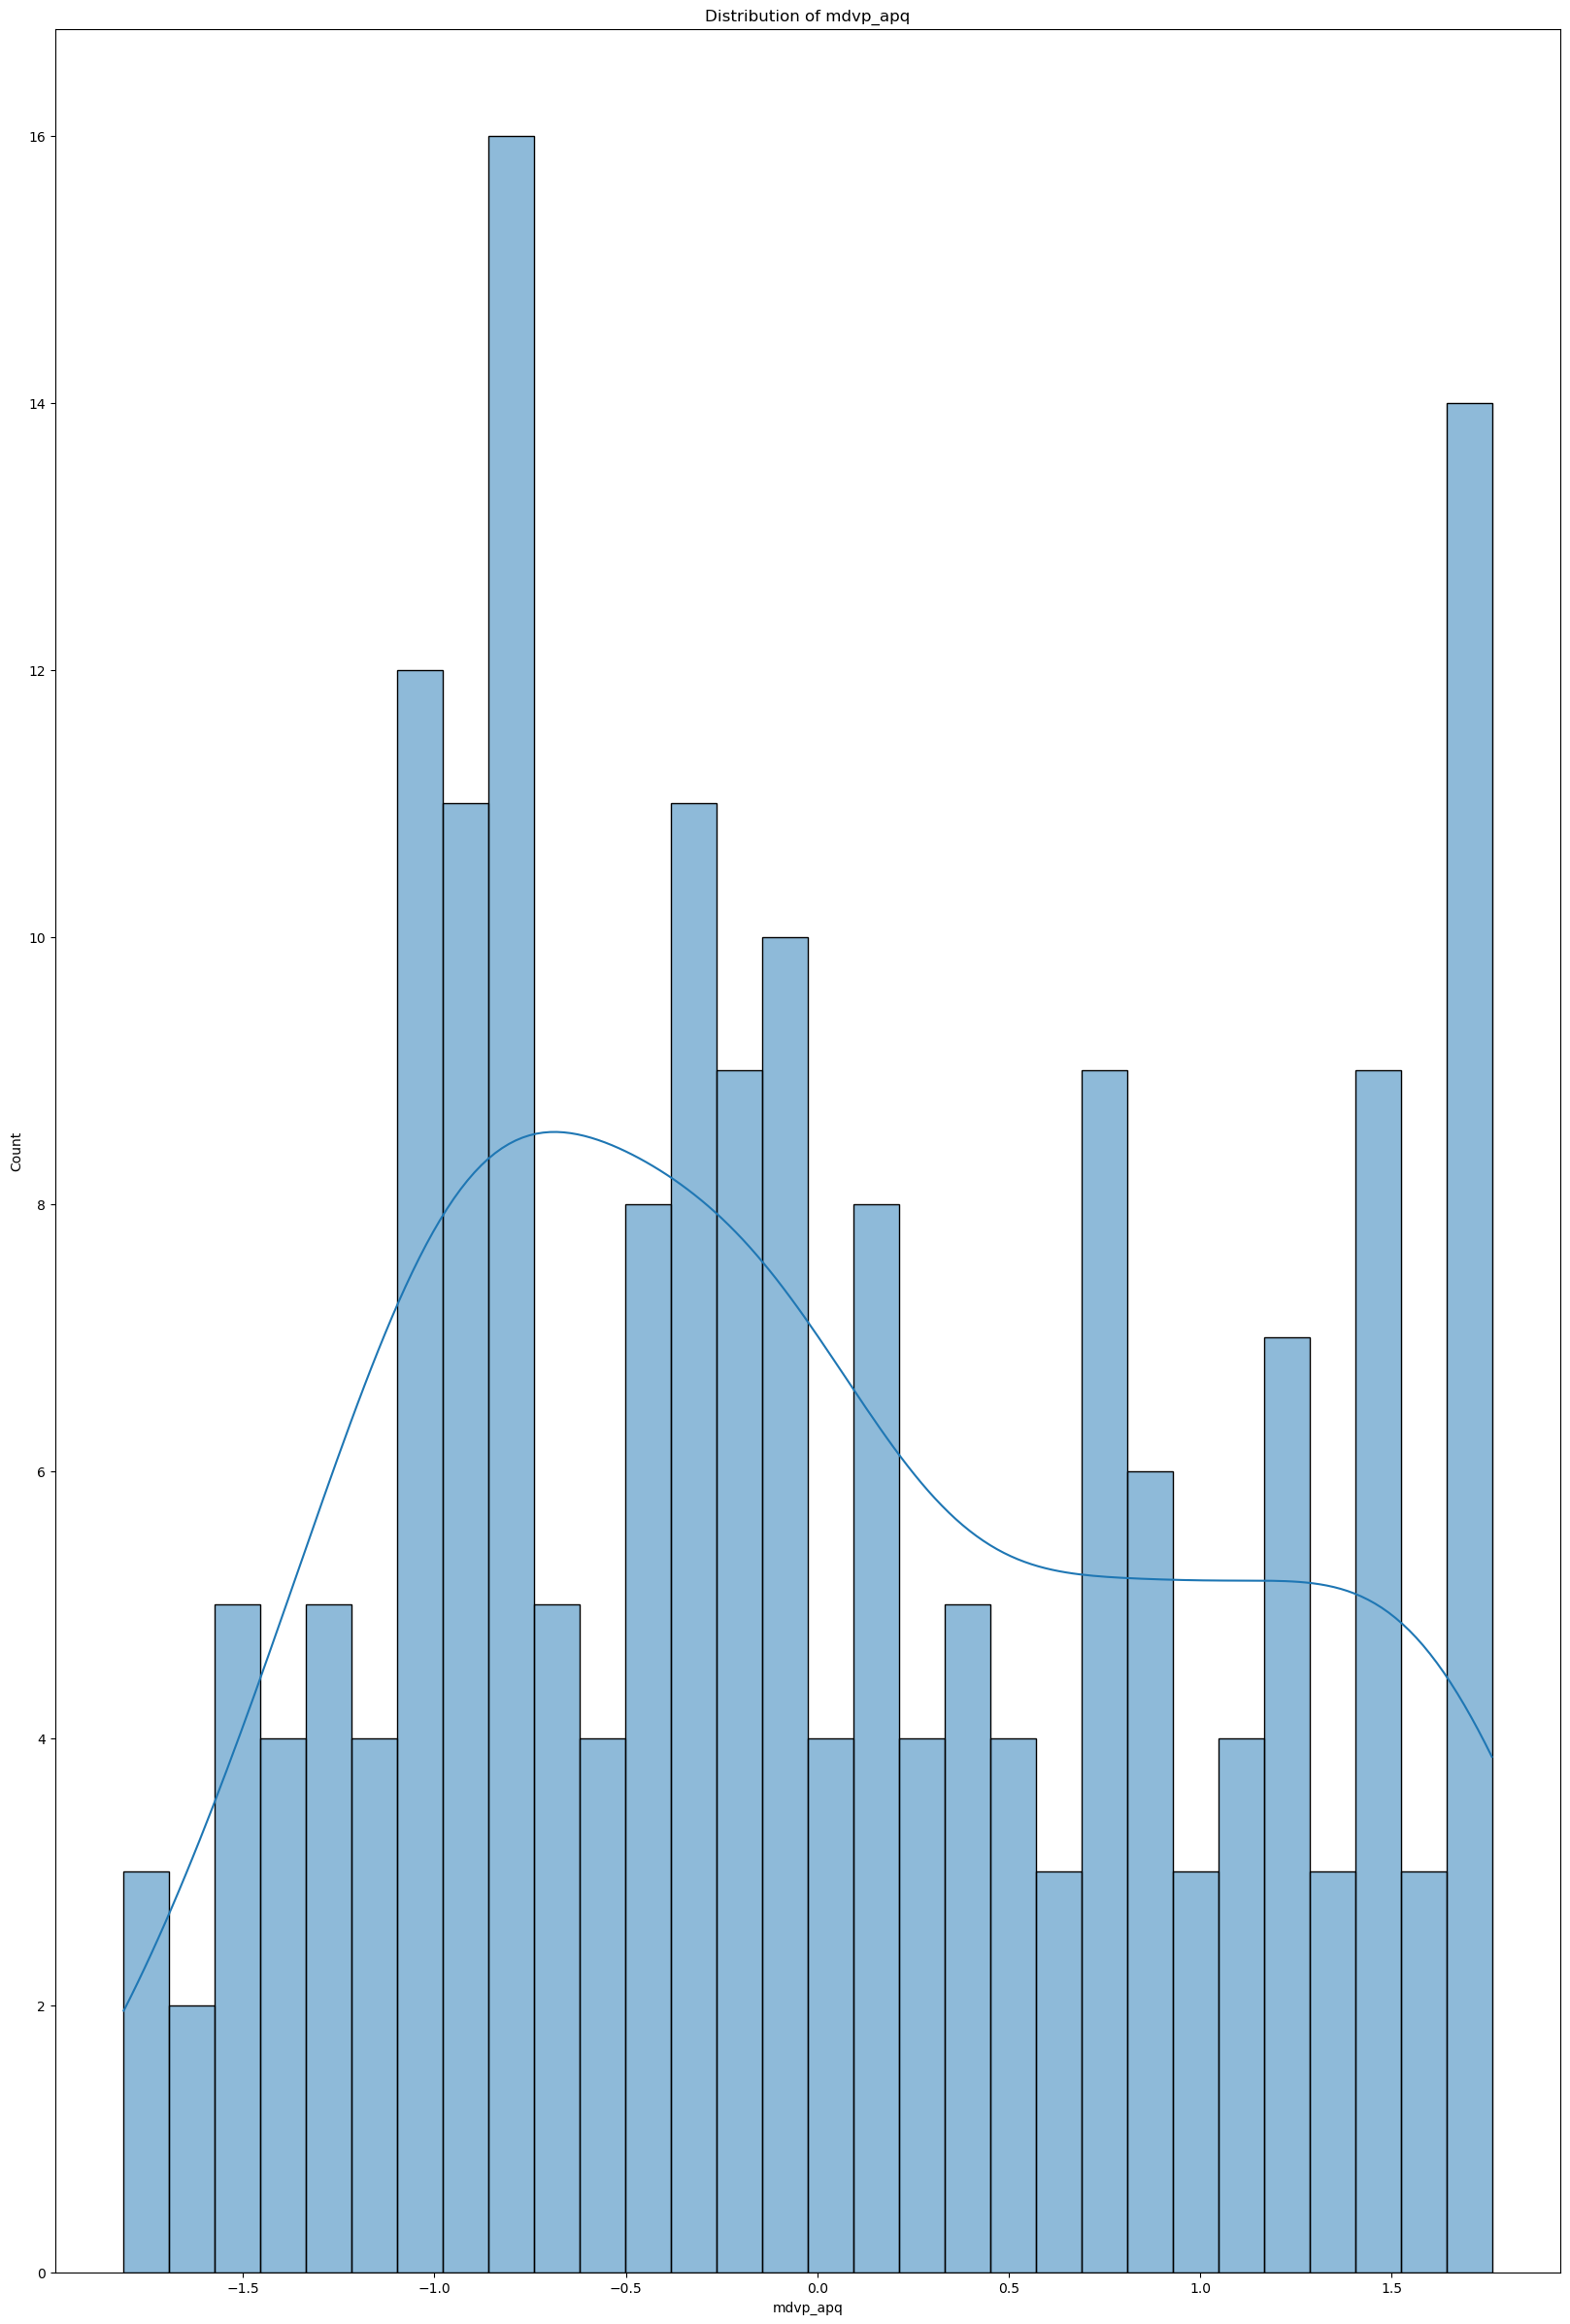

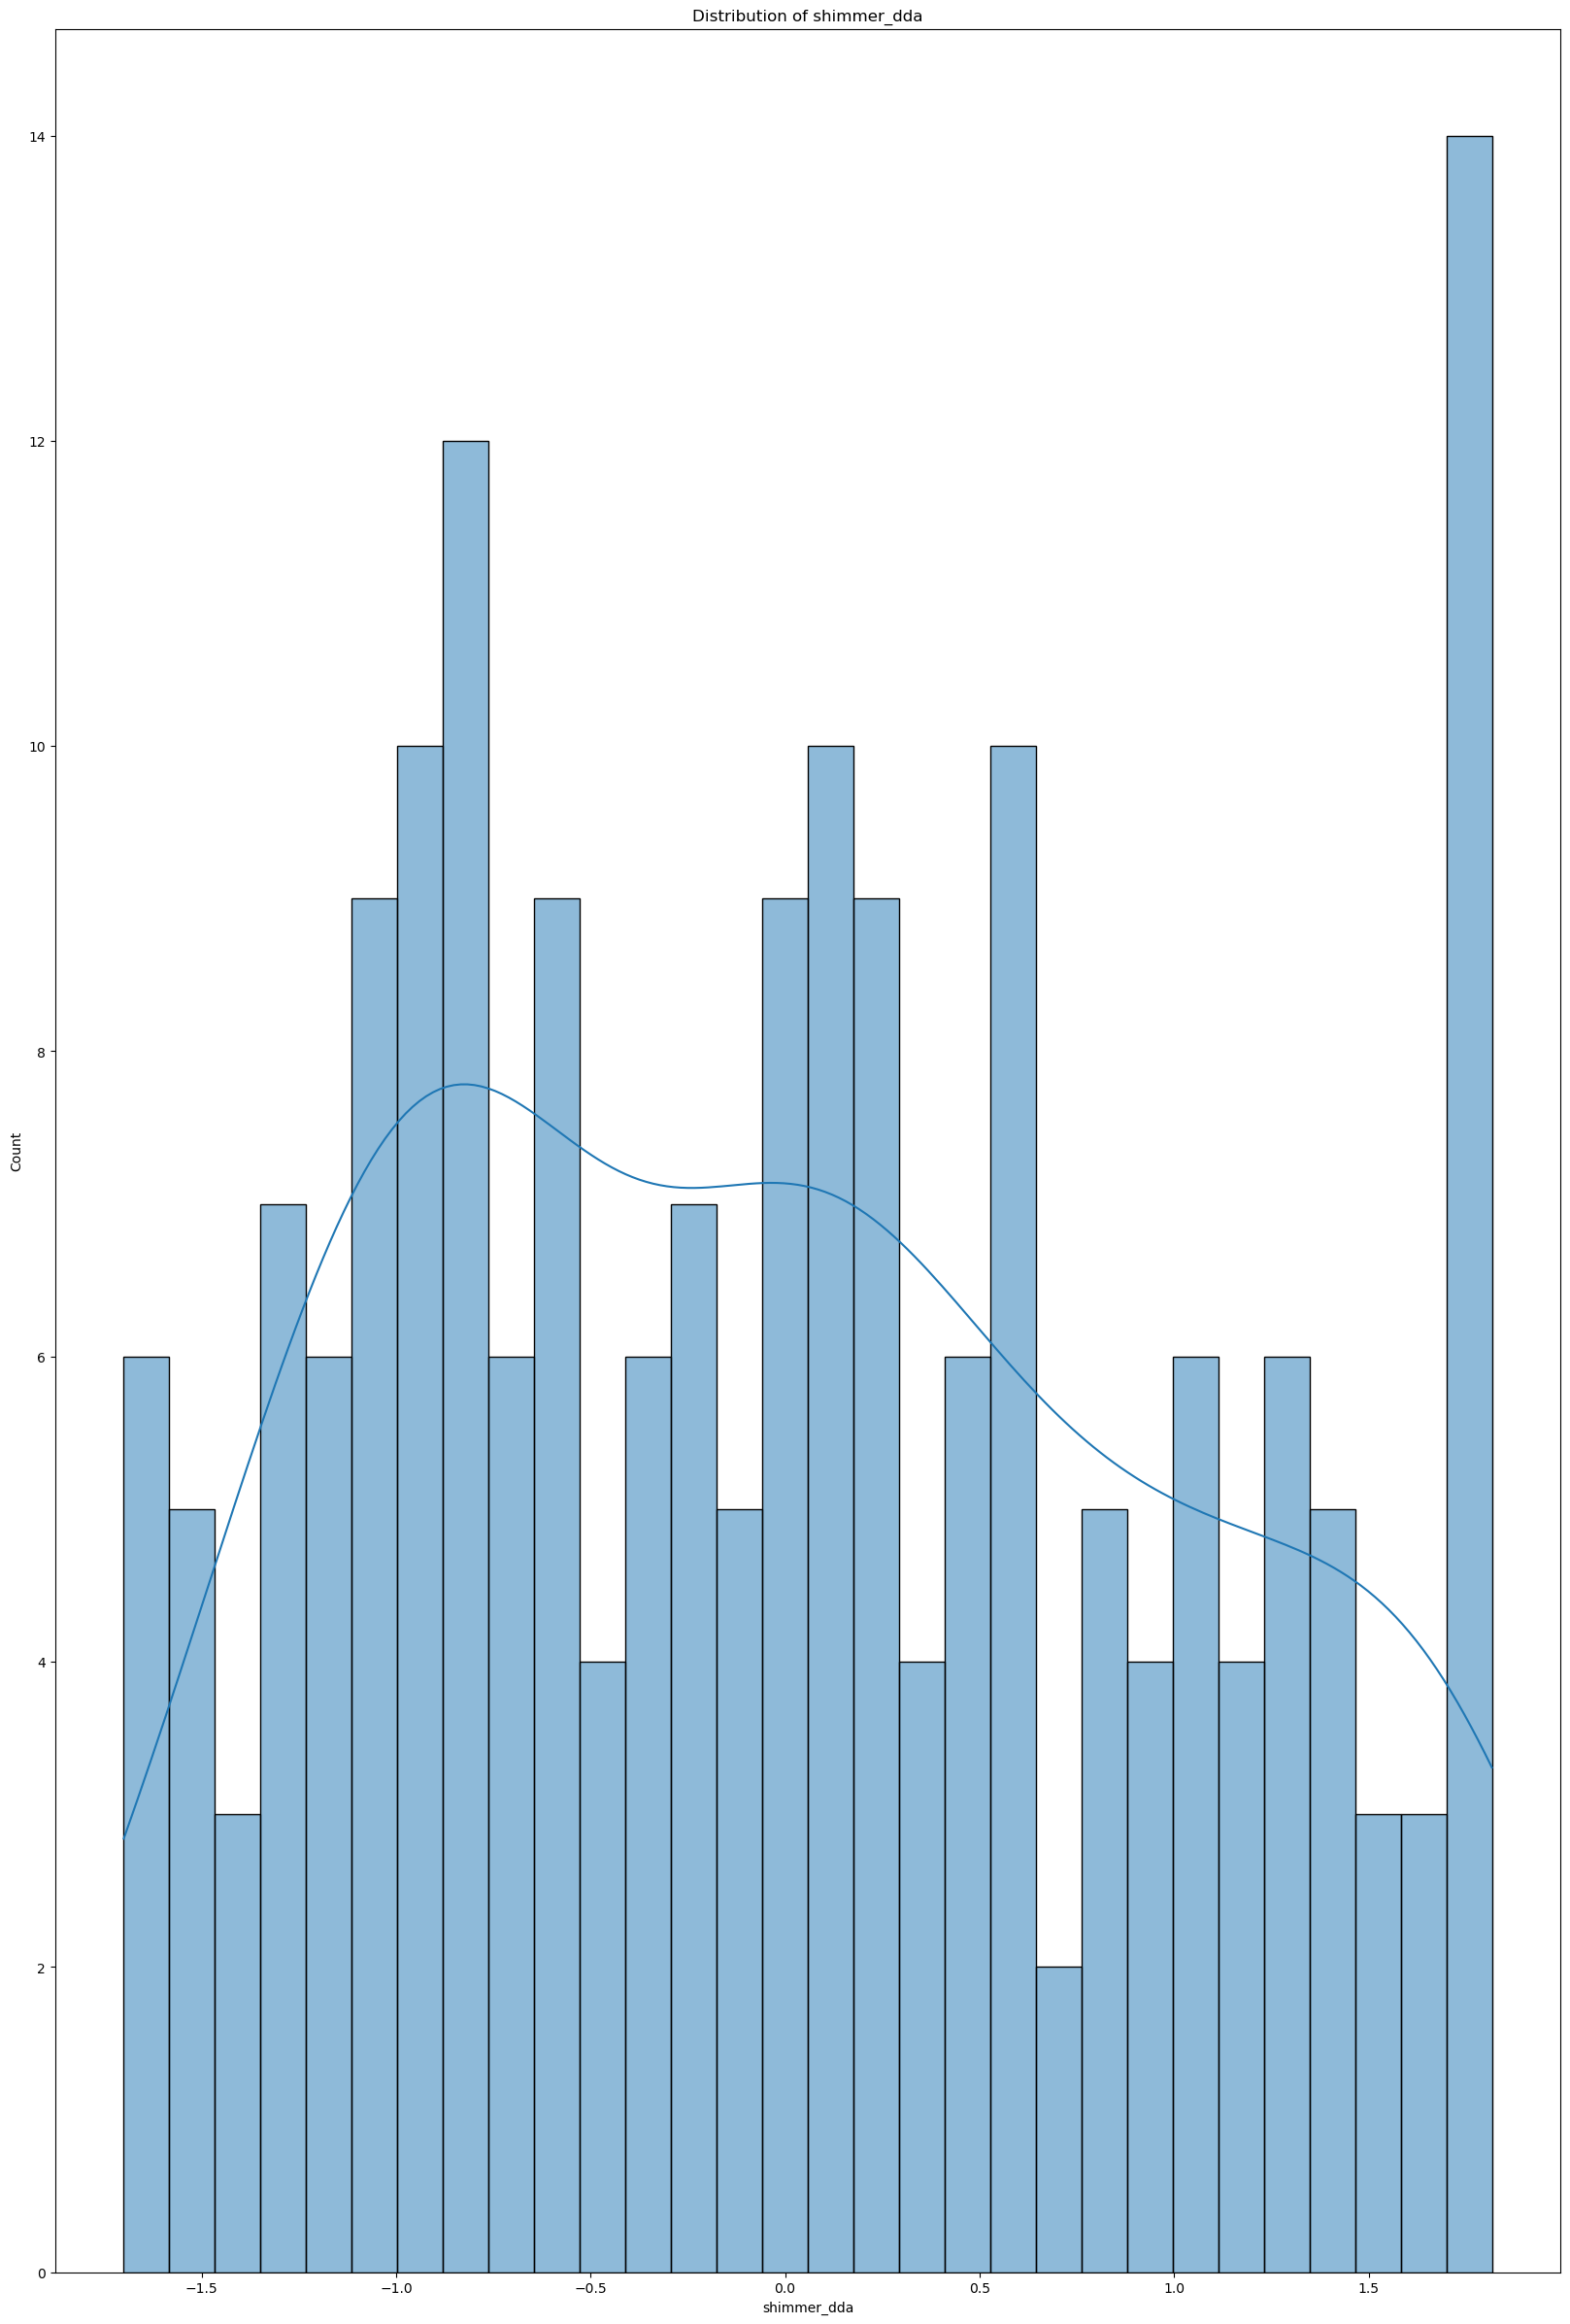

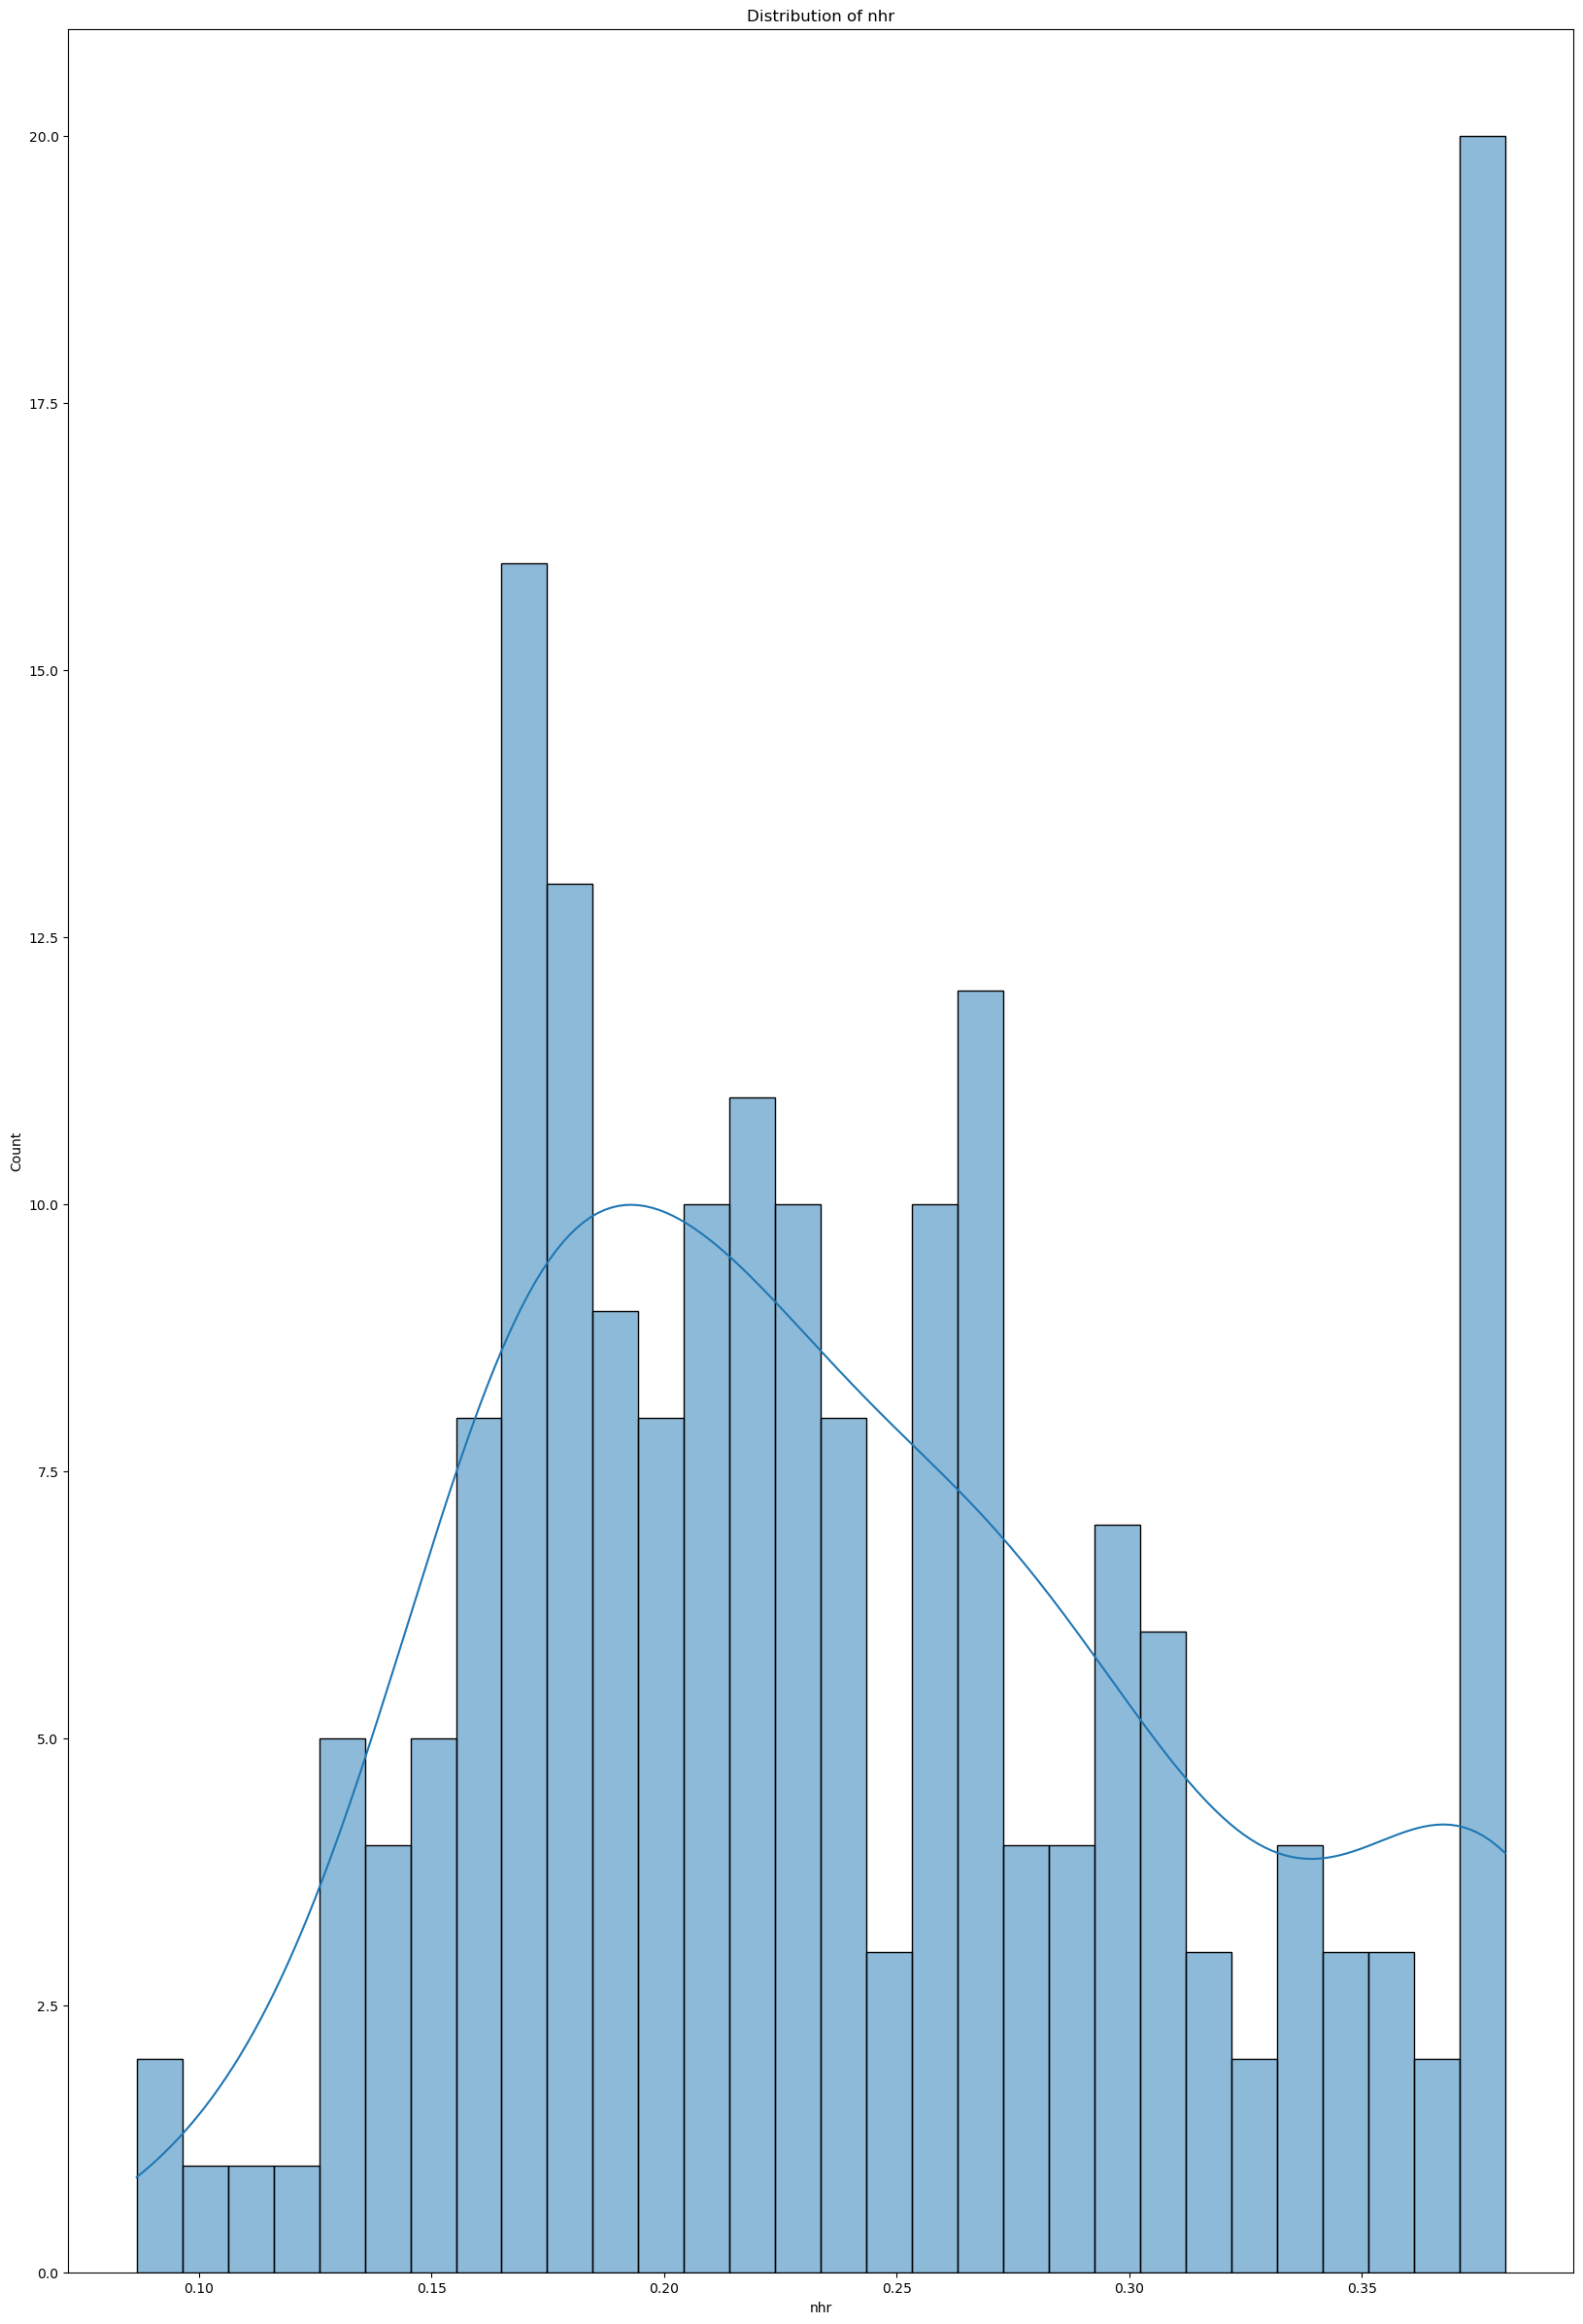

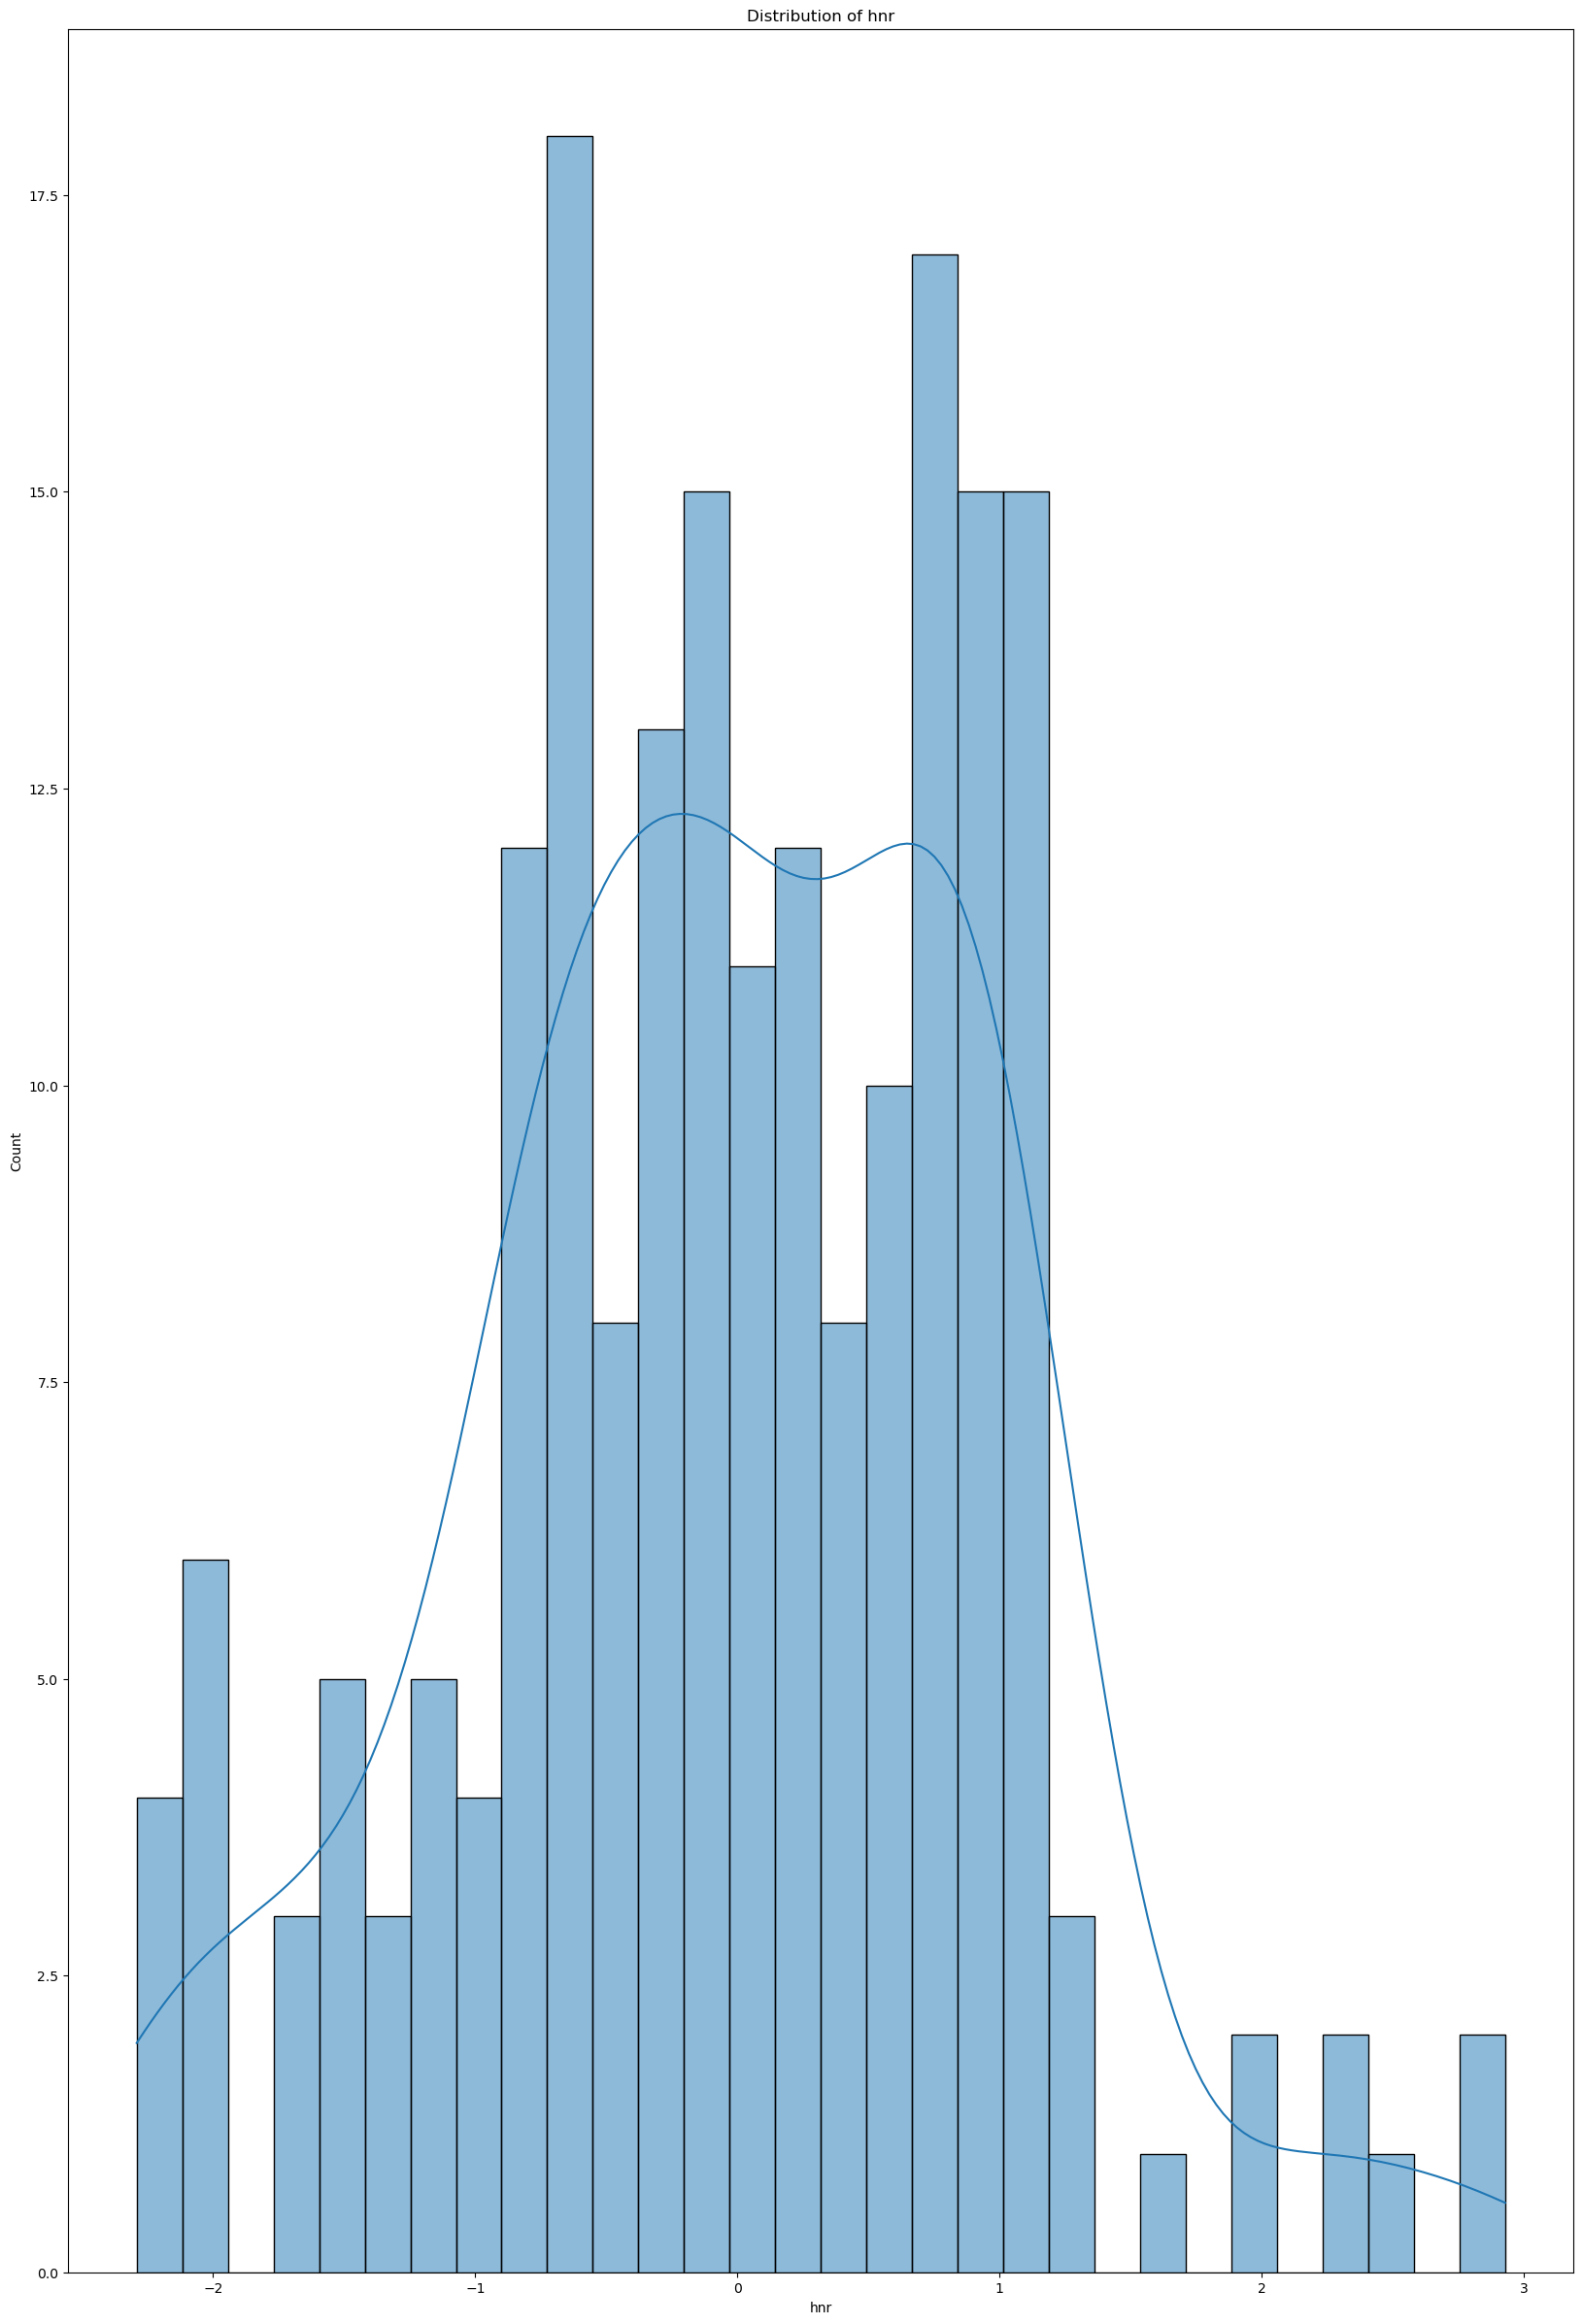

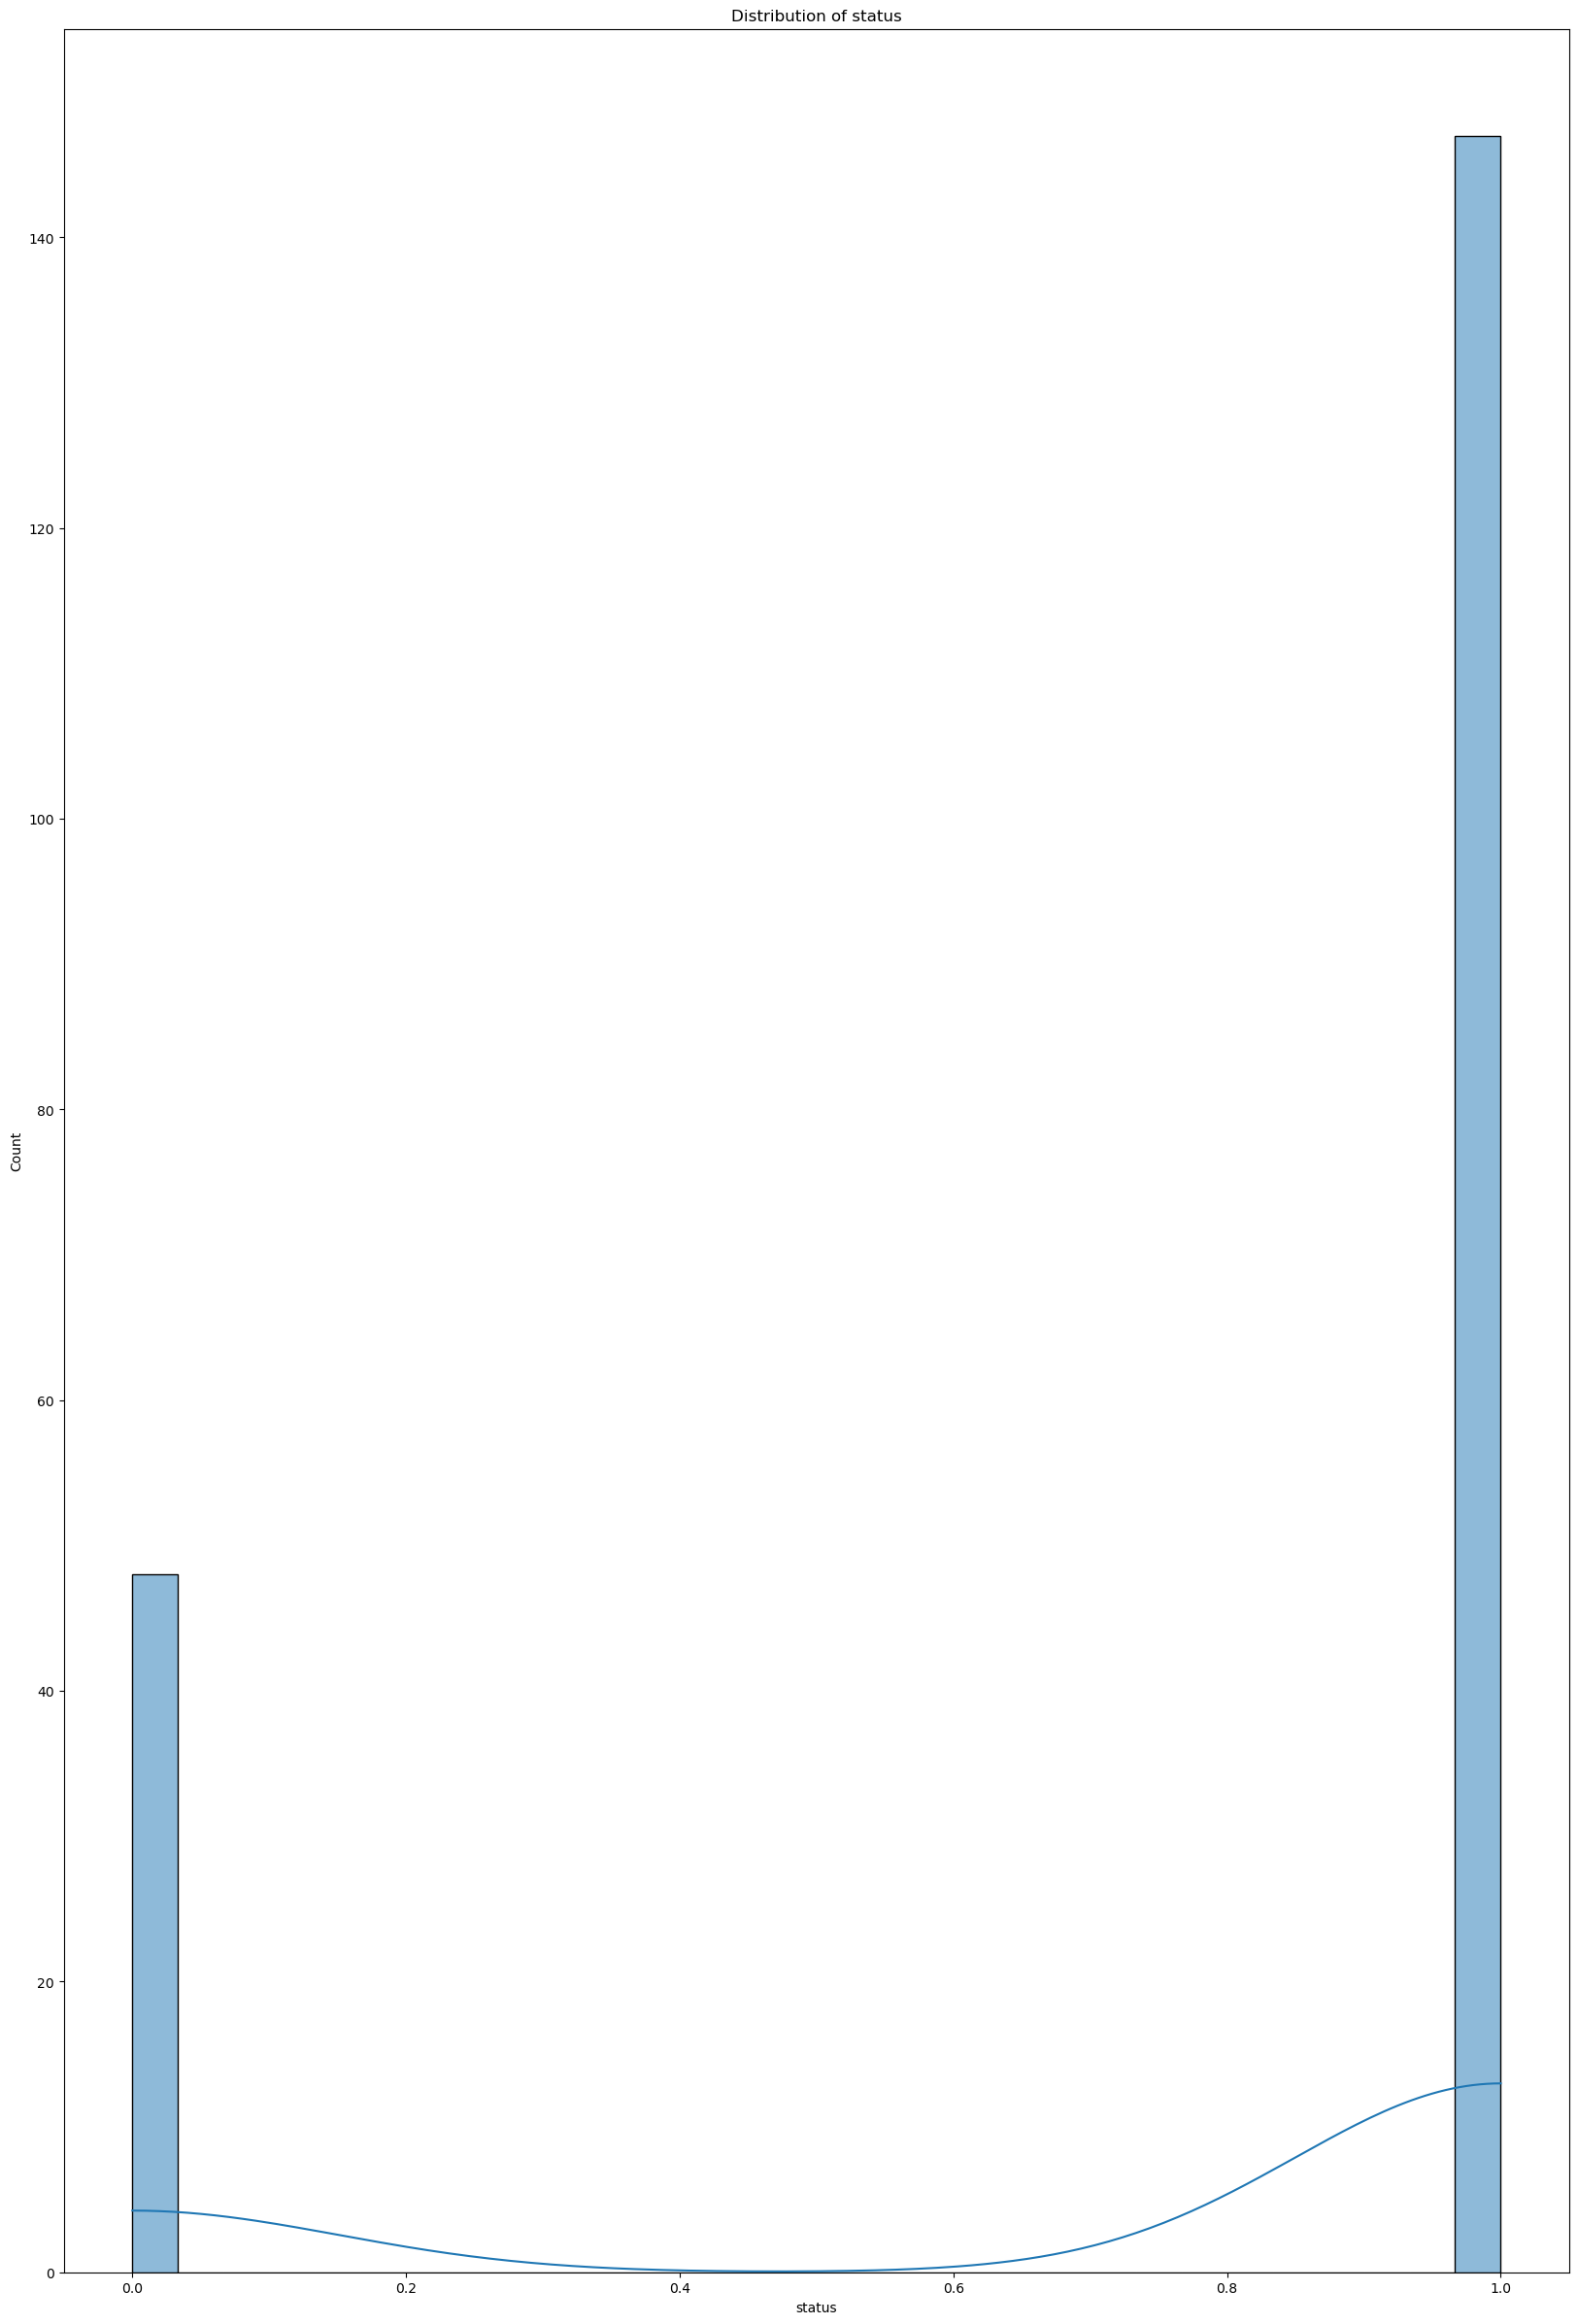

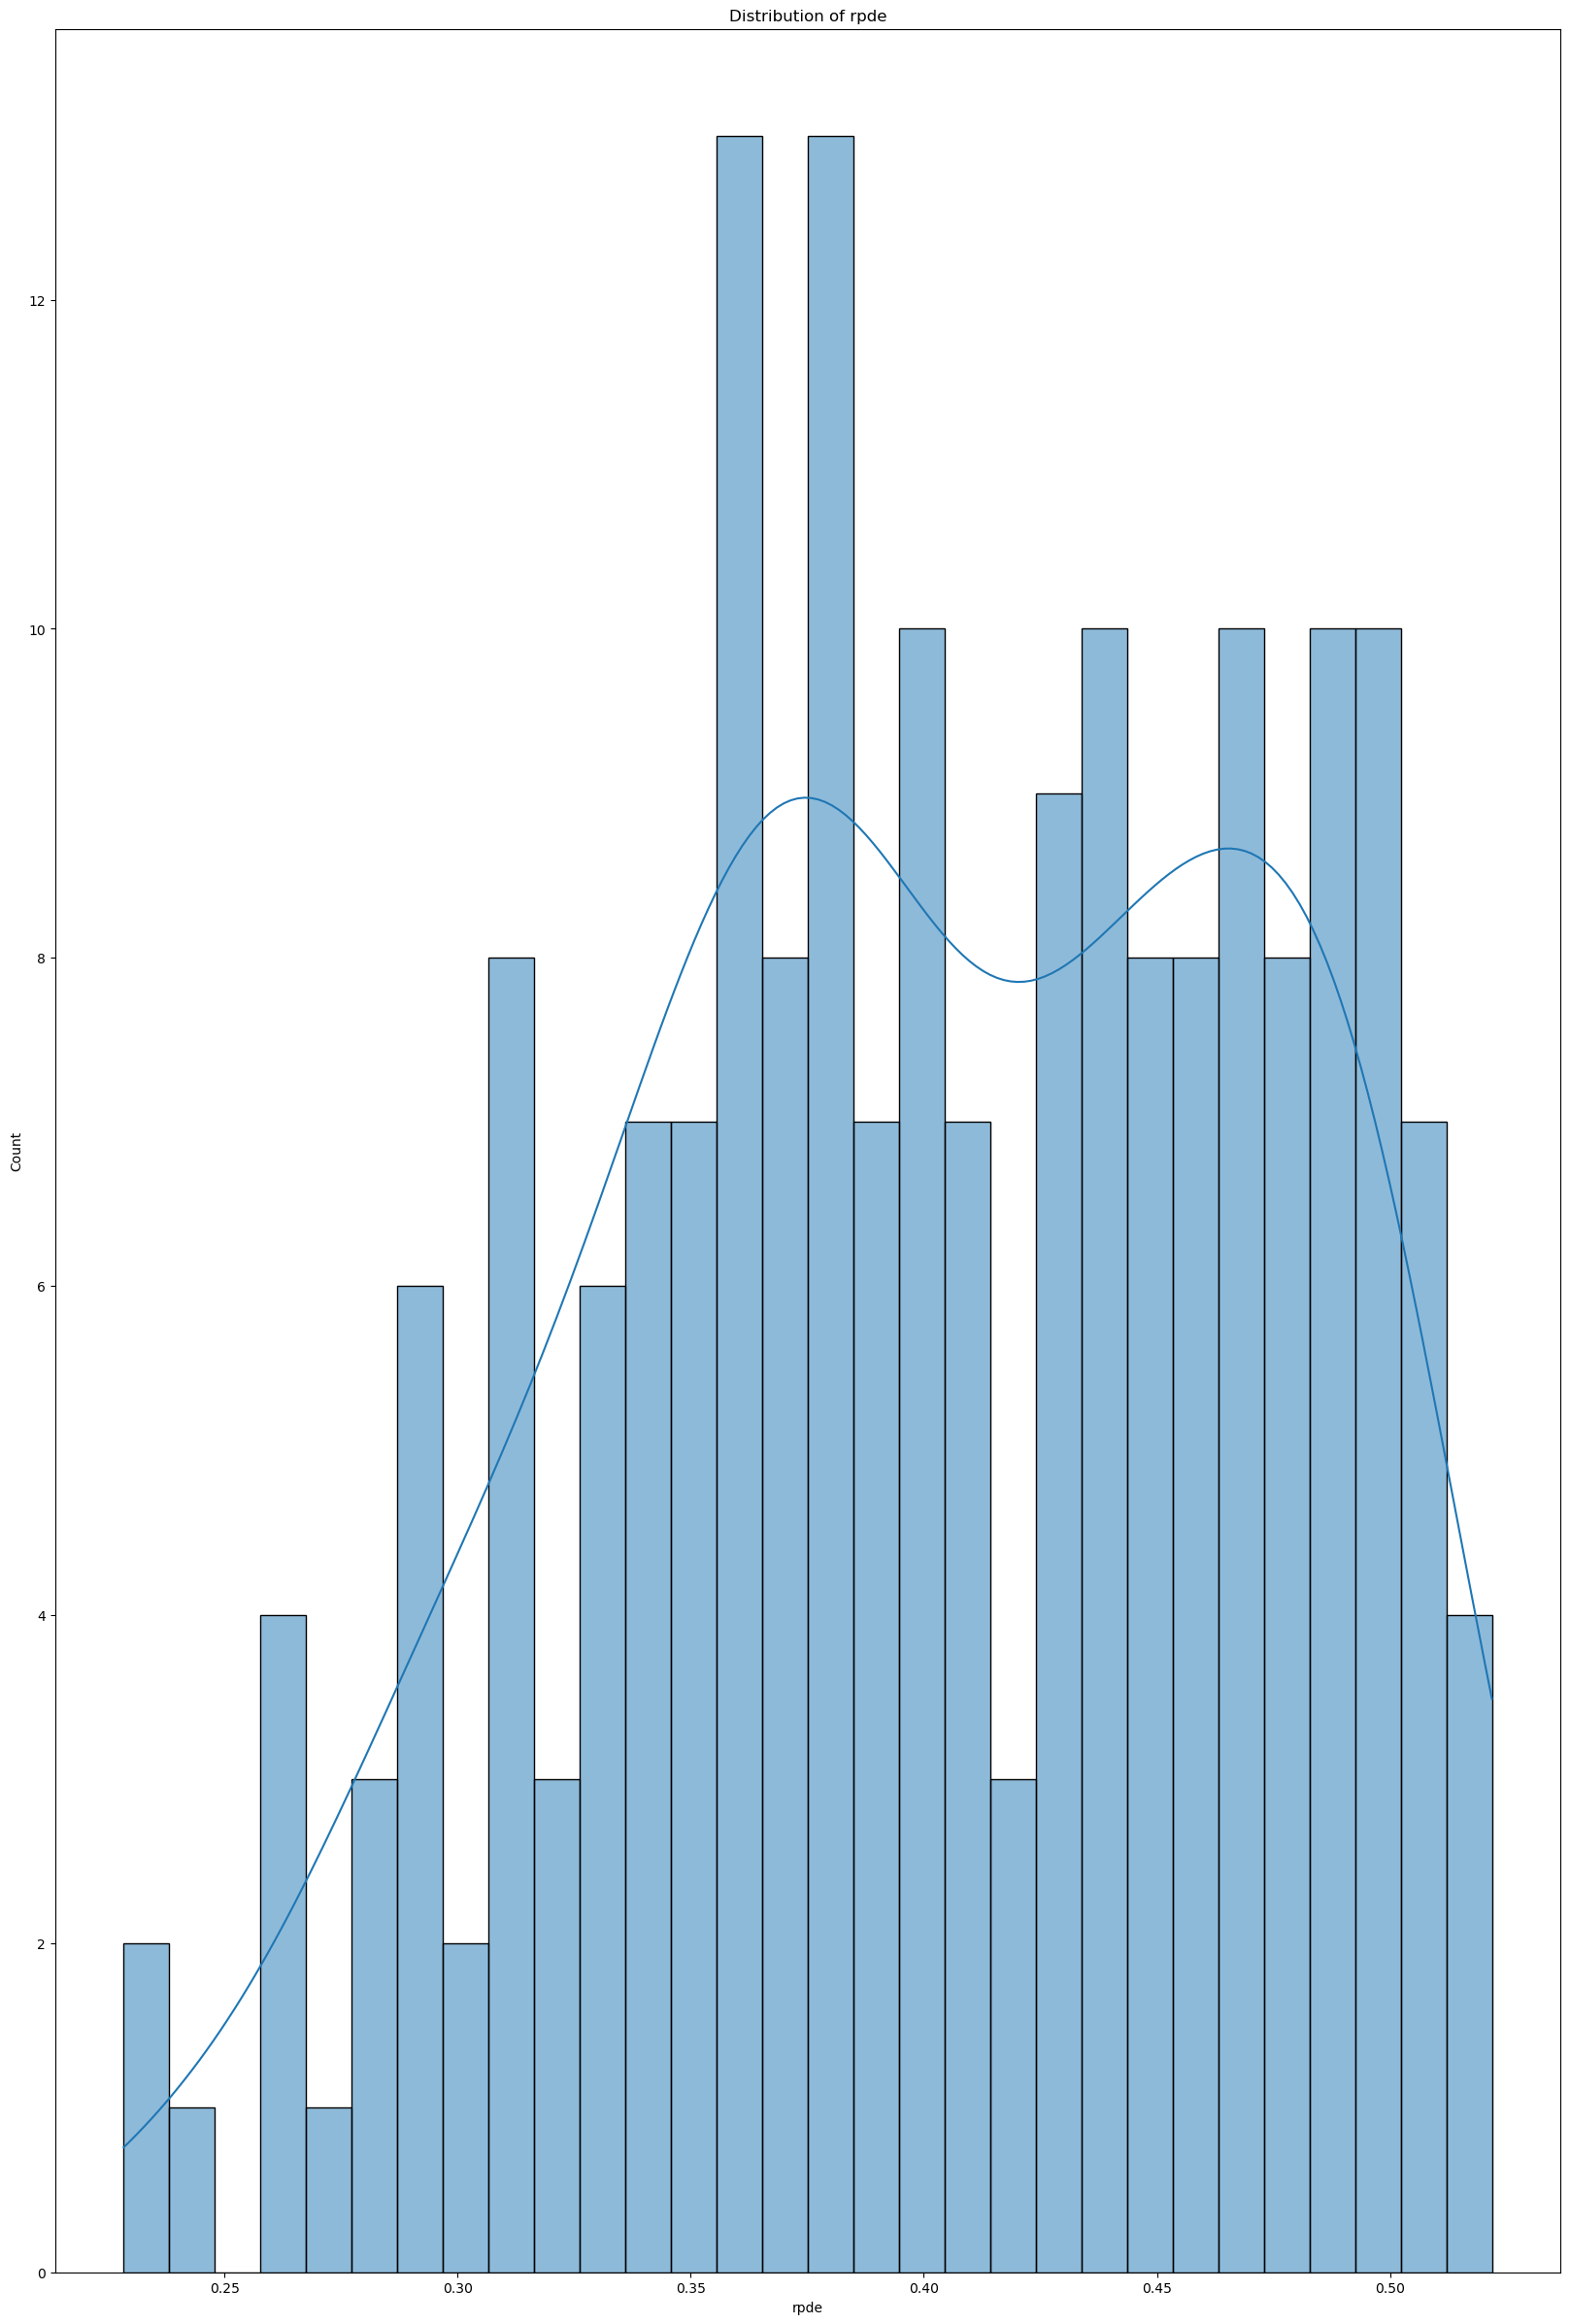

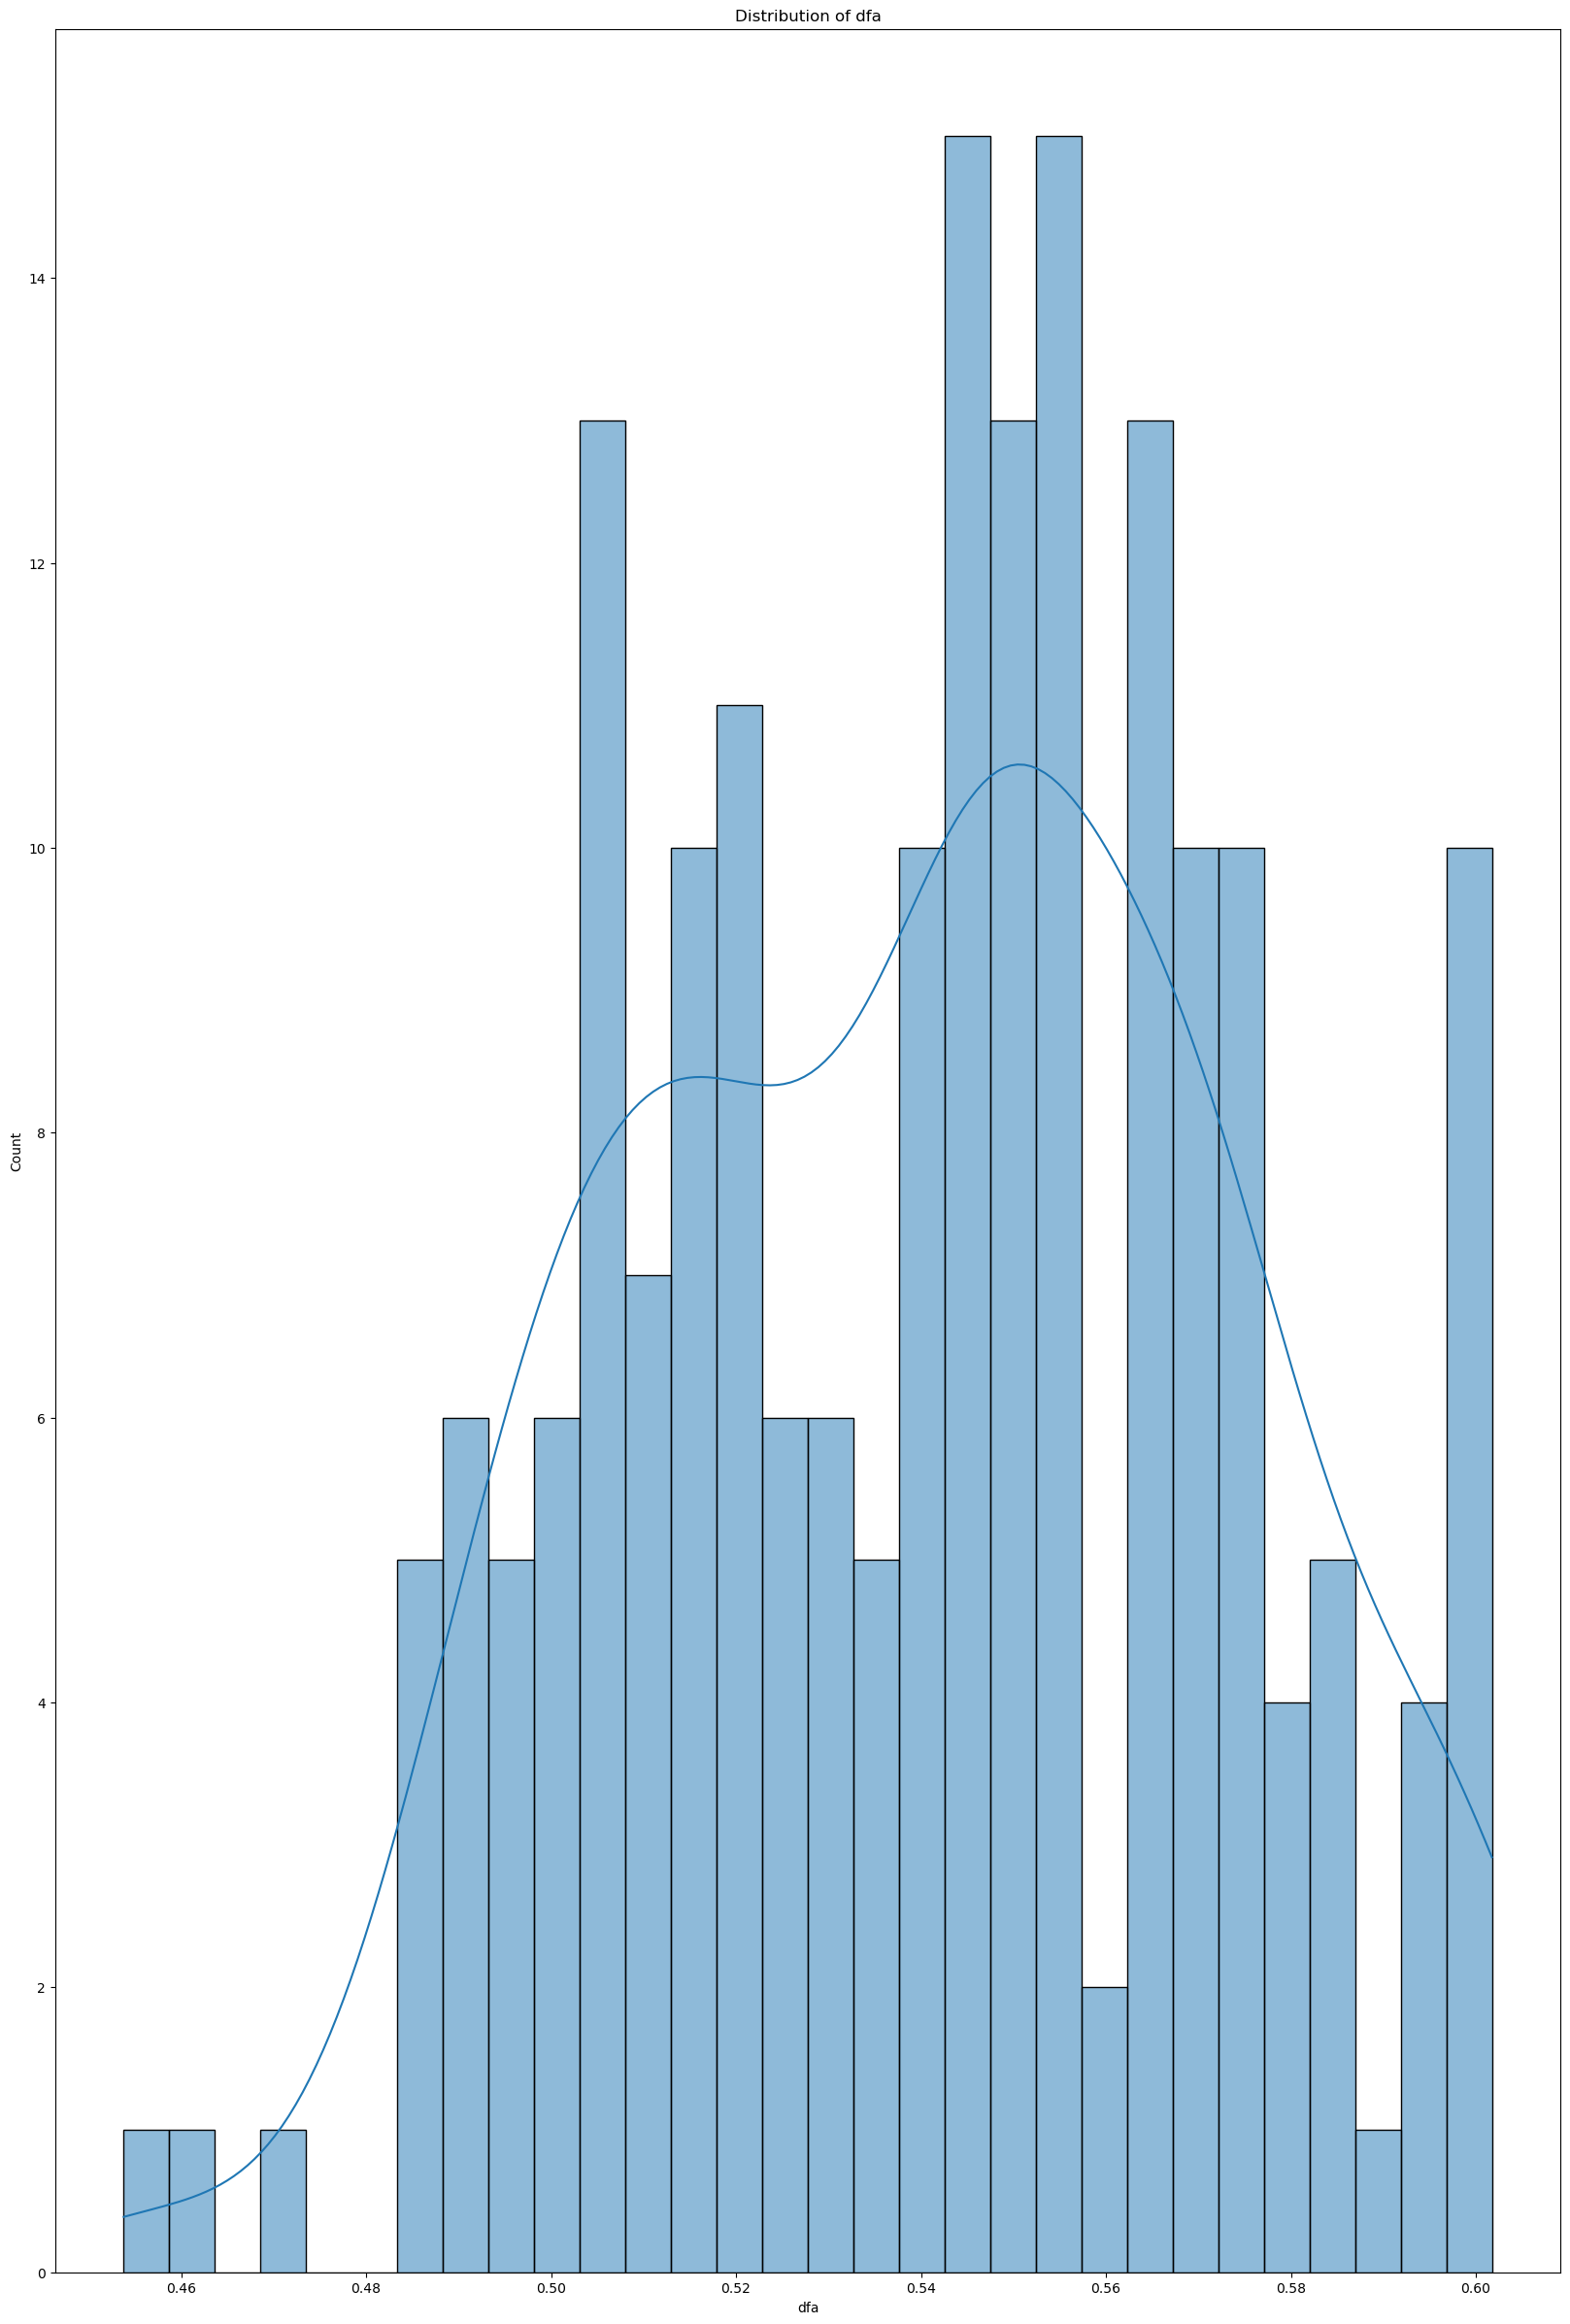

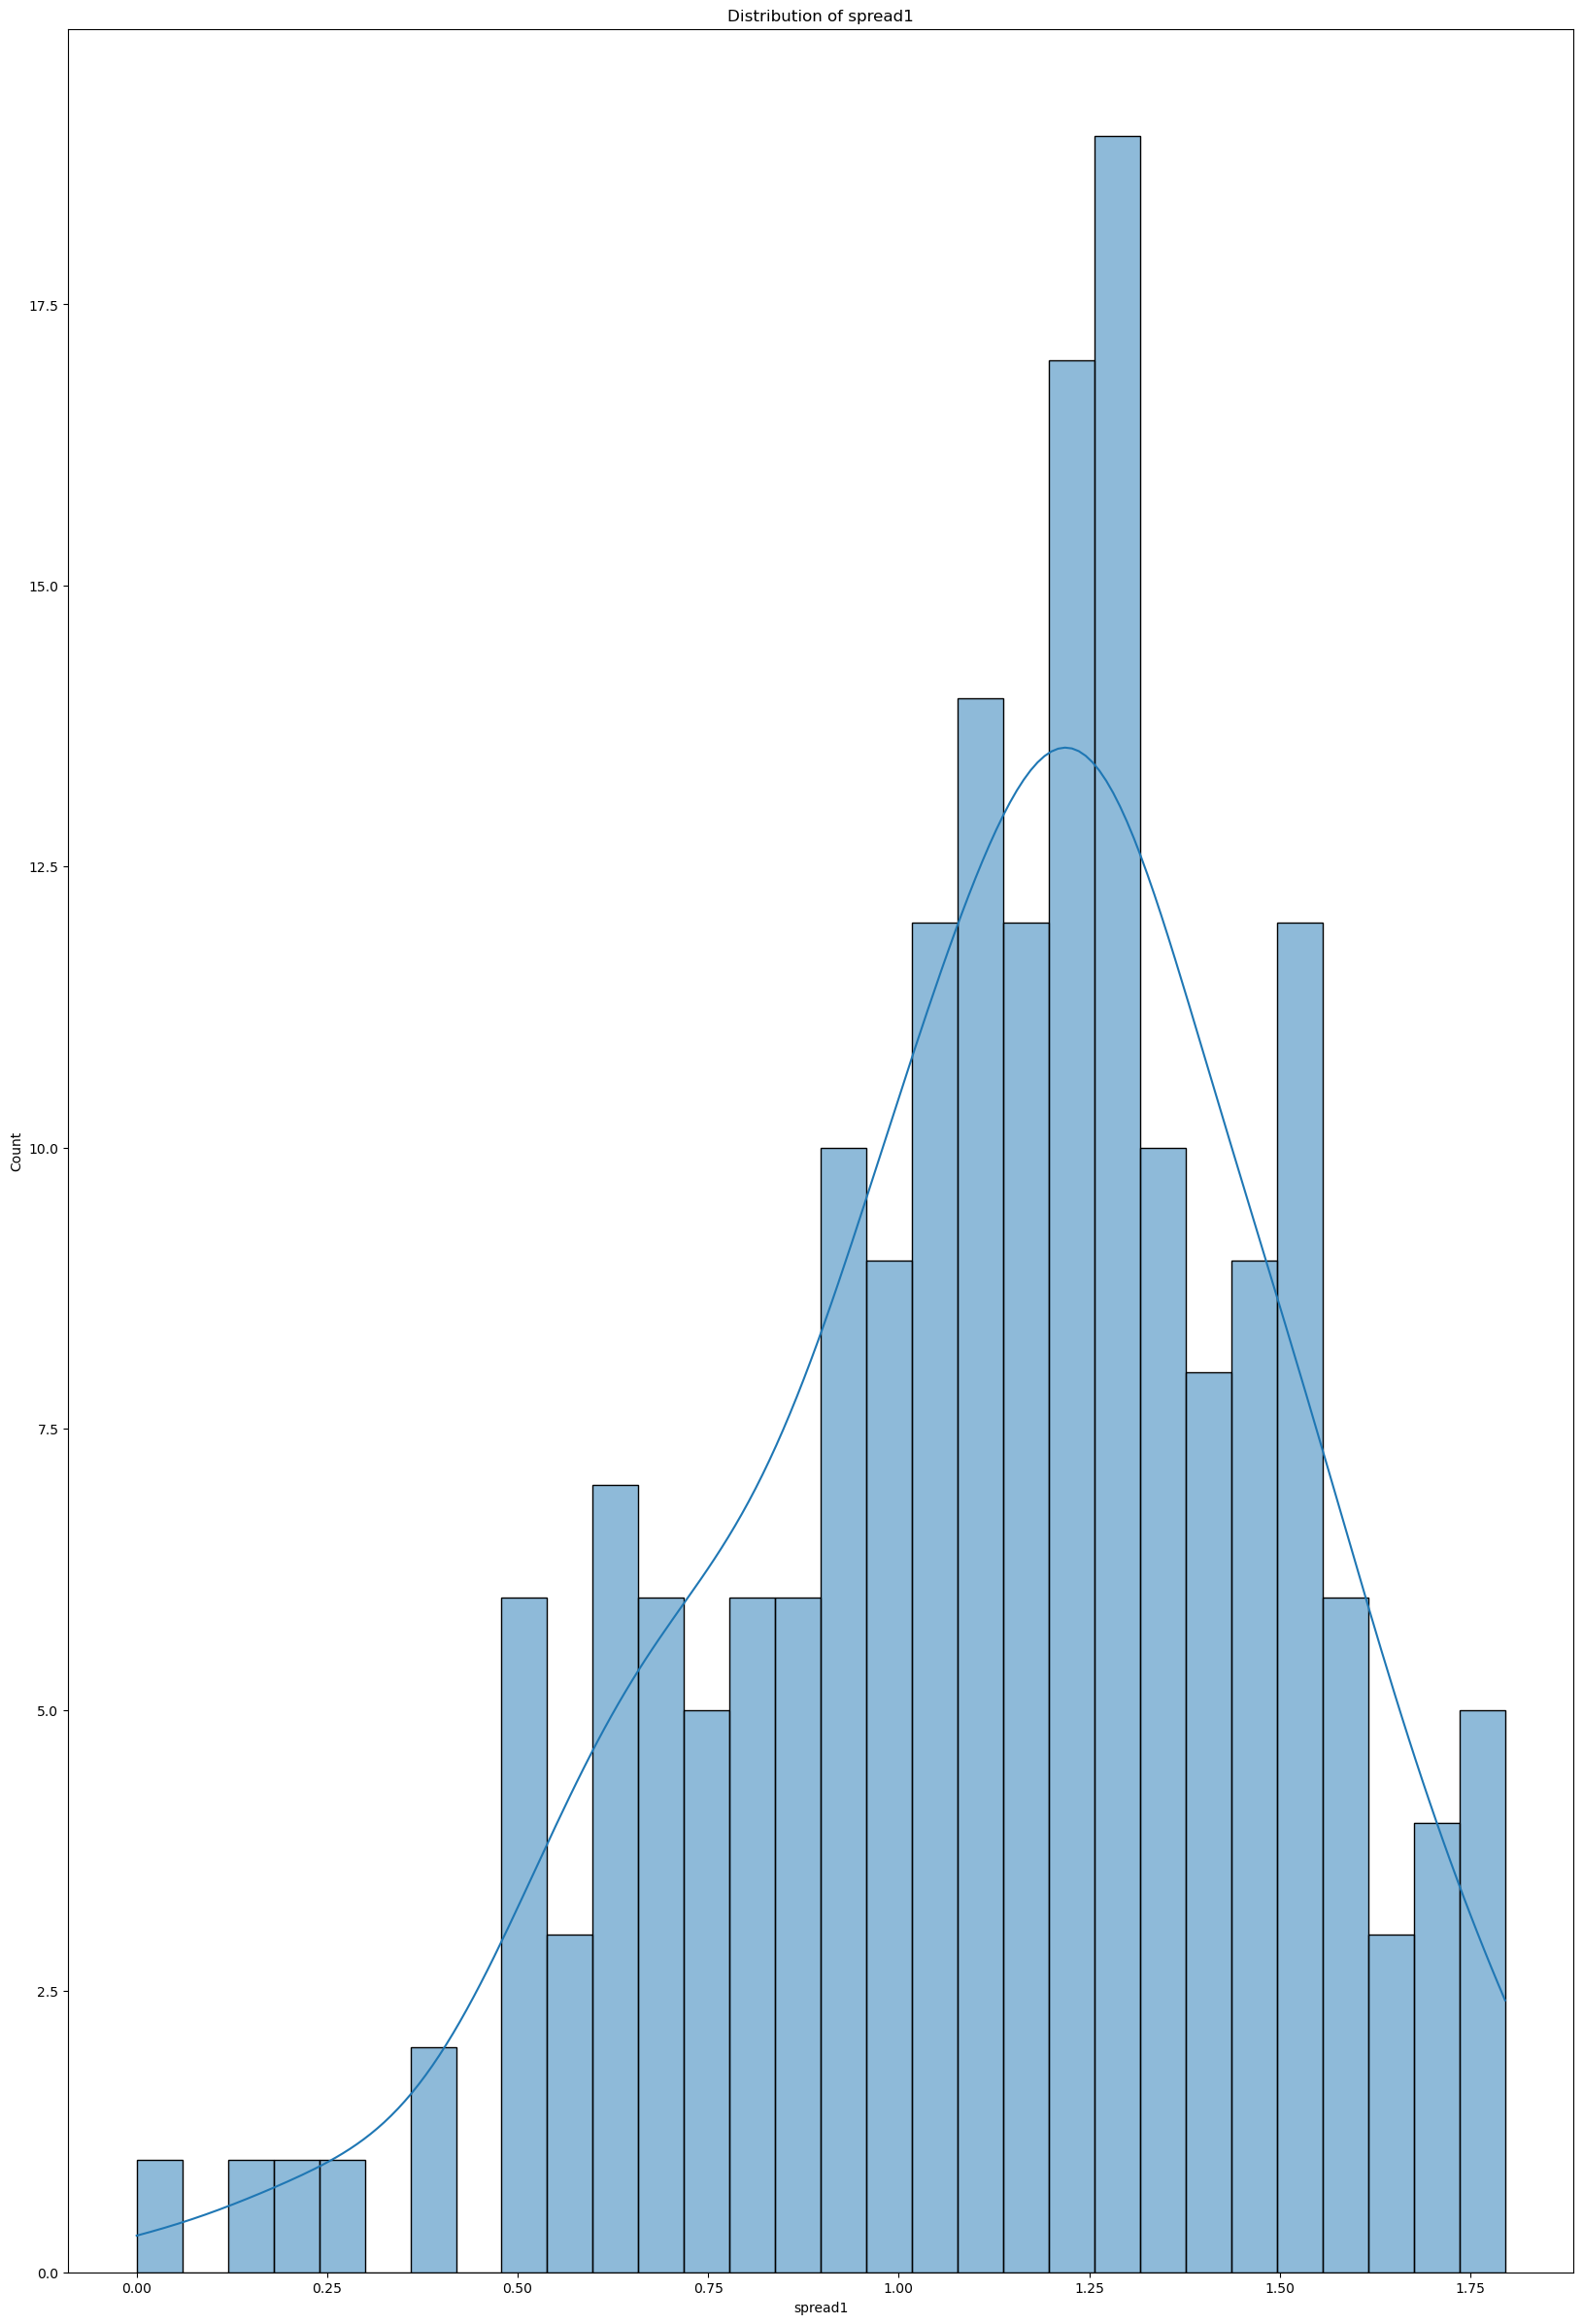

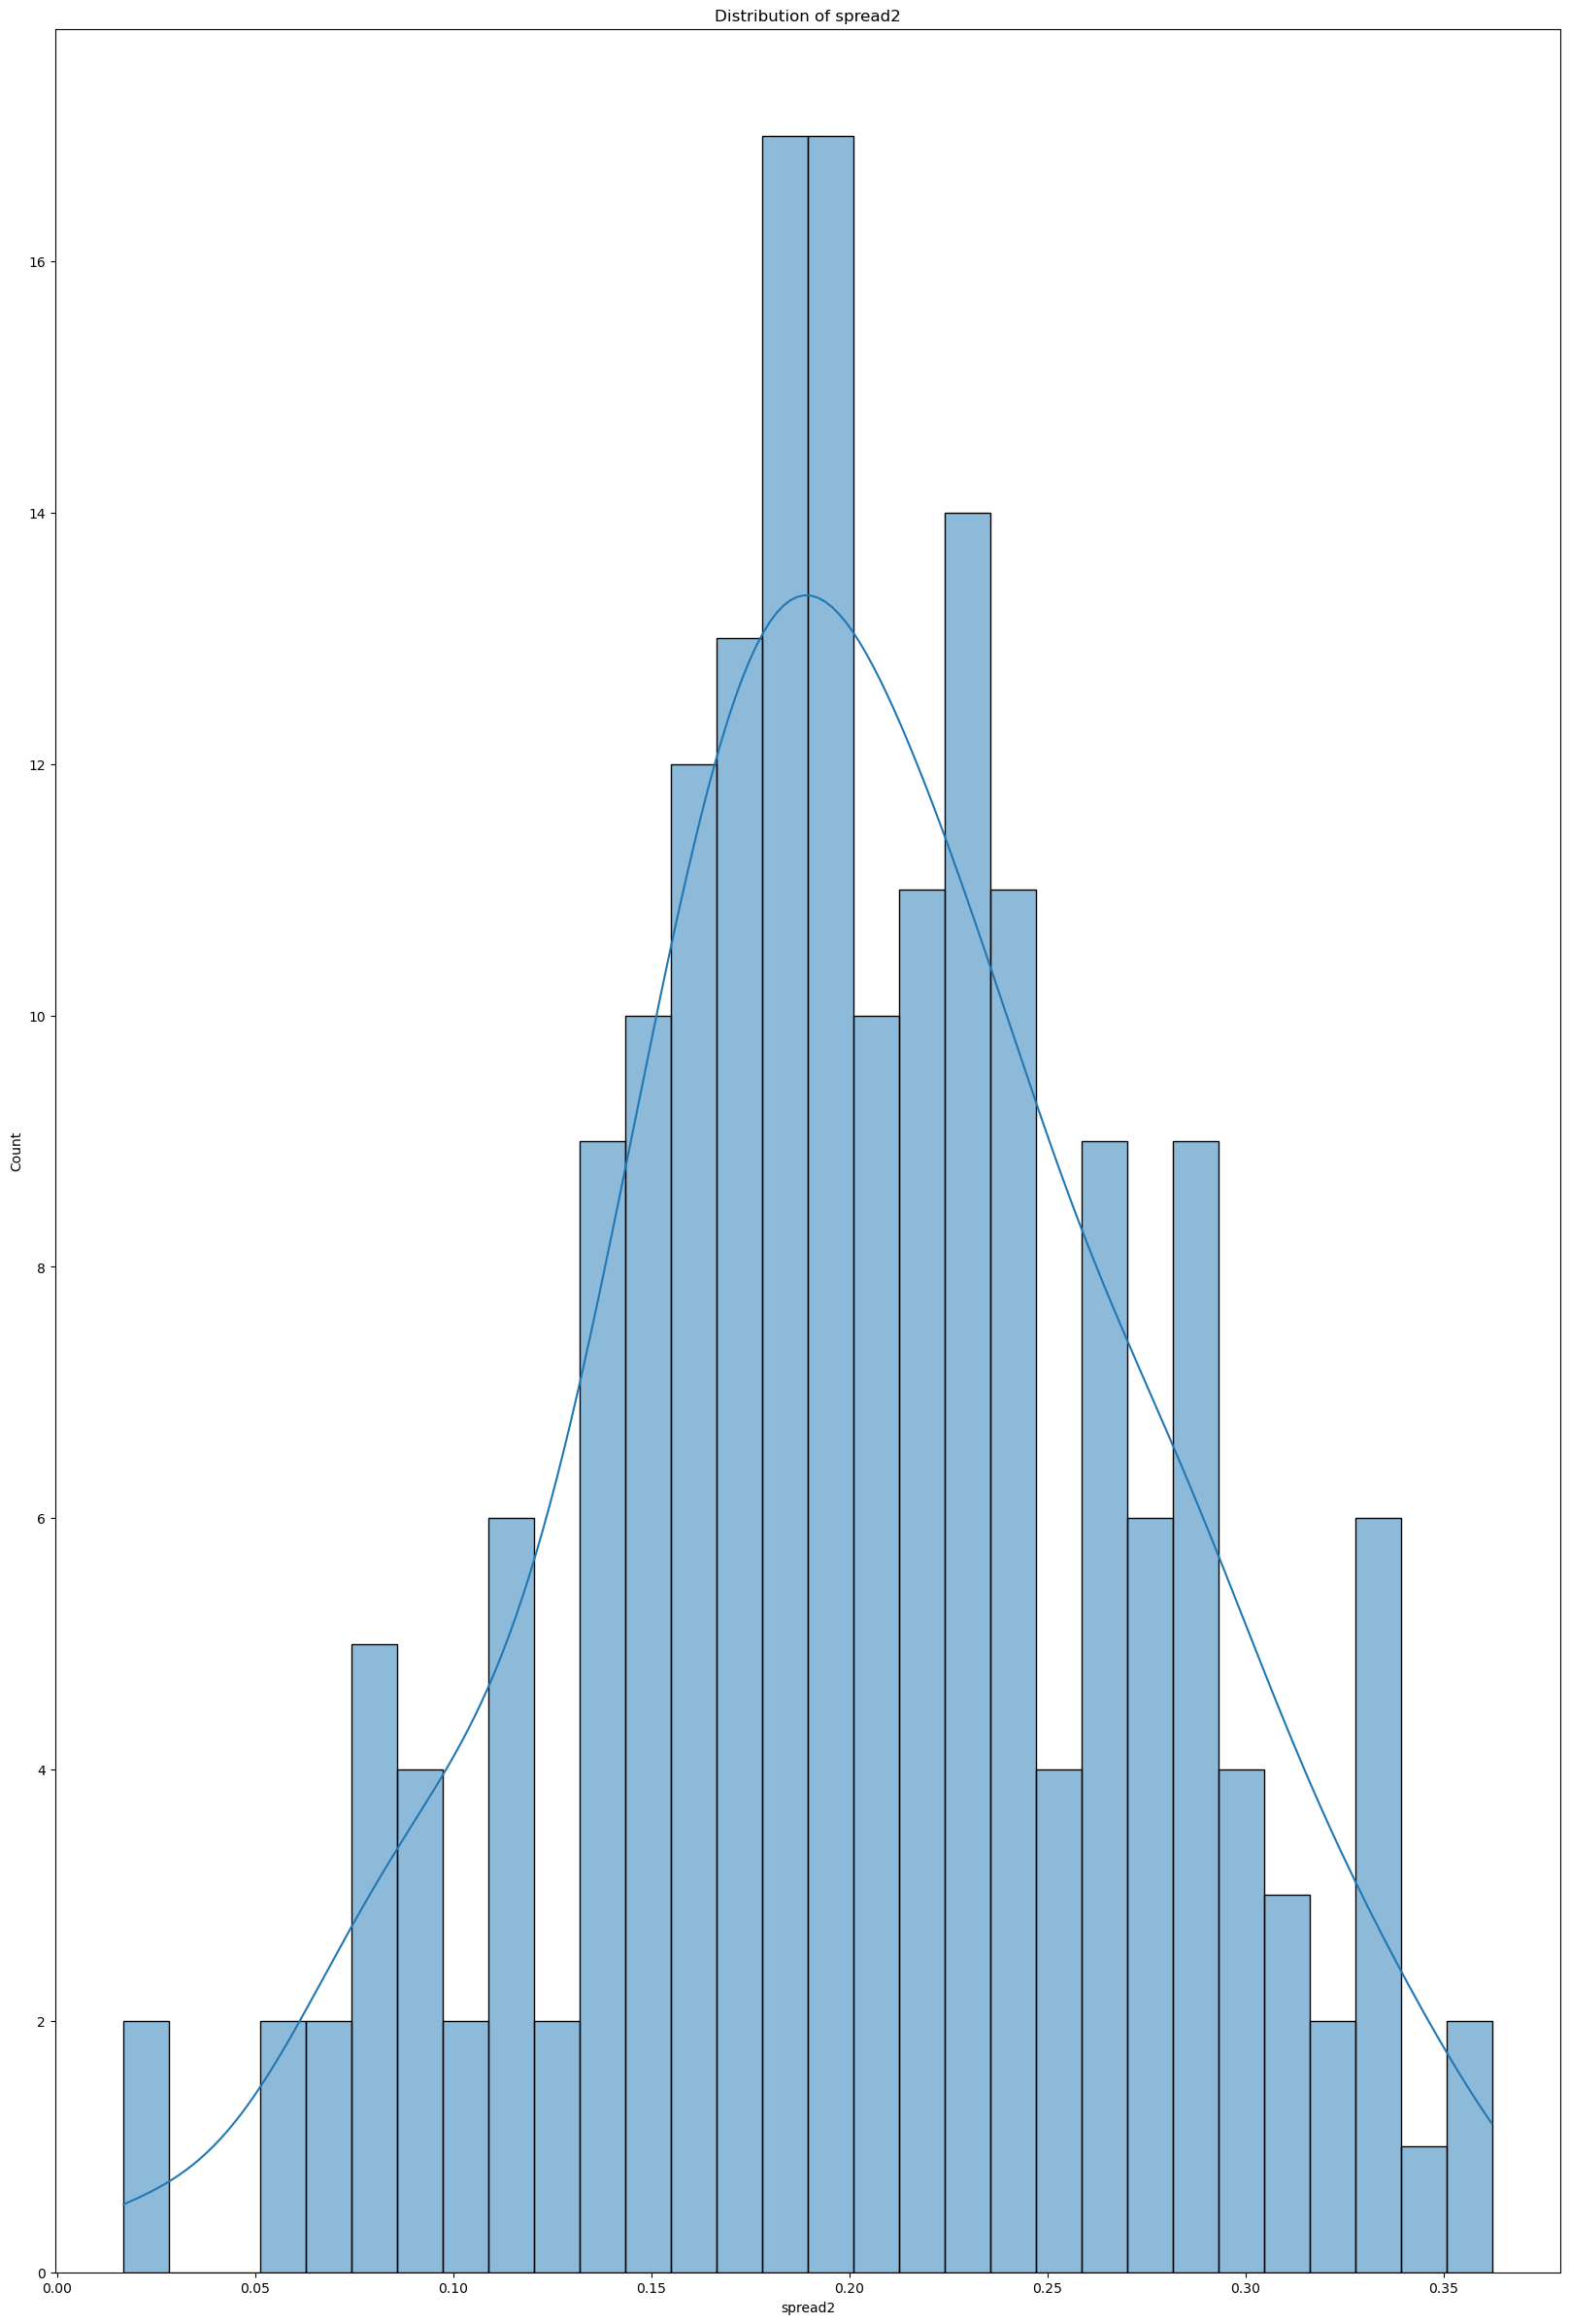

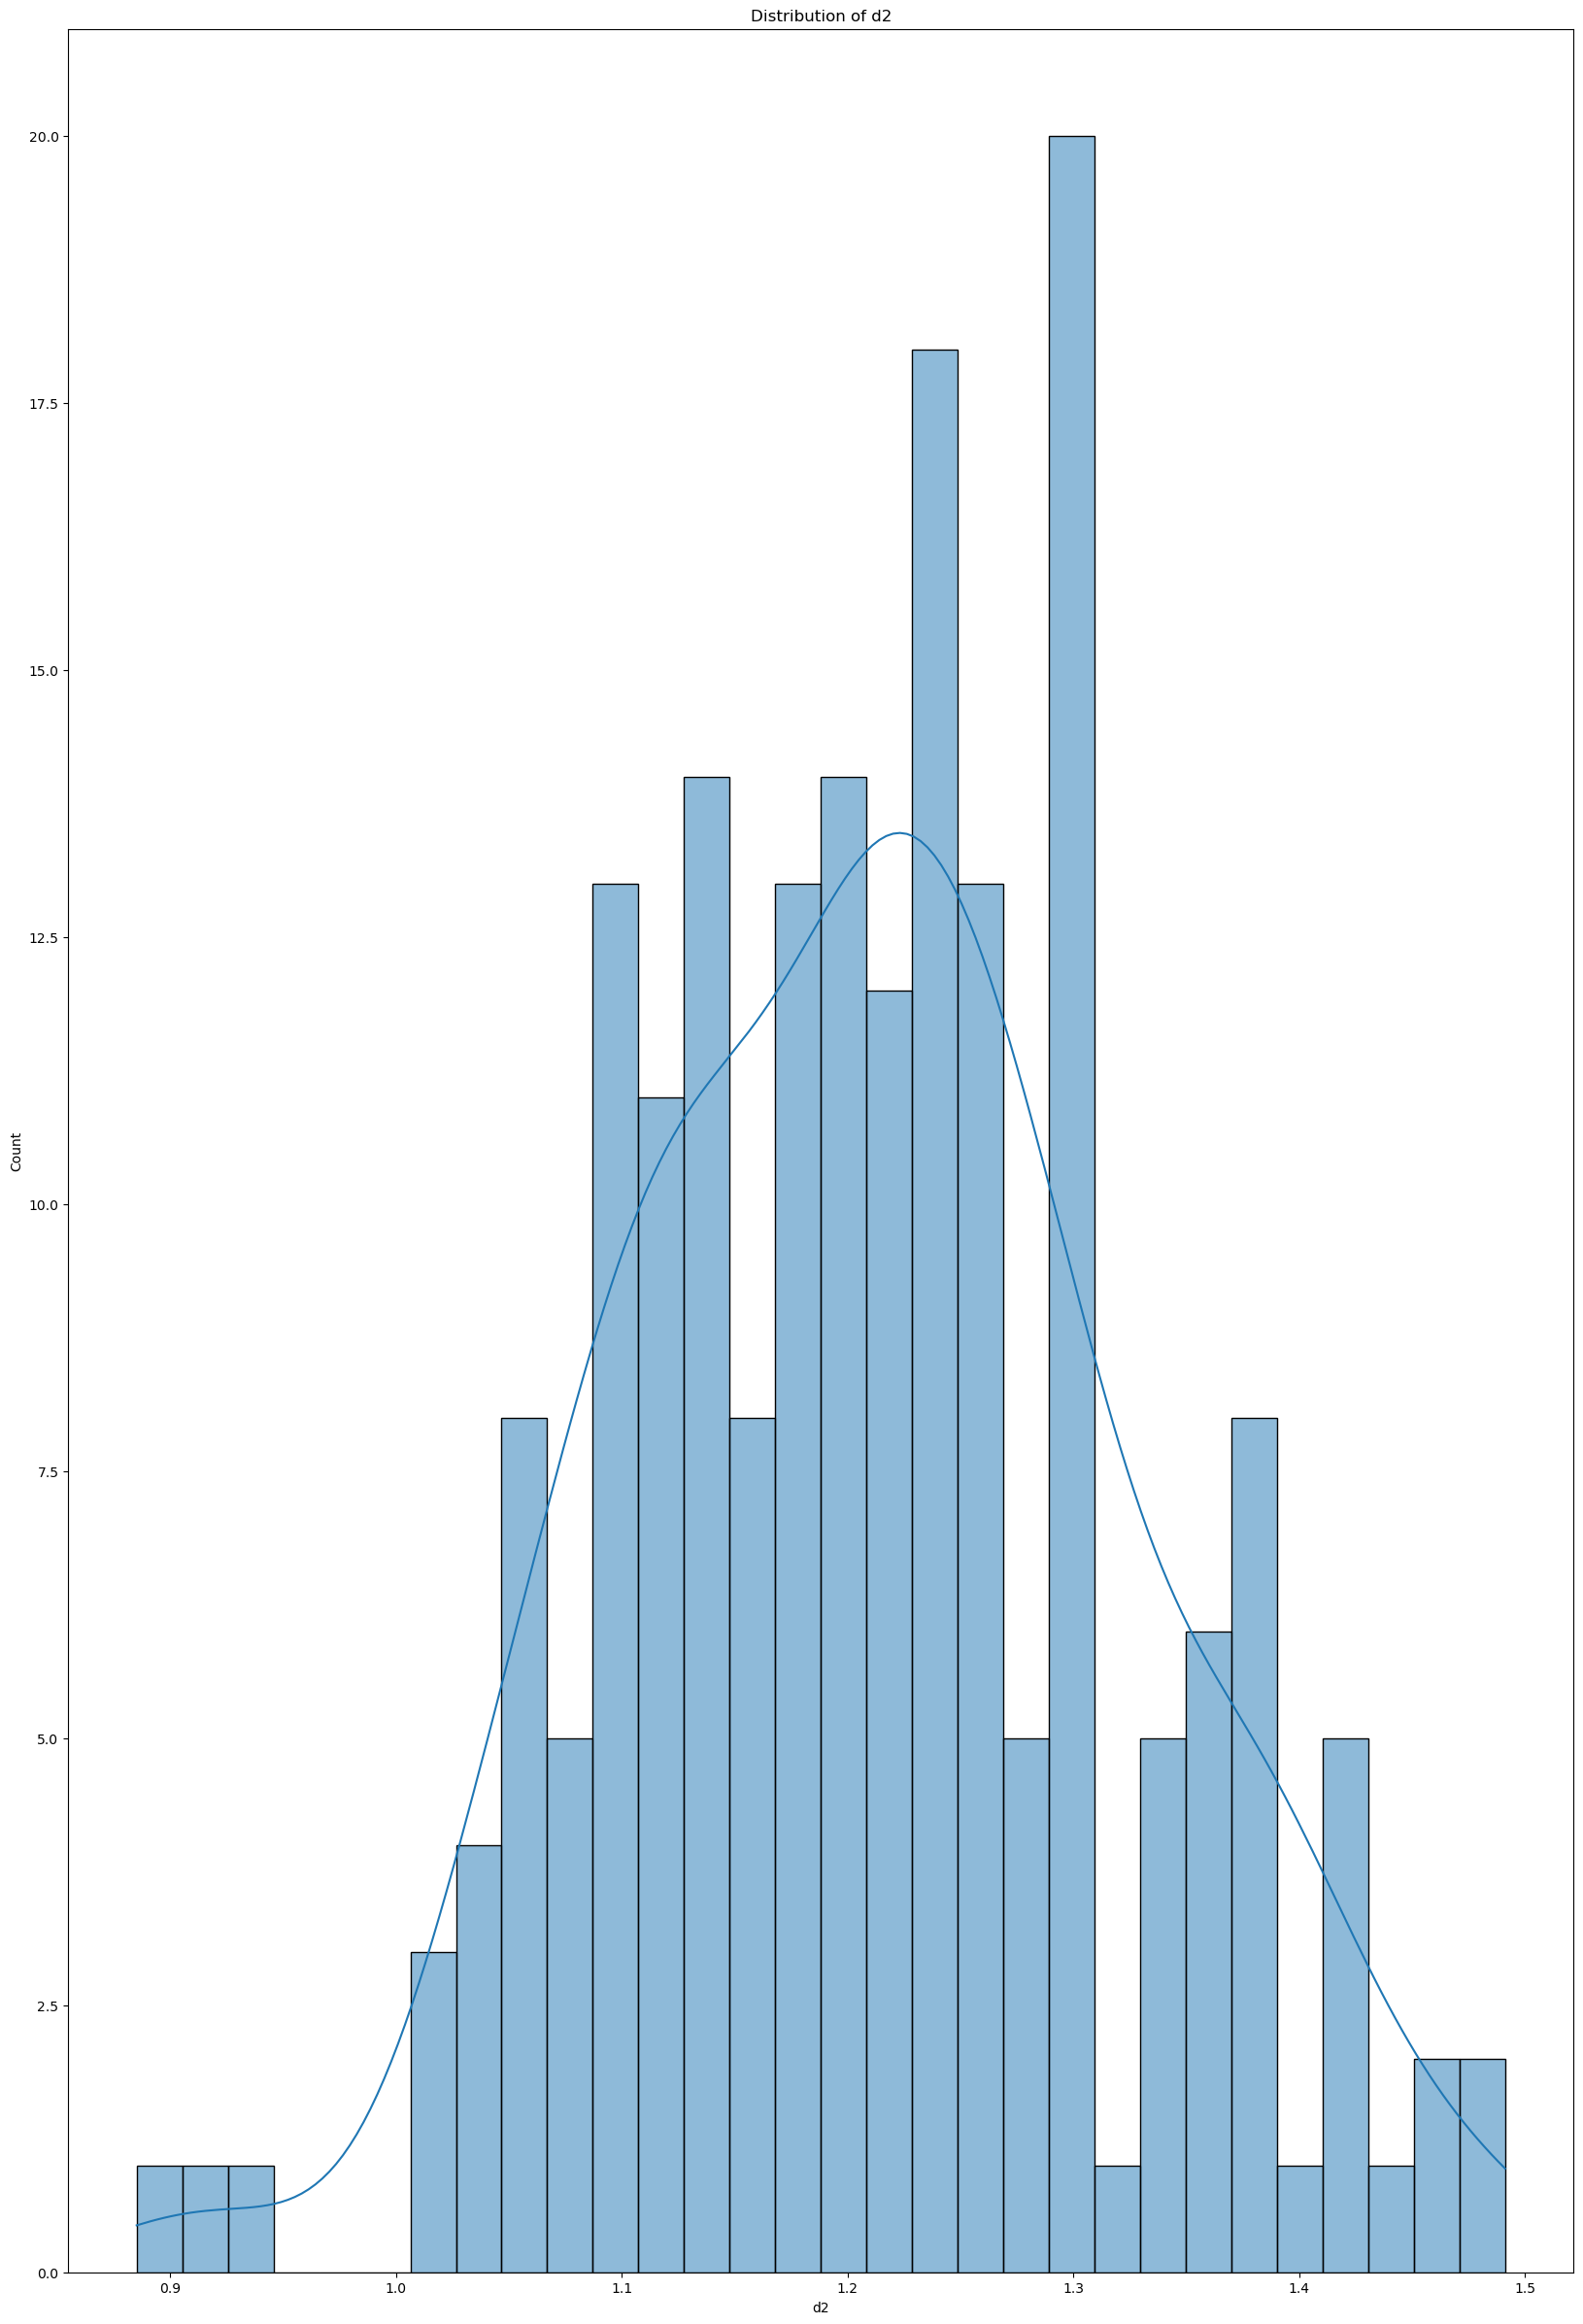

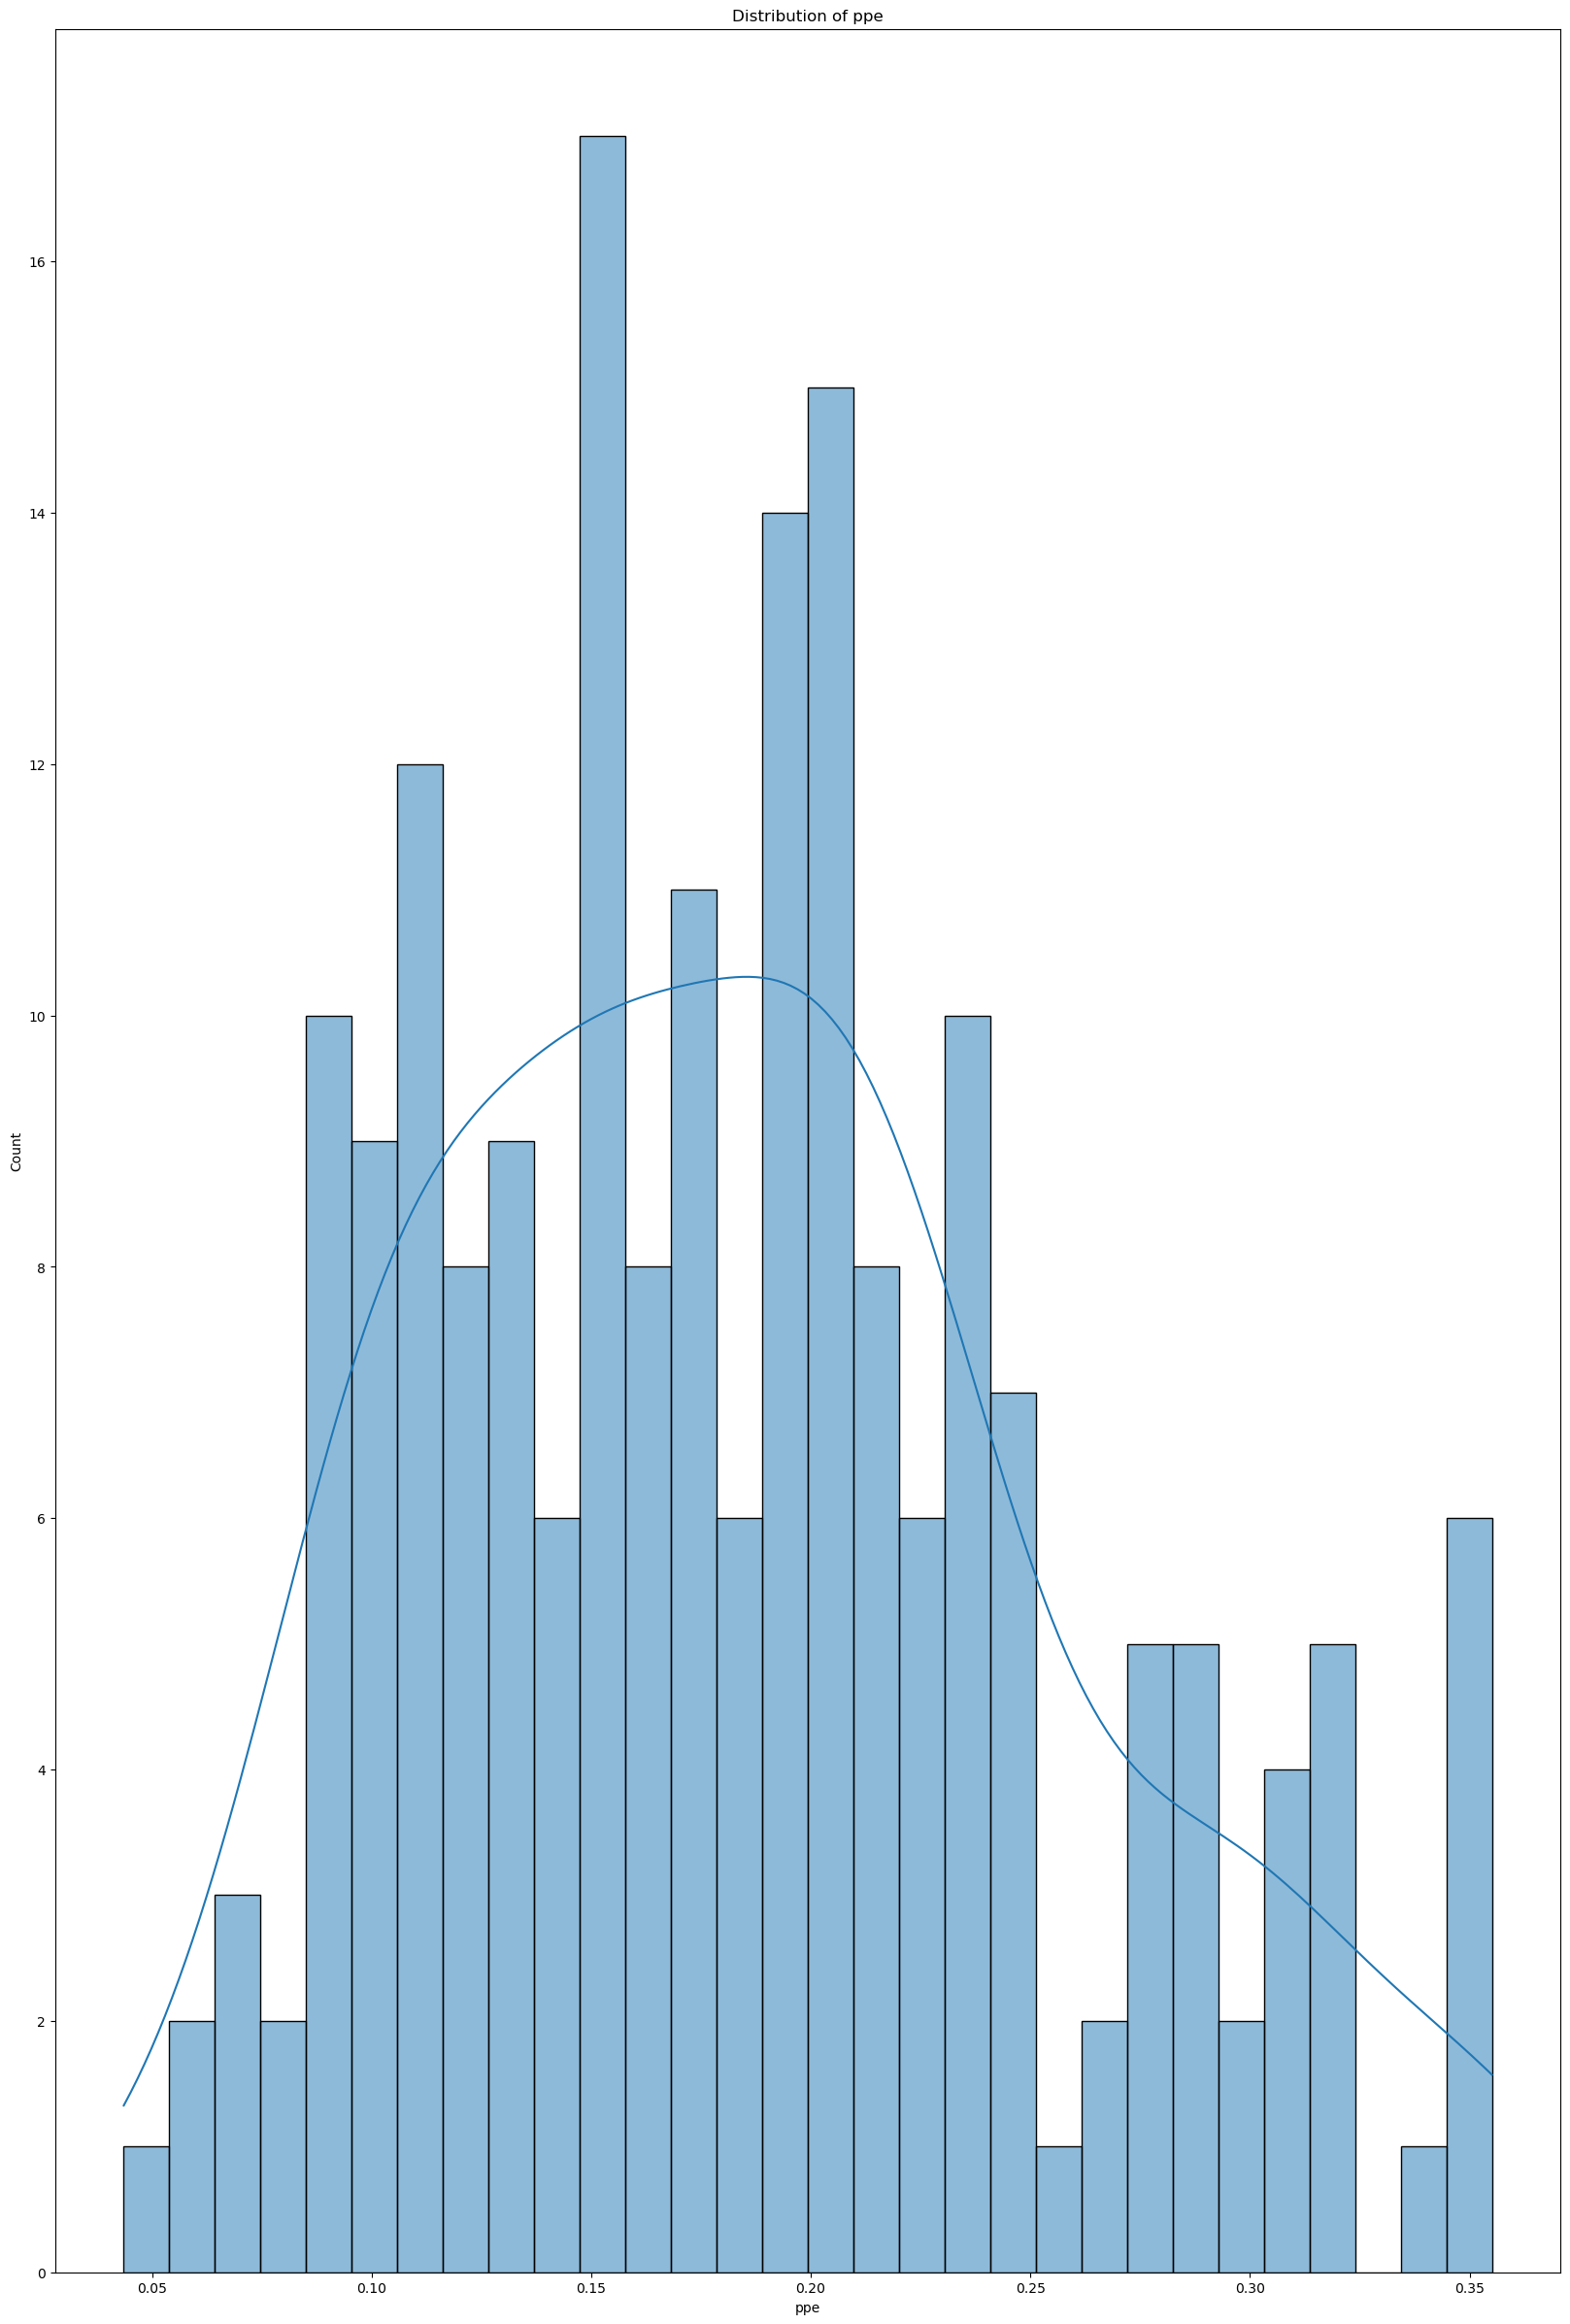

In [167]:
for i in df:
    plt.figure(figsize=(20, 30))
    sns.histplot(df[i], kde=True, bins= 30)
    plt.title(f'Distribution of {i}')
    plt.show()


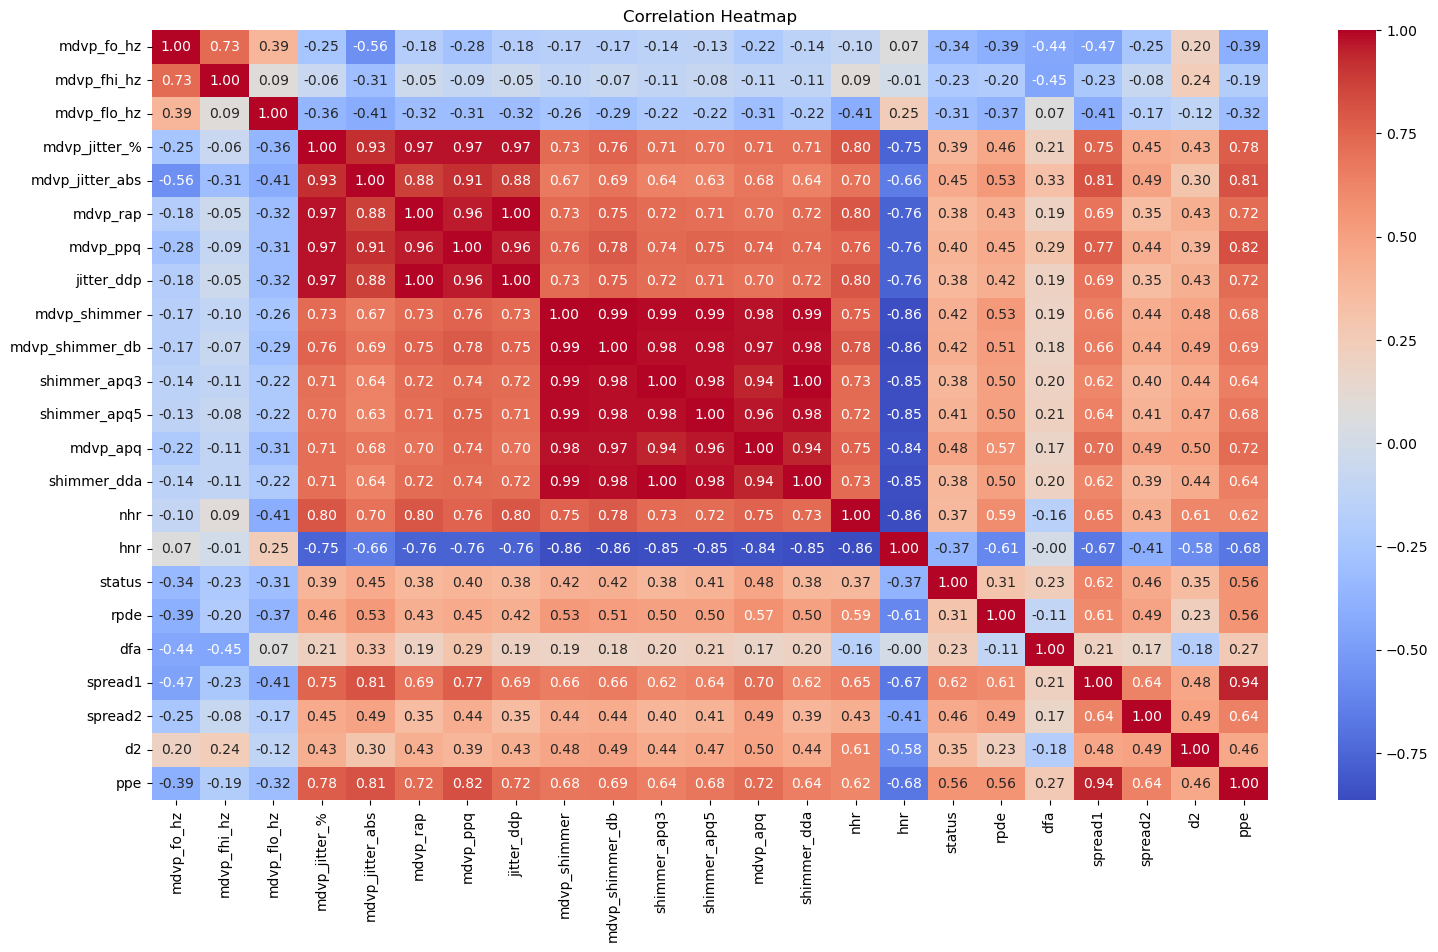

In [168]:
plt.figure(figsize=(18, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


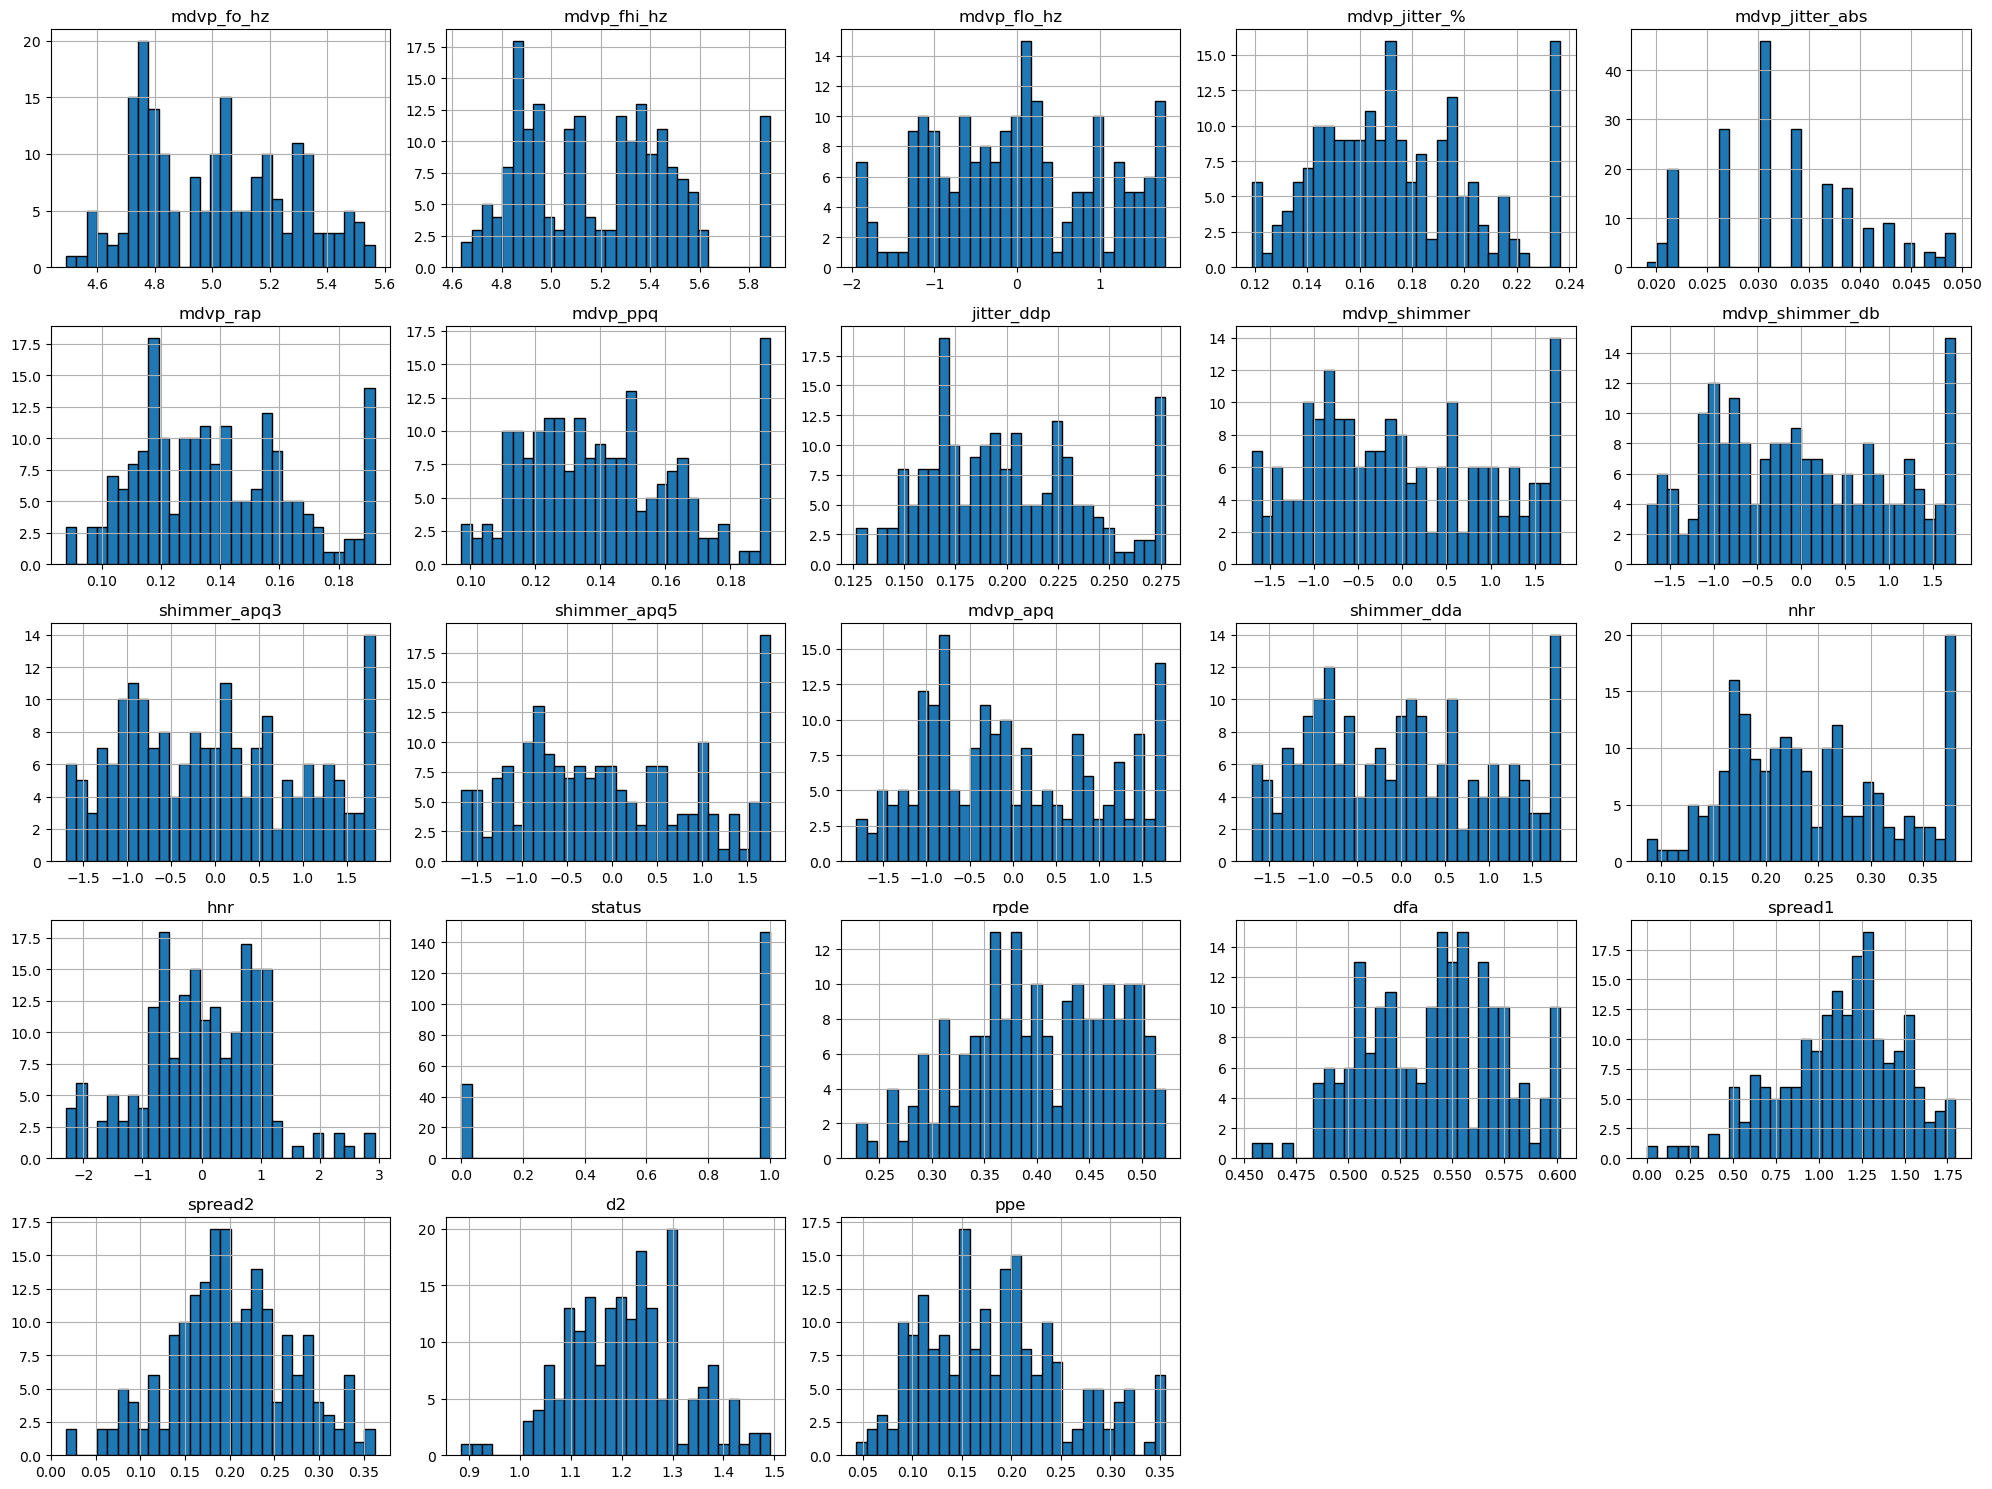

In [169]:
# Histograms for all numerical features
df.drop(columns=['name']).hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()



Boxplots to Check Outliers

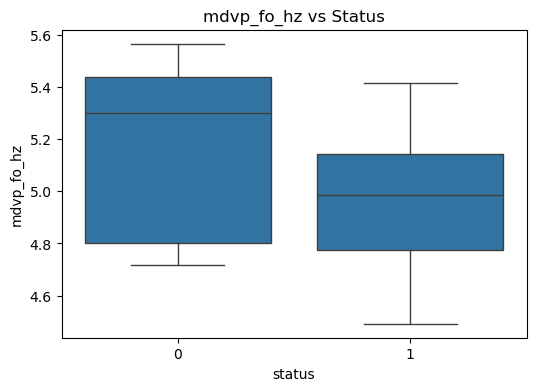

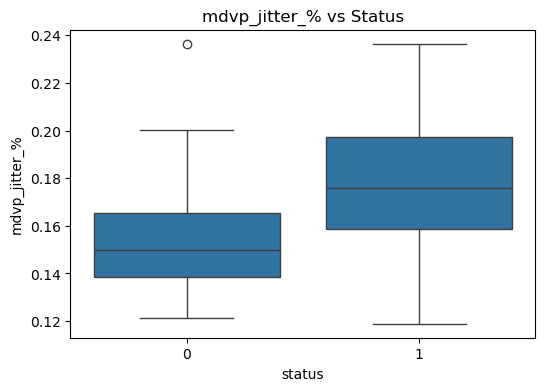

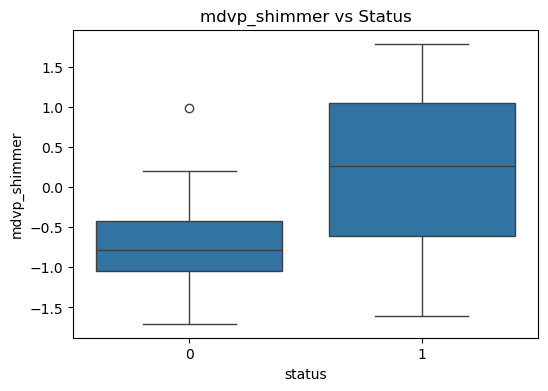

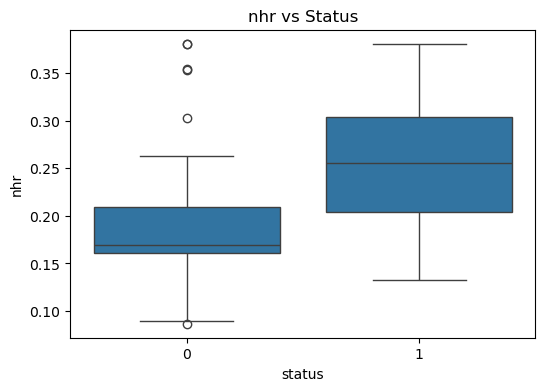

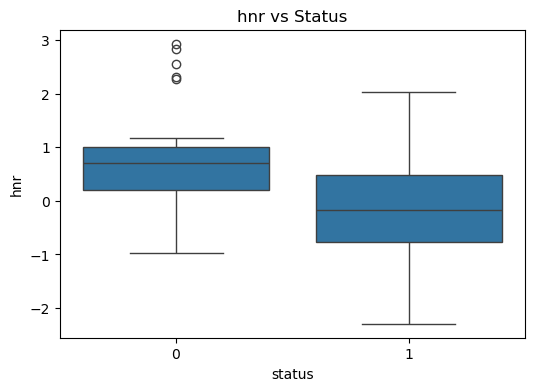

In [170]:
features = ['mdvp_fo_hz', 'mdvp_jitter_%', 'mdvp_shimmer', 'nhr', 'hnr']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='status', y=col, data=df)
    plt.title(f'{col} vs Status')
    plt.show()


Pairplot and Scatter Matrix 

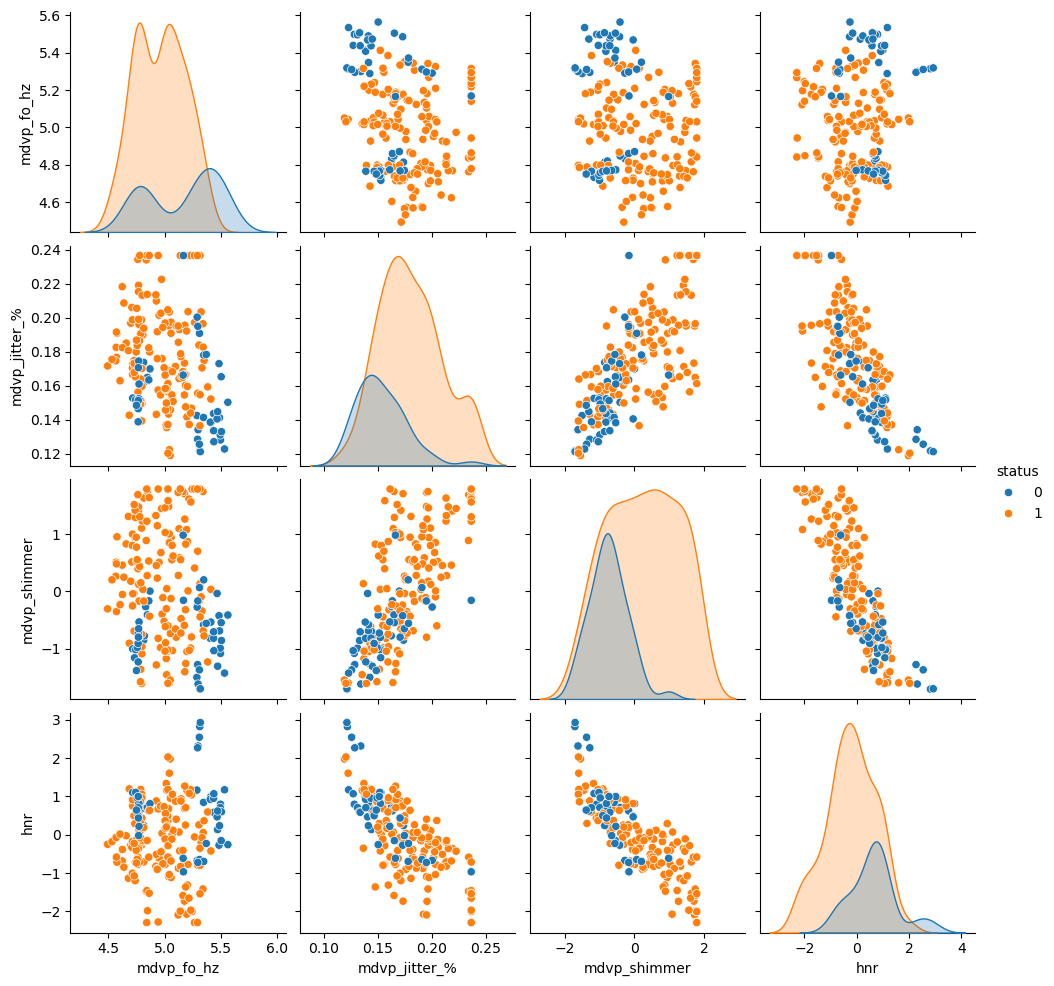

In [171]:
selected_cols = ['mdvp_fo_hz', 'mdvp_jitter_%', 'mdvp_shimmer', 'hnr', 'status']
sns.pairplot(df[selected_cols], hue='status')
plt.show()


In [173]:
df = df.drop(columns=["name", "mdvp_flo_hz", "mdvp_shimmer", "mdvp_shimmer_db", "hnr"])

In [174]:
df[df.columns.difference(['status'])] = df[df.columns.difference(['status'])].round(2)


In [175]:
df.to_csv(r"D:\project\MultipleDiseasePrediction\pp.csv", index=False)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df[['mdvp_fo_hz', 'mdvp_fhi_hz','mdvp_jitter_%',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp',
       'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr','rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe']]
y = df['status']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply under-sampling
rus = RandomUnderSampler(random_state=110)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# Split the under-sampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Coefficients: [[-0.01747054 -0.34991019 -1.10618578  0.57201888  0.66354769 -0.89620435
   0.36271291 -0.22762604  0.26338864  0.28348426 -0.2487011   0.70901088
  -0.3332368   0.43074993  0.55380763  0.76583343  0.27461262  0.73977724]]
Confusion Matrix:
 [[8 3]
 [1 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [177]:
import pickle

# Save to file
with open('pp.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as parkinsons patient.pkl ✅")

Model saved as parkinsons patient.pkl ✅


In [181]:
# Load from file
with open('pp.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
prediction = loaded_model.predict([[5.3, 5.88, 0.19, 0.03, 0.15, 0.16, 0.22, -0.08, -0.21, -0.45, -0.08, 0.38, 0.37, 0.5, 0.8, 0.19, 1.14, 0.12]])
print("Predicted parkinsons patient:", prediction)

Predicted parkinsons patient: [0]
